# Project 8 - Working with OLS

Having built statistics functions, we are now ready to build a function for regression analysis. We will start by building the an regression. We will use linear algebra to estimate parameters that minimize the sum of the squared errors. This is an ordinary least squares regression. 

An OLS regression with one exogenous variable takes the form. 

$y = \alpha + \beta_1x_1 + \mu $

$\beta_0 = \alpha + \mu$

We merge the error term, which represents bias in the data, with alpha to yield the constant, $\beta_0$. This is necessary since OLS assumes an unbiased estimator where:

$\sum_{i=0}^{n-1} e_{i}=0$

Each estimate of a point created from a particular observation takes the form.

$y_i = \beta_0 + \beta_1x_{1,i} + e_i$

This can be generalized to include k exogenous variables:

$y_i = \beta_0 + (\sum_{j=1}^{k} \beta_jx_{i,j}) + e_i$

Ideally, we want to form a prediction where, on average, the right-hand side of the equation  yields the correct value on the left-hand side. When we perform an OLS regression, we form a predictor that minimizes the sum of the distance between each predicted value and the observed value drawn from the data. For example, if the prediction for a particular value of y is 8, and the actual value is 10, the error of the prediction is -2 and the squared error is 4.

To find the function that minimizes the sum squared errors, we will use matrix algebra, also known as linear algebra. For those unfamiliar, the next section uses the numpy library to perform matrix operations. For clarity, we will review the linear algebra functions that we will use with simple examples.

## Linear Algebra for OLS

We solve the following function for a vector of beta values ($\beta$), constants whose values represent estimates of the effect of variables in the set **_X_** on the selected endogenously generate variable $y$. The matrix **_X_** also includes a vector of ones used to estimate the constant $\beta_0$.

$\beta = (X'X)^{-1}X'Y$

$Y =$ Observations for Endogenous Variable

$X =$ Observations for Exogenous Variables

$X' =$ $X$-transpose

$(X'X)^{-1} =$ Inverse of $X'X$

### Inverting a Matrix

In reviewing the linear equation for estimating $\beta$, we confront two unique operations worth understanding. Included in these are some key concepts in linear algebra, including the identity matrix $I$ and linear independence. The best way to understand these concepts is by working with some sample vectors. Consider the matrix $X$ consisting of vectors $x_0$,$x_1$,…,$x_{n-1}$,$x_n$. We must check that these vectors are linearly independent. We do this by joining $X$ with an identity matrix and thus create:

$A = [XI]$

We transform this to show that the product of $A$ and $X^{-1}$ is equal to the product of and an identity matrix, $I$ and $X^{-1}$

$AX^{-1} = [XI]X^{-1}$

$AX^{-1} = [IX^{-1}]$

Let us solve for $AX^{-1}$ using the following vectors for $X$. 

$\begin{equation*}
X = \begin{bmatrix}
1 & 2 & 1 \\
4 & 1 & 5 \\
6 & 8 & 6
\end{bmatrix}
\end{equation*}$

Concatenate a 3 X 3 identity matrix on the left of $X$:

$\begin{equation*}
I = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
[XI] = \begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
4 & 1 & 5 & 0 & 1 & 0 \\
6 & 8 & 6 & 0 & 0 & 1
\end{bmatrix}
\end{equation*}$

If we perform row operations on $A$ to transform $X$ in $[XI]$ into $I$, then we $I$ will be transformed into $X^{-1}$:

$\begin{equation*}
[XI] = \begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
4 & 1 & 5 & 0 & 1 & 0 \\
6 & 8 & 6 & 0 & 0 & 1
\end{bmatrix}
\end{equation*}$




$\begin{equation*}
r_2 - 4r_1:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & -7 & 1 & -4 & 1 & 0 \\
6 & 8 & 6 & 0 & 0 & 1
\end{bmatrix}
\end{equation*}$


$\begin{equation*}
r_3 - 6r_1:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & -7 & 1 & -4 & 1 & 0 \\
0 & -4 & 0 & -6 & 0 & 1
\end{bmatrix}
\end{equation*}$


$\begin{equation*}
r_2 \leftrightarrow r_3:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & -4 & 0 & -6 & 0 & 1\\
0 & -7 & 1 & -4 & 1 & 0 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
r_2/{-4}:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & 1 & 0 & 3/2 & 0 & -1/4\\
0 & -7 & 1 & -4 & 1 & 0 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
r_3 + 7r_2:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & 1 & 0 & 3/2 & 0 & -1/4\\
0 & 0 & 1 & 13/2 & 1 & -7/4 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
r_1 + -2r_2 - r_3:\begin{bmatrix}
1 & 0 & 0 & -17/2 & -1 & 9/4 \\
0 & 1 & 0 & 3/2 & 0 & -1/4\\
0 & 0 & 1 & 13/2 & 1 & -7/4 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
IX^{-1}=\begin{bmatrix}
1 & 0 & 0 & -8.5 & -1 & 2.25 \\
0 & 1 & 0 & 1.5 & 0 & -0.25\\
0 & 0 & 1 & 6.5 & 1 & -1.75 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
X^{-1}=\begin{bmatrix}
-8.5 & -1 & 2.25 \\
1.5 & 0 & -0.25\\
6.5 & 1 & -1.75 
\end{bmatrix}
\end{equation*}$

By transforming $X$ in matrix $XI$ into an identity matrix, we transform the $I$ matrix into $X^{-1}$. This also confirms that the vectors comprising X are independent, meaning that one vector in the set comprising $X$ cannot be formed from the combination and or transformation of the others. A fundamental assumption of regression analysis is that data generated from factors believed to determine the y-values are independent of one another.

### Linear Algebra in _numpy_

We can check this using linear algebra functions in numpy. We start by creating numpy arrays that we will transform into vectors in the second step. 

In [1]:
#invertMatrix.py
import numpy as np
# create array to be transformed into vectors
x1 = np.array([1,2,1])
x2 = np.array([4,1,5])
x3 = np.array([6,8,6])
print("Array 1:", x1, sep="\n")
print("Array 2:", x2, sep="\n")
print("Array 3:", x3, sep="\n")

Array 1:
[1 2 1]
Array 2:
[4 1 5]
Array 3:
[6 8 6]


Next, transform these arrays into row vectors using matrix().

In [2]:
x1 = np.matrix(x1)
x2 = np.matrix(x2)
x3 = np.matrix(x3)
print("Vector 1", x1, sep="\n")
print("Vector 2", x2, sep="\n")
print("Vector 3", x3, sep="\n")

Vector 1
[[1 2 1]]
Vector 2
[[4 1 5]]
Vector 3
[[6 8 6]]


Join them using the concatenate() function. We define axis=0 to stack each row on upon the next:

In [3]:
X = np.concatenate((x1, x2, x3), axis = 0)
print("X:", X, sep="\n")

X:
[[1 2 1]
 [4 1 5]
 [6 8 6]]


Finally, we can invert the matrix that we have made using .getI().

In [4]:
X_inverse = X.getI()
print("X Inverse:", X_inverse, sep = "\n")

X Inverse:
[[-8.5000000e+00 -1.0000000e+00  2.2500000e+00]
 [ 1.5000000e+00 -7.6861594e-17 -2.5000000e-01]
 [ 6.5000000e+00  1.0000000e+00 -1.7500000e+00]]


These values are not rounded, so interpretation of the inverted matrix could be more intuitive. We use the round() method from the numpy module to round values to two places.

In [5]:
X_inverse = np.round(X.getI(), 2)
print("X Inverse:", X_inverse, sep = "\n")

X Inverse:
[[-8.5  -1.    2.25]
 [ 1.5  -0.   -0.25]
 [ 6.5   1.   -1.75]]


## Regression Function

Now that we have learned the necessary operations, we can understand the operations of the regression function. If you would like to build your own regression module, reconstruct the scripts form Chapter 7. In this lesson, we will use the statsmodels OLS method to reconstruct and compare statistics from an OLS regression. 

Recall that we estimate the vector of beta parameters for each variable with the equation:

$\beta = (X'X)^{-1}X'Y$

Each estimated $\beta$ value is multiplied by each observation of the relevant exogenous variable estimate the effect of the value on the endogenous, $Y$, value.

We will run a regression In order to estimate the parameters, we will need to import data, define the dependent variable and independent variables, and transform these into matrix objects. 

Let's use the data from chapter 6 with the addition real GDP per capita. This combined set of data is saved in the repository as a file created in chapter 8.

In [6]:
#statsmodelsOLS.py
import pandas as pd
import statsmodels.api as sm
import numpy as np

data = pd.read_csv("fraserDataWithRGDPPC.csv", 
                   index_col = [0,1], 
                   parse_dates = True)
data

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2017-01-01  7.673511            7.528167   
         2016-01-01  7.637742            7.875862   
         2015-01-01  7.639666            7.904257   
         2014-01-01  7.586769            7.882037   
         2013-01-01  7.389525            7.807904   
...                       ...                 ...   
ZWE      2000-01-01  4.299839            5.365058   
         1995-01-01  5.518614            6.418859   
         1990-01-01  4.516140            5.108843   
         1985-01-01  4.226841            5.026250   
         1980-01-01  4.054740            6.322625   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2017-01-01                        5.064907     9.648271   
         2016-01-01                        5.071814     9.553657   
         2015-01-01                        5.003489     9.585625   
         2014-01-01                        4.666740     9.629320   
         2013-01-01                        4.543782     9.690942   
...                                             ...          ...   
ZWE      2000-01-01                        4.662445     2.891166   
         1995-01-01                        5.138131     4.915293   
         1990-01-01                        3.439437     5.664840   
         1985-01-01                        2.633492     6.305850   
         1980-01-01                        1.379602     6.343342   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2017-01-01                          8.343863    7.782349   
         2016-01-01                          8.214900    7.472476   
         2015-01-01                          8.109118    7.595838   
         2014-01-01                          8.208630    7.547119   
         2013-01-01                          7.705771    7.199224   
...                                               ...         ...   
ZWE      2000-01-01                          3.224735    5.355792   
         1995-01-01                          5.839664    5.423290   
         1990-01-01                          4.689623    3.953668   
         1985-01-01                          3.161743    4.207229   
         1980-01-01                          3.277015    3.280637   

                     RGDP Per Capita  
ISO_Code Year                         
ALB      2017-01-01              NaN  
         2016-01-01          10342.0  
         2015-01-01          10032.0  
         2014-01-01           9808.0  
         2013-01-01           9660.0  
...                              ...  
ZWE      2000-01-01           2249.0  
         1995-01-01           2156.0  
         1990-01-01           2232.0  
         1985-01-01           2198.0  
         1980-01-01           2133.0  

[3030 rows x 7 columns]

Time series data is often subject to trend. This is the case with real GDP per capita data. Real GDP per capita tends to grow at a steady rate. To offset this effect we can include the lag of real GDP per capita in the regression that we run. Later, we will try to confront the same problem by estimating the annual pct_change of real GDP per capita.

The years are ordered from latest to earliest. We need them to start from earliest. We will save the index of all but the last year.



In [7]:
years = np.array(sorted(list(set(data.index.get_level_values("Year")))))
years = pd.date_range(years[0], years[-2], freq = "AS")
countries = sorted(list(set(data.index.get_level_values("ISO_Code"))))
index_names = list(data.index.names)
multi_index = pd.MultiIndex.from_product(
    [countries, years[:-1]], names = data.index.names)
data = data.reindex(multi_index)

data

EFW  Size of Government  \
ISO_Code Year                                       
AGO      1970-01-01       NaN                 NaN   
         1971-01-01       NaN                 NaN   
         1972-01-01       NaN                 NaN   
         1973-01-01       NaN                 NaN   
         1974-01-01       NaN                 NaN   
...                       ...                 ...   
ZWE      2011-01-01  4.843441            6.424630   
         2012-01-01  4.971192            6.670469   
         2013-01-01  5.246723            6.325105   
         2014-01-01  5.582478            6.433165   
         2015-01-01  6.145330            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      1970-01-01                             NaN          NaN   
         1971-01-01                             NaN          NaN   
         1972-01-01                             NaN          NaN   
         1973-01-01                             NaN          NaN   
         1974-01-01                             NaN          NaN   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      1970-01-01                               NaN         NaN   
         1971-01-01                               NaN         NaN   
         1972-01-01                               NaN         NaN   
         1973-01-01                               NaN         NaN   
         1974-01-01                               NaN         NaN   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita  
ISO_Code Year                         
AGO      1970-01-01              NaN  
         1971-01-01              NaN  
         1972-01-01              NaN  
         1973-01-01              NaN  
         1974-01-01              NaN  
...                              ...  
ZWE      2011-01-01           1515.0  
         2012-01-01           1604.0  
         2013-01-01           1604.0  
         2014-01-01           1594.0  
         2015-01-01           1560.0  

[7452 rows x 7 columns]

Since we are using panel data - each year has as many observations as there are countries - we will need to take a few extra steps when generating any lag variables. Later, the same steps will need to be taken for calculating the annual percent change.

In [8]:
data["RGDP Per Capita Lag"] = data.groupby("ISO_Code")["RGDP Per Capita"].shift()

In [9]:
data = data.dropna(axis=0)
data.loc["GBR"]

EFW  Size of Government  Legal System & Property Rights  \
Year                                                                       
2001-01-01  8.452018            6.961156                        8.234602   
2002-01-01  8.490705            7.139978                        8.144261   
2003-01-01  8.499127            7.039513                        8.245855   
2004-01-01  8.382597            6.920611                        8.069173   
2005-01-01  8.393285            6.922756                        8.265496   
2006-01-01  8.302836            6.914460                        7.982602   
2007-01-01  8.192020            6.929650                        7.644268   
2008-01-01  8.025975            6.161823                        7.807282   
2009-01-01  8.010150            6.282977                        7.979651   
2010-01-01  8.028130            6.002021                        7.971147   
2011-01-01  7.991630            6.026605                        7.966475   
2012-01-01  8.023953            6.123371                        7.825436   
2013-01-01  8.003675            6.479671                        7.812331   
2014-01-01  7.973524            6.118760                        7.829461   
2015-01-01  8.075913            6.161316                        7.921505   

            Sound Money  Freedom to trade internationally  Regulation  \
Year                                                                    
2001-01-01     9.520818                          9.231009    8.312506   
2002-01-01     9.484984                          9.161324    8.522978   
2003-01-01     9.414910                          9.236219    8.559139   
2004-01-01     9.426507                          8.908917    8.587775   
2005-01-01     9.449126                          8.786506    8.542543   
2006-01-01     9.395209                          8.748802    8.473108   
2007-01-01     9.435705                          8.686429    8.264048   
2008-01-01     9.406692                          8.600234    8.153843   
2009-01-01     9.499708                          8.744129    7.544287   
2010-01-01     9.584280                          8.782008    7.801191   
2011-01-01     9.556971                          8.682056    7.726041   
2012-01-01     9.756184                          8.554477    7.860295   
2013-01-01     9.724509                          8.273205    7.728658   
2014-01-01     9.751757                          8.460951    7.706689   
2015-01-01     9.841927                          8.418714    8.036102   

            RGDP Per Capita  RGDP Per Capita Lag  
Year                                              
2001-01-01          32356.0              31619.0  
2002-01-01          32992.0              32356.0  
2003-01-01          33977.0              32992.0  
2004-01-01          34638.0              33977.0  
2005-01-01          35424.0              34638.0  
2006-01-01          36045.0              35424.0  
2007-01-01          36679.0              36045.0  
2008-01-01          36163.0              36679.0  
2009-01-01          34338.0              36163.0  
2010-01-01          34722.0              34338.0  
2011-01-01          34971.0              34722.0  
2012-01-01          35185.0              34971.0  
2013-01-01          35618.0              35185.0  
2014-01-01          36436.0              35618.0  
2015-01-01          36941.0              36436.0

## Running a Regression

An ordinary least squares regression genereates a predictor that minimuzes the sum squared errors represented by the difference between the observed values and the predicted values generated from by the regression. The predictor is defined by separate linear parameters for each exogenous variable. For each observation, each parameter is multiplied by the value of the variable represent the effect of that variable on the endogenous variabel $y$.

The result is a predictor that can be compared to the observed data. Next, we will generate such a linear prediction and consider how we quantify the variance that is explained by that prediction.

In [10]:
y_var = ["RGDP Per Capita"]
x_vars = ["Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation"]
reg_vars = y_var + x_vars
reg_data = data[reg_vars]
reg_data.corr().round(2)

RGDP Per Capita  Size of Government  \
RGDP Per Capita                              1.00               -0.24   
Size of Government                          -0.24                1.00   
Legal System & Property Rights               0.67               -0.17   
Sound Money                                  0.44                0.11   
Freedom to trade internationally             0.51                0.14   
Regulation                                   0.51                0.08   

                                  Legal System & Property Rights  Sound Money  \
RGDP Per Capita                                             0.67         0.44   
Size of Government                                         -0.17         0.11   
Legal System & Property Rights                              1.00         0.59   
Sound Money                                                 0.59         1.00   
Freedom to trade internationally                            0.68         0.75   
Regulation                                                  0.66         0.57   

                                  Freedom to trade internationally  Regulation  
RGDP Per Capita                                               0.51        0.51  
Size of Government                                            0.14        0.08  
Legal System & Property Rights                                0.68        0.66  
Sound Money                                                   0.75        0.57  
Freedom to trade internationally                              1.00        0.65  
Regulation                                                    0.65        1.00

In [11]:
y = reg_data[y_var]
X = reg_data[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()

In [12]:
predictor = results.predict()
reg_data[y_var[0] + " Predictor"] = predictor
reg_data

C:\Users\JLCat\AppData\Local\Temp\ipykernel_9412\734817014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data[y_var[0] + " Predictor"] = predictor


RGDP Per Capita  Size of Government  \
ISO_Code Year                                              
AGO      2006-01-01           6024.0            5.342913   
         2007-01-01           7173.0            5.239228   
         2008-01-01           7936.0            5.307379   
         2009-01-01           7900.0            7.104953   
         2010-01-01           7940.0            5.738678   
...                              ...                 ...   
ZWE      2011-01-01           1515.0            6.424630   
         2012-01-01           1604.0            6.670469   
         2013-01-01           1604.0            6.325105   
         2014-01-01           1594.0            6.433165   
         2015-01-01           1560.0            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      2006-01-01                        3.546463     4.061198   
         2007-01-01                        3.569182     4.453327   
         2008-01-01                        3.654098     5.032836   
         2009-01-01                        3.622792     5.238259   
         2010-01-01                        3.672884     5.570226   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      2006-01-01                          6.158949    5.306135   
         2007-01-01                          6.115462    5.524626   
         2008-01-01                          5.687976    5.221726   
         2009-01-01                          5.811844    5.011598   
         2010-01-01                          6.189831    5.692320   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita Predictor  
ISO_Code Year                                   
AGO      2006-01-01                5888.936630  
         2007-01-01                6938.646269  
         2008-01-01                5820.385195  
         2009-01-01                -559.344439  
         2010-01-01                6752.189724  
...                                        ...  
ZWE      2011-01-01                 576.274207  
         2012-01-01               -1574.968350  
         2013-01-01                -786.788053  
         2014-01-01                 394.254808  
         2015-01-01                7553.916466  

[1999 rows x 7 columns]

### Calculate SSE, SSR, and SST

Now that we have saved the predictor, we can generate our sum squared errors, sum squared due to regression, and total sum squares. These will be used to generate our $R^2$ value, which estimates the variance explained by the predictor.

We define these values as follows:

$SSR = \sum_{i=0}^{n} (y ̂ _{i} - y ̅ )^2$

$SSE = \sum_{i=0}^{n} (y_{i} - y ̂ _{i})^2$

$SST = \sum_{i=0}^{n} (y_{i} - y ̅ _{i})^2$

It happens that the sum of the squared distances between the estimated values and mean of observed values and the squared distances between the observed and estimated values add up to the sum of the squared distances between the observed values and the mean of observed values. We indicate this as:

$SST = SSR + SSE$


In [13]:
y_hat = reg_data[y_var[0] + " Predictor"]
y_mean = reg_data[y_var[0]].mean()
y = reg_data[y_var[0]]
reg_data["Residuals"] = (y.sub(y_hat))
reg_data["Squared Explained"] = y_hat.sub(y_mean) ** 2
reg_data["Squared Residuals"] = (y.sub(y_hat)) ** 2
reg_data["Squared Totals"] = (y.sub(y_mean)) ** 2
reg_data

RGDP Per Capita  Size of Government  \
ISO_Code Year                                              
AGO      2006-01-01           6024.0            5.342913   
         2007-01-01           7173.0            5.239228   
         2008-01-01           7936.0            5.307379   
         2009-01-01           7900.0            7.104953   
         2010-01-01           7940.0            5.738678   
...                              ...                 ...   
ZWE      2011-01-01           1515.0            6.424630   
         2012-01-01           1604.0            6.670469   
         2013-01-01           1604.0            6.325105   
         2014-01-01           1594.0            6.433165   
         2015-01-01           1560.0            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      2006-01-01                        3.546463     4.061198   
         2007-01-01                        3.569182     4.453327   
         2008-01-01                        3.654098     5.032836   
         2009-01-01                        3.622792     5.238259   
         2010-01-01                        3.672884     5.570226   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      2006-01-01                          6.158949    5.306135   
         2007-01-01                          6.115462    5.524626   
         2008-01-01                          5.687976    5.221726   
         2009-01-01                          5.811844    5.011598   
         2010-01-01                          6.189831    5.692320   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita Predictor    Residuals  \
ISO_Code Year                                                 
AGO      2006-01-01                5888.936630   135.063370   
         2007-01-01                6938.646269   234.353731   
         2008-01-01                5820.385195  2115.614805   
         2009-01-01                -559.344439  8459.344439   
         2010-01-01                6752.189724  1187.810276   
...                                        ...          ...   
ZWE      2011-01-01                 576.274207   938.725793   
         2012-01-01               -1574.968350  3178.968350   
         2013-01-01                -786.788053  2390.788053   
         2014-01-01                 394.254808  1199.745192   
         2015-01-01                7553.916466 -5993.916466   

                     Squared Explained  Squared Residuals  Squared Totals  
ISO_Code Year                                                              
AGO      2006-01-01       1.436137e+08       1.824211e+04    1.403947e+08  
         2007-01-01       1.195563e+08       5.492167e+04    1.144863e+08  
         2008-01-01       1.452614e+08       4.475826e+06    9.874056e+07  
         2009-01-01       3.397450e+08       7.156051e+07    9.945731e+07  
         2010-01-01       1.236686e+08       1.410893e+06    9.866108e+07  
...                                ...                ...             ...  
ZWE      2011-01-01       2.9

In [14]:
SSR = reg_data["Squared Explained"].sum()
SSE = reg_data["Squared Residuals"].sum()
SST = reg_data["Squared Totals"].sum()
SSR,SSE,SST

(358868313273.42206, 369184927866.72504, 728053241140.146)

# Calculate Estimator Variance 
With the sum of squared errors calculated, the next step is to calculate the estimator variance and use this to construct the covariance matrix. The covariance matrix is used to derive the standard errors and related statistics for each estimated coefficient.

We estimate the variance of the error term of the estimator for the dependent variable. 

$\sigma^2 = \frac{SSE}{n-k}$

$n = $number of observations

$k = $number of independent variables

An increase in the number of exogenous variables tends ot increase the fit of a model. By dividing the $SSE$ by degrees of freedom, $n-k$ , improvements in fit that result from increases in the number of variables are offset in part by a reduction in degrees of freedom. 

Finally, we calculate the covariance matrix, $(X'X)^{-1}$:

$\sigma^2 (X'X)^{-1}$


In [15]:
n = results.nobs
k = len(results.params)
estimator_variance = SSE / (n - k)
n, k, estimator_variance

(1999.0, 6, 185240806.75701207)

In [16]:
cov_matrix = results.cov_params()
cov_matrix

Size of Government  \
Size of Government                      90663.347889   
Legal System & Property Rights          34051.247307   
Sound Money                             -5598.363714   
Freedom to trade internationally       -29588.668329   
Regulation                             -17544.772554   
Constant                              -396536.606542   

                                  Legal System & Property Rights  \
Size of Government                                  34051.247307   
Legal System & Property Rights                      83719.625982   
Sound Money                                        -10982.229986   
Freedom to trade internationally                   -48004.526989   
Regulation                                         -47842.818213   
Constant                                            92349.787790   

                                   Sound Money  \
Size of Government                -5598.363714   
Legal System & Property Rights   -10982.229986   
Sound Money                       95441.443937   
Freedom to trade internationally -73446.912532   
Regulation                       -12488.226102   
Constant                         -66296.524283   

                                  Freedom to trade internationally  \
Size of Government                                   -29588.668329   
Legal System & Property Rights                       -48004.526989   
Sound Money                                          -73446.912532   
Freedom to trade internationally                     212439.135506   
Regulation                                           -42703.701572   
Constant                                            -179072.303933   

                                     Regulation      Constant  
Size of Government                -17544.772554 -3.965366e+05  
Legal System & Property Rights    -47842.818213  9.234979e+04  
Sound Money                       -12488.226102 -6.629652e+04  
Freedom to trade internationally  -42703.701572 -1.790723e+05  
Regulation                        180706.821842 -4.665628e+05  
Constant                         -466562.804566  7.199304e+06

In [17]:
results.params

Size of Government                  -3352.865866
Legal System & Property Rights       5137.798603
Sound Money                           368.803686
Freedom to trade internationally     1904.124509
Regulation                           2396.090634
Constant                           -20357.173685
dtype: float64

Taking the squareroot of  the diagonal values of the covariance matrix generates each variable's standard error. To check for statistical significance, we calculate the t-statistics for each variable by divising each beta parameter by the estimates standard error: $\frac{\beta}{SE}$. Then we create a dictionary with these three values for each variables and transform it into a pandas dataframe.

In [18]:
parameters = {}
for x_var in x_vars:
    parameters[x_var] = {}
    parameters[x_var]["Beta"] = results.params[x_var]
    parameters[x_var]["Standard Error"] = cov_matrix.loc[x_var, x_var] ** (1/2)
    parameters[x_var]["t-stats"] = parameters[x_var]["Beta"] / parameters[x_var]["Standard Error"] 
parameters = pd.DataFrame(parameters).T
parameters

Beta  Standard Error    t-stats
Size of Government               -3352.865866      301.103550 -11.135259
Legal System & Property Rights    5137.798603      289.343440  17.756748
Sound Money                        368.803686      308.935987   1.193787
Freedom to trade internationally  1904.124509      460.911201   4.131218
Regulation                        2396.090634      425.096250   5.636584

 # Calculate $R^2$

The variance term will be used to help us calculate other values. First we estimate the square root of the mean squared error. Since the mean squared error is the variance of the estimator, this means we simply take the square root the variance term

$rootMSE = \sqrt{\sigma^2}$

The square-root of the MSE provides a more readily interpretable estimate of the estimator variance, showing the average distance of predicted values from actual values, corrected for the number of independent variables. 

We also estimate the R2 value. This value indicates the explanator power of the regression

$R^2 = \frac{SSR}{SST}$

This compares the average squared distance between the predicted values and the average value against the average squared distance between observed values and average values. Ordinary least squares regression minimizes the squared distance between the predicted value and the average value. If values are perfectly predicted, then the SSR would equal the SST. Usually, the SSR is less than the SST. It will never be greater than the SST.


In [19]:
r2 = SSR/SST
r2

0.49291493120946356

### Adjusted R-Squared
Although the $R^2$ is a useful measure to understand the quality of the explanation provided by the selected exogenous variables. Recall that:

$R^2 = \frac{SSR}{SST}$


Notice that as the degrees of freedom decrease, the numerator necessarily decreases as well. One should not depend solely on the adjusted $R^2$ to consider the strength of a regression's results, but it is often useful to help gauge whether or not a marginal addition of a variable improves explanatory power of a regression.

${R^2}_{Adjusted} = 1 - \frac{\frac{SSE}{n - k}}{\frac{SST}{n-1}}$


In [20]:
r2_adjusted = 1 - (SSE / (n - k)) / (SST / (n - 1))
r2_adjusted

0.4916427659591095

Now we can compare the statistics that we built ourselves to the summary statistics. Good work!

*The p-value of each variable is implied by it's t-statistic.

In [21]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     387.5
Date:                Wed, 28 Dec 2022   Prob (F-statistic):          1.07e-290
Time:                        09:06:04   Log-Likelihood:                -21861.
No. Observations:                1999   AIC:                         4.373e+04
Df Residuals:                    1993   BIC:                         4.377e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government               -3352.8659    301.104    -11.135      0.000   -3943.377   -2762.355
Legal System & Property Rights    5137.7986    289.343     17.757      0.000    4570.351    5705.246
Sound Money                        368.8037    308.936      1.194      0.233    -237.068     974.675
Freedom to trade internationally  1904.1245    460.911      4.131      0.000    1000.206    2808.043
Regulation                        2396.0906    425.096      5.637      0.000    1562.411    3229.770
Constant                         -2.036e+04   2683.152     -7.587      0.000   -2.56e+04   -1.51e+04
==============================================================================
Omnibus:                     1644.254   Durbin-Watson:                   0.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55398.326
Skew:                           3.668   Prob(JB):                         0.00
Kurtosis:                      27.724   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Common Problems with OLS
Although our regression generates a large t-statitic, our errors are not normally distributed. This is due in part to our use of untransformed time-series data. To make the data normally distributed, we could log the data or calculate either the annual difference or percent change. Logging the data will maintain levels. Since this data suffers from a trend, we will calculate the annual difference of index values and the annual percent change of real GDP per capita values after we review the distribution of residuals.

(array([-50000., -25000.,      0.,  25000.,  50000.,  75000., 100000.,
        125000., 150000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

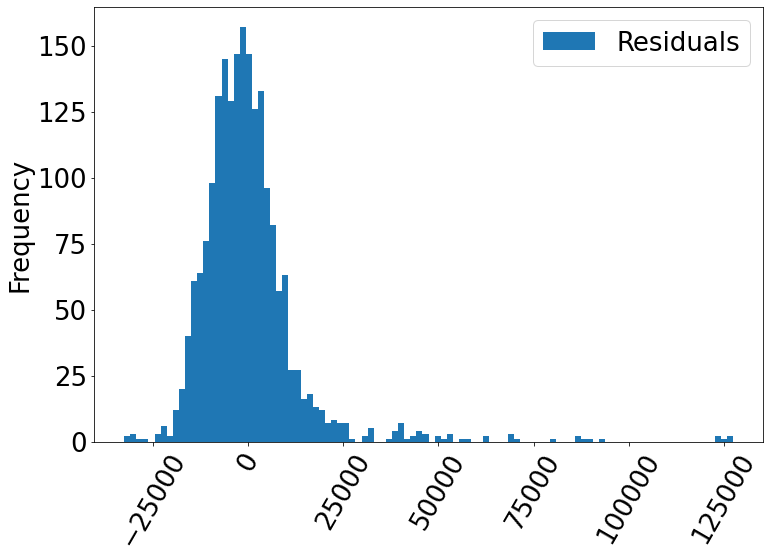

In [22]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (12,8))
reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)
plt.xticks(rotation=60)

<AxesSubplot:ylabel='Frequency'>

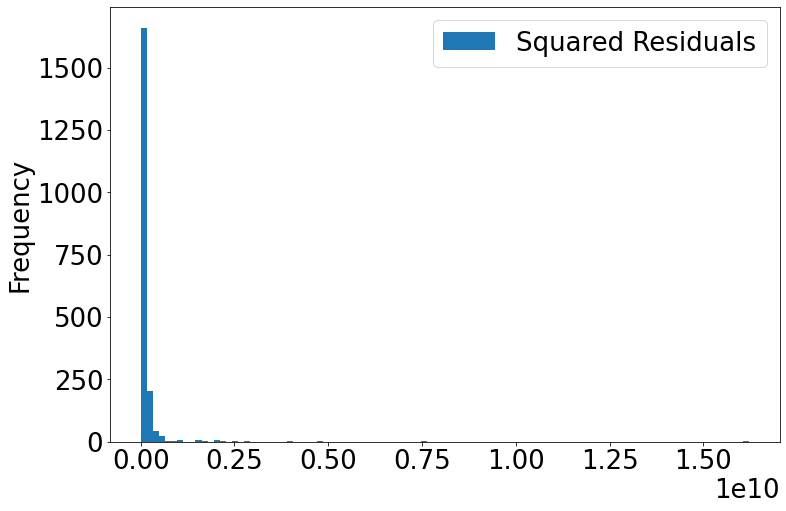

In [23]:
fig, ax = plt.subplots(figsize = (12,8))
reg_data[["Squared Residuals"]].plot.hist(bins =100, ax = ax)

In [24]:
##### countries = data.groupby("ISO_Code").mean().index
# for country in countries:
#     fig, ax = plt.subplots(figsize = (12,8))
#     reg_data[y_var + [y_var[0] + " Predictor"]].loc[country].plot.line(ax = ax, legend = False)    
#     ax.set_title(country)

## Regression logged differences

To normalize the distribution of errors, we will transform the *real GDP* into the growth rate of real GDP. Since even the growth rate of GDP tends to be autocorrelated, we will control for this using a lag. We will not change any of the scores from the economic freedom index, thus implying that the scores tend to operate on the rate of growth.

In [25]:
reg_data = data
reg_data["RGDP Per Capita"] = np.log(data).groupby("ISO_Code")["RGDP Per Capita"].diff() 
reg_data["RGDP Per Capita Lag"] = reg_data["RGDP Per Capita"].groupby("ISO_Code").shift() 
reg_data = reg_data.replace([np.inf, -np.inf], np.nan).dropna(axis = 0, how = "any")
reg_data.loc["USA"]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\JLCat\AppData\Local\Temp\ipykernel_9412\587583937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["RGDP Per Capita"] = np.log(data).groupby("ISO_Code")["RGDP Per Capita"].diff()
C:\Users\JLCat\AppData\Local\Temp\ipykernel_9412\587583937.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["RGDP Per Capita Lag"] 

EFW  Size of Government  Legal System & Property Rights  \
Year                                                                       
2003-01-01  8.454976            7.830378                        7.803444   
2004-01-01  8.443225            7.717933                        7.767612   
2005-01-01  8.353783            7.706034                        7.540888   
2006-01-01  8.318497            7.701156                        7.360503   
2007-01-01  8.394524            7.790872                        7.447685   
2008-01-01  8.244885            7.496386                        7.409211   
2009-01-01  7.965853            7.147290                        7.188374   
2010-01-01  7.972577            7.108888                        7.143095   
2011-01-01  7.906265            7.260760                        6.957723   
2012-01-01  8.012288            7.565472                        7.016540   
2013-01-01  7.900998            7.097752                        6.974508   
2014-01-01  7.969703            7.126057                        7.099625   
2015-01-01  8.085664            7.121655                        7.226306   

            Sound Money  Freedom to trade internationally  Regulation  \
Year                                                                    
2003-01-01     9.815523                          8.142189    8.683346   
2004-01-01     9.727209                          8.194439    8.808933   
2005-01-01     9.758164                          8.063767    8.700063   
2006-01-01     9.655075                          8.079715    8.796037   
2007-01-01     9.735613                          8.114240    8.884209   
2008-01-01     9.686262                          7.998733    8.633830   
2009-01-01     9.604751                          7.723552    8.165299   
2010-01-01     9.678239                          7.720760    8.211905   
2011-01-01     9.305630                          7.711284    8.295927   
2012-01-01     9.323542                          7.699527    8.456360   
2013-01-01     9.420297                          7.374713    8.637721   
2014-01-01     9.389649                          7.573566    8.659619   
2015-01-01     9.761051                          7.535949    8.783357   

            RGDP Per Capita  RGDP Per Capita Lag  
Year                                              
2003-01-01         0.019075             0.008443  
2004-01-01         0.027916             0.019075  
2005-01-01         0.023680             0.027916  
2006-01-01         0.016676             0.023680  
2007-01-01         0.008127             0.016676  
2008-01-01        -0.012374             0.008127  
2009-01-01        -0.036934            -0.012374  
2010-01-01         0.016660            -0.036934  
2011-01-01         0.008247             0.016660  
2012-01-01         0.014370             0.008247  
2013-01-01         0.009264             0.014370  
2014-01-01         0.015625             0.009264  
2015-01-01         0.017784             0.015625

In [26]:
reg_data.corr().round(2)

EFW  Size of Government  \
EFW                               1.00                0.26   
Size of Government                0.26                1.00   
Legal System & Property Rights    0.80               -0.17   
Sound Money                       0.85                0.11   
Freedom to trade internationally  0.89                0.15   
Regulation                        0.81                0.09   
RGDP Per Capita                   0.00                0.10   
RGDP Per Capita Lag              -0.00                0.11   

                                  Legal System & Property Rights  Sound Money  \
EFW                                                         0.80         0.85   
Size of Government                                         -0.17         0.11   
Legal System & Property Rights                              1.00         0.60   
Sound Money                                                 0.60         1.00   
Freedom to trade internationally                            0.67         0.76   
Regulation                                                  0.66         0.57   
RGDP Per Capita                                            -0.02        -0.04   
RGDP Per Capita Lag                                        -0.02        -0.03   

                                  Freedom to trade internationally  \
EFW                                                           0.89   
Size of Government                                            0.15   
Legal System & Property Rights                                0.67   
Sound Money                                                   0.76   
Freedom to trade internationally                              1.00   
Regulation                                                    0.67   
RGDP Per Capita                                               0.00   
RGDP Per Capita Lag                                          -0.02   

                                  Regulation  RGDP Per Capita  \
EFW                                     0.81             0.00   
Size of Government                      0.09             0.10   
Legal System & Property Rights          0.66            -0.02   
Sound Money                             0.57            -0.04   
Freedom to trade internationally        0.67             0.00   
Regulation                              1.00             0.00   
RGDP Per Capita                         0.00             1.00   
RGDP Per Capita Lag                    -0.03             0.42   

                                  RGDP Per Capita Lag  
EFW                                             -0.00  
Size of Government                               0.11  
Legal System & Property Rights                  -0.02  
Sound Money                                     -0.03  
Freedom to trade internationally                -0.02  
Regulation                                      -0.03  
RGDP Per Capita                                  0.42  
RGDP Per Capita Lag                              1.00

In [27]:
y_var = ["RGDP Per Capita"]
x_vars = ["Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation"]
#           "RGDP Per Capita Lag"]

y = reg_data[y_var]
X = reg_data[x_vars]
# X["Constant"] = 1
results = sm.OLS(y, X).fit()
reg_data["Predictor"] = results.predict()

In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        RGDP Per Capita   R-squared (uncentered):                   0.233
Model:                            OLS   Adj. R-squared (uncentered):              0.230
Method:                 Least Squares   F-statistic:                              103.0
Date:                Wed, 28 Dec 2022   Prob (F-statistic):                    4.74e-95
Time:                        09:06:05   Log-Likelihood:                          2989.1
No. Observations:                1703   AIC:                                     -5968.
Df Residuals:                    1698   BIC:                                     -5941.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government                   0.0043      0.001      4.898      0.000       0.003       0.006
Legal System & Property Rights       0.0006      0.001      0.586      0.558      -0.001       0.002
Sound Money                         -0.0029      0.001     -2.718      0.007      -0.005      -0.001
Freedom to trade internationally     0.0016      0.002      0.997      0.319      -0.002       0.005
Regulation                           0.0005      0.001      0.382      0.702      -0.002       0.003
==============================================================================
Omnibus:                      999.652   Durbin-Watson:                   1.297
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32075.491
Skew:                          -2.183   Prob(JB):                         0.00
Kurtosis:                      23.808   Cond. No.                         27.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:ylabel='Frequency'>

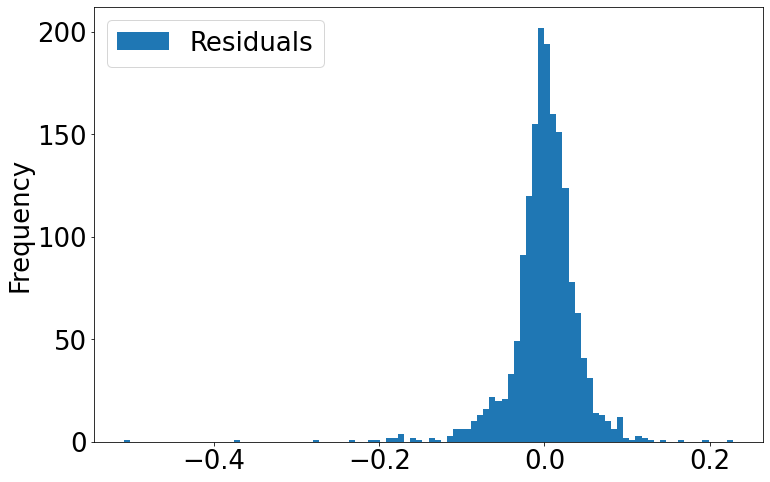

In [29]:
reg_data["Residuals"] = results.resid
fig, ax = plt.subplots(figsize = (12,8))

reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)

In [30]:
betaEstimates = results.params
tStats = results.tvalues
pValues = results.pvalues
stdErrors = results.bse

resultsDict = {"Beta Estimates" : betaEstimates,
              "t-stats":tStats,
              "p-values":pValues,
              "Standard Errors":stdErrors}
resultsDF = pd.DataFrame(resultsDict)
resultsDF.round(3)

Beta Estimates  t-stats  p-values  \
Size of Government                         0.004    4.898     0.000   
Legal System & Property Rights             0.001    0.586     0.558   
Sound Money                               -0.003   -2.718     0.007   
Freedom to trade internationally           0.002    0.997     0.319   
Regulation                                 0.001    0.382     0.702   

                                  Standard Errors  
Size of Government                          0.001  
Legal System & Property Rights              0.001  
Sound Money                                 0.001  
Freedom to trade internationally            0.002  
Regulation                                  0.001

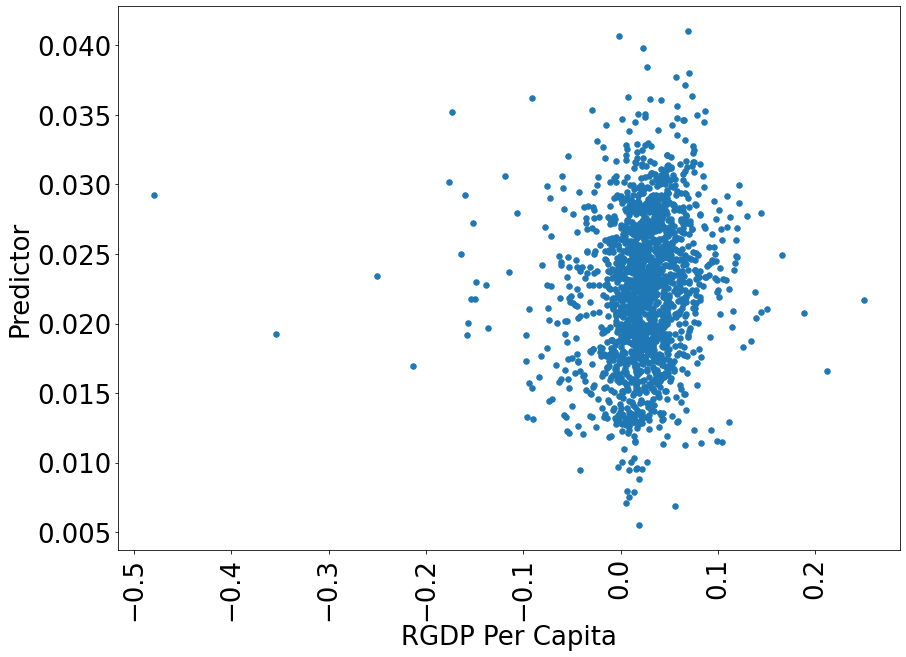

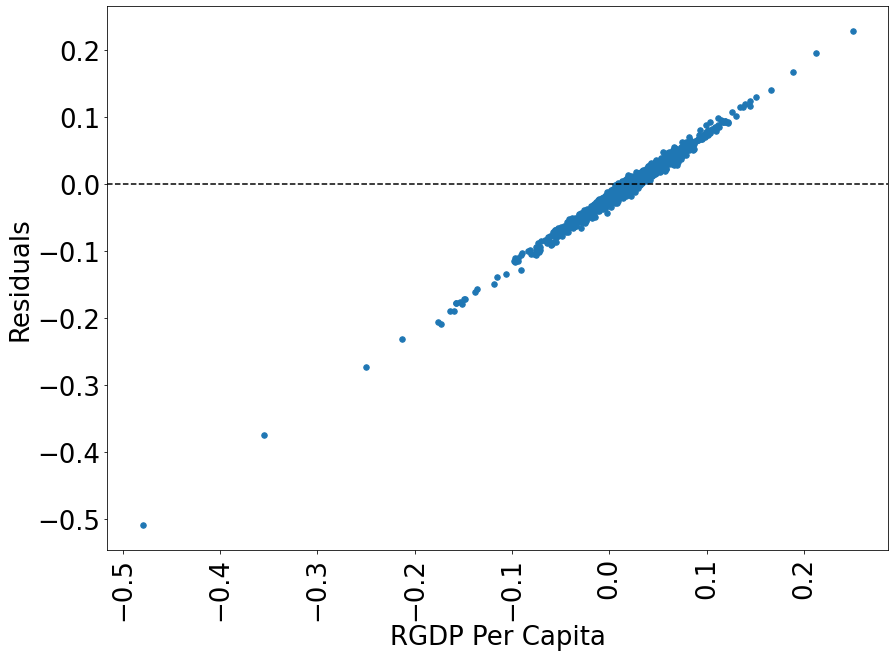

In [31]:
fig, ax = plt.subplots(figsize = (14,10))
reg_data.plot.scatter(x = y_var[0],
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
reg_data.plot.scatter(x = y_var[0],
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.xticks(rotation=90)
plt.show()
plt.close()

In [32]:
countries = reg_data.groupby("ISO_Code").mean().index
plot_data = reg_data[y_var + ["Predictor"]]
for key in plot_data:
    plot_data[key] = plot_data[key] + 1

plot_data

C:\Users\JLCat\AppData\Local\Temp\ipykernel_9412\2487526735.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data[key] = plot_data[key] + 1


RGDP Per Capita  Predictor
ISO_Code Year                                  
AGO      2008-01-01         1.101085   1.021893
         2009-01-01         0.995453   1.029087
         2010-01-01         1.005051   1.023232
         2011-01-01         1.009526   1.022981
         2012-01-01         1.021474   1.020022
...                              ...        ...
ZWE      2011-01-01         1.076090   1.028585
         2012-01-01         1.057085   1.025275
         2013-01-01         1.000000   1.019976
         2014-01-01         0.993746   1.017938
         2015-01-01         0.978439   1.018290

[1703 rows x 2 columns]

In [33]:
plot_data.groupby("ISO_Code").cumprod().loc["GBR"][y_var + ["Predictor"]]

RGDP Per Capita  Predictor
Year                                  
2003-01-01         1.029419   1.026511
2004-01-01         1.049253   1.052549
2005-01-01         1.072796   1.079077
2006-01-01         1.091440   1.106130
2007-01-01         1.110471   1.133369
2008-01-01         1.094738   1.157524
2009-01-01         1.038048   1.182500
2010-01-01         1.049592   1.206519
2011-01-01         1.057092   1.231009
2012-01-01         1.063541   1.255537
2013-01-01         1.076549   1.281938
2014-01-01         1.100994   1.307185
2015-01-01         1.116149   1.333026

C:\Users\JLCat\AppData\Local\Temp\ipykernel_9412\799958213.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (12,8))


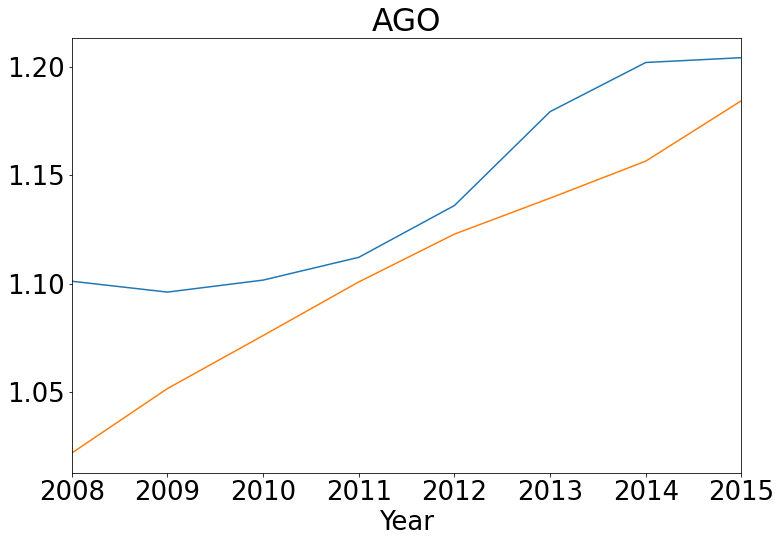

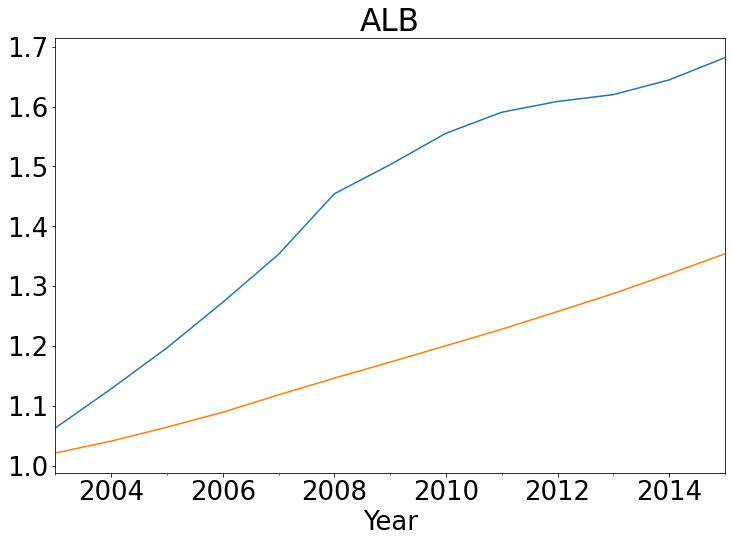

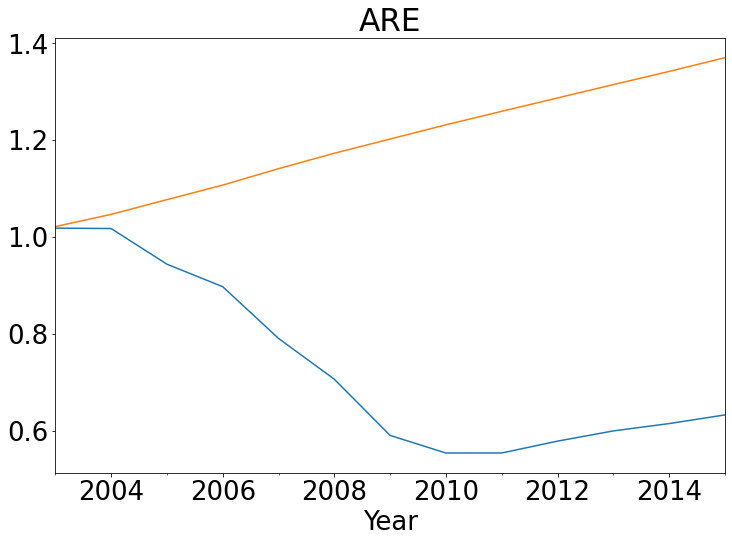

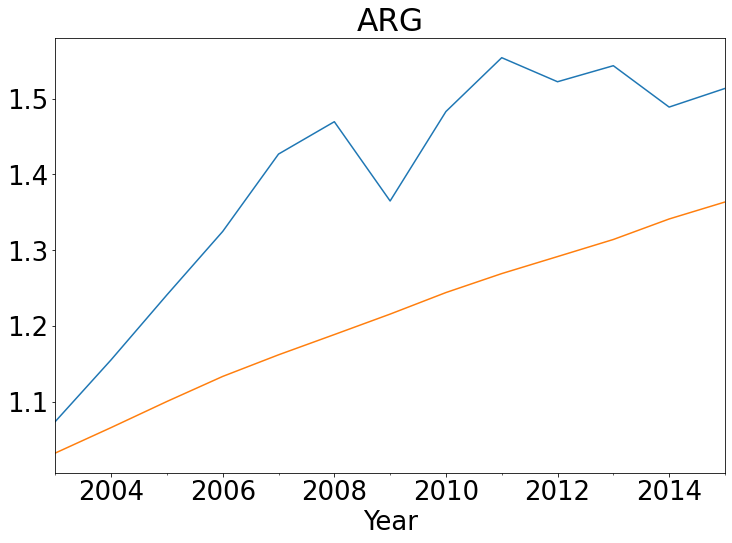

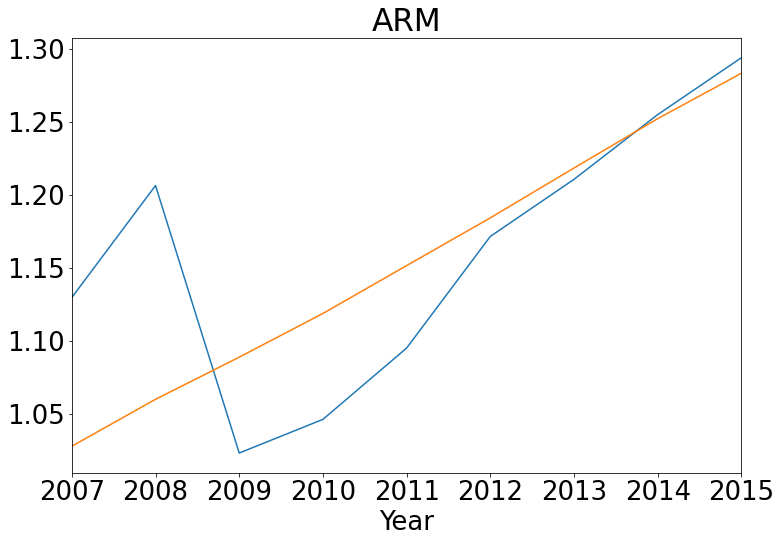

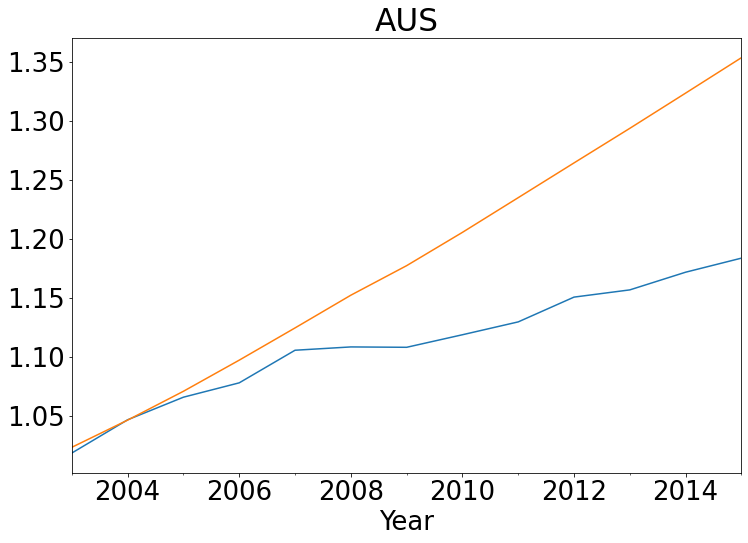

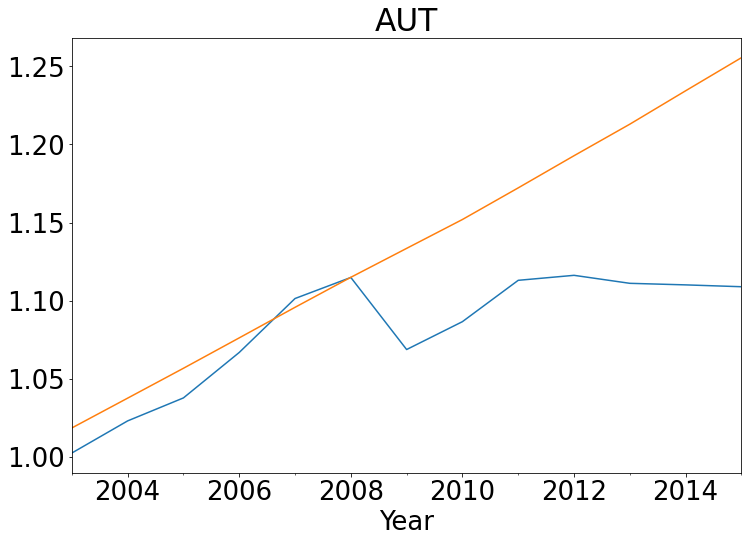

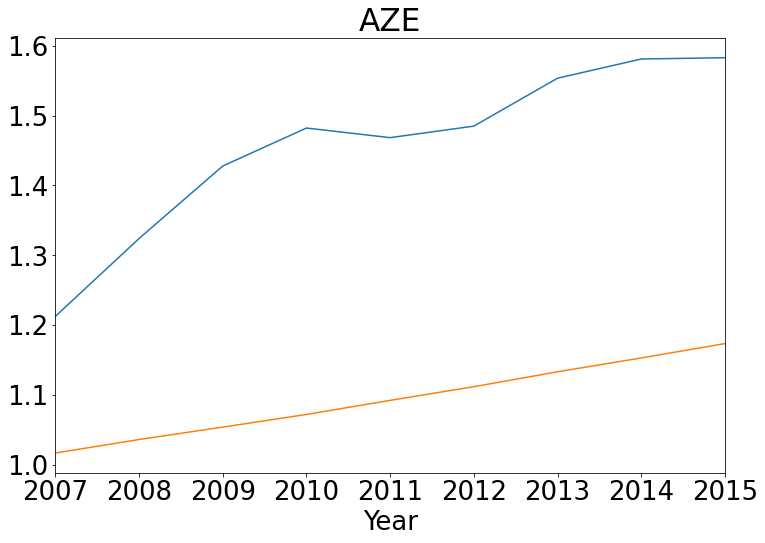

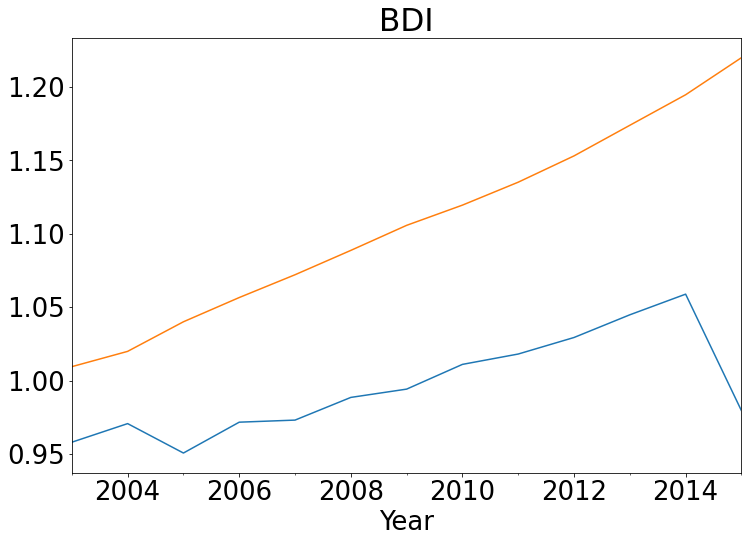

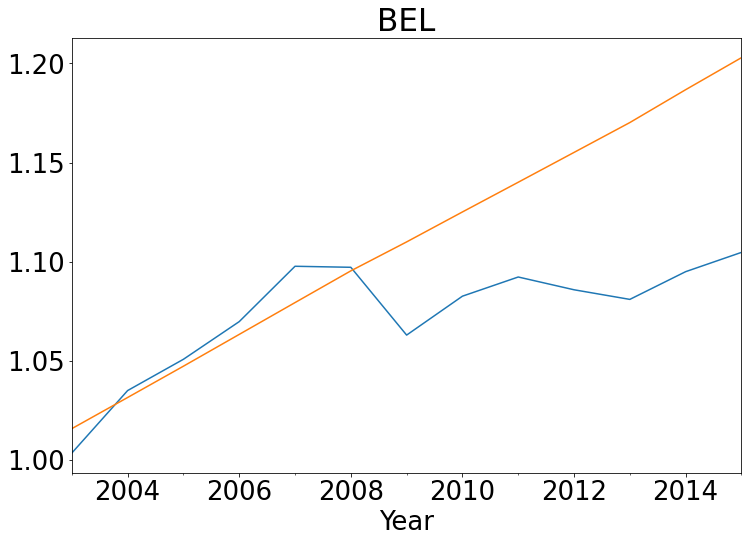

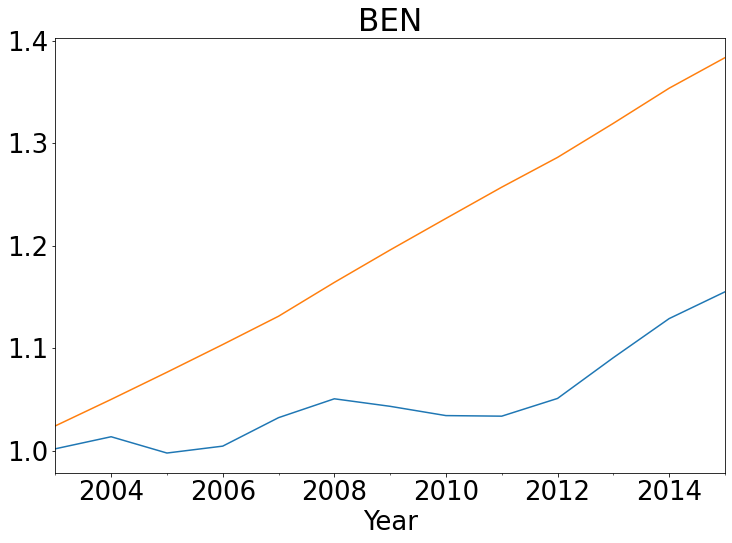

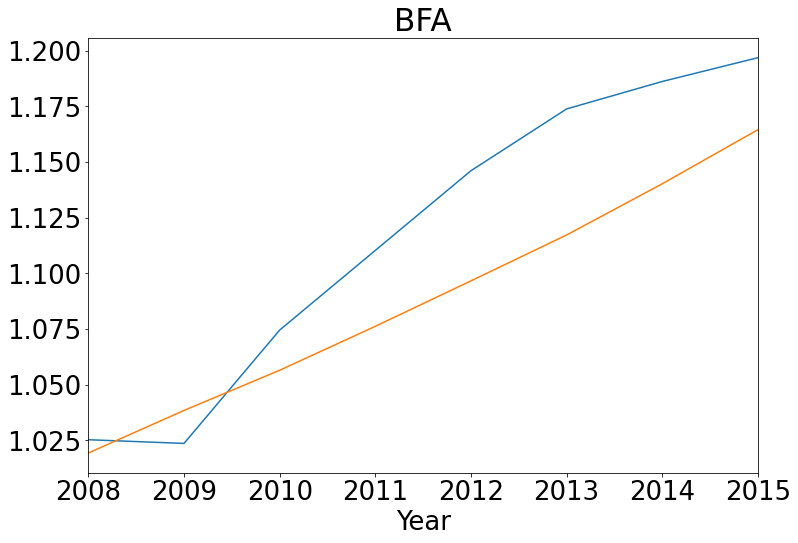

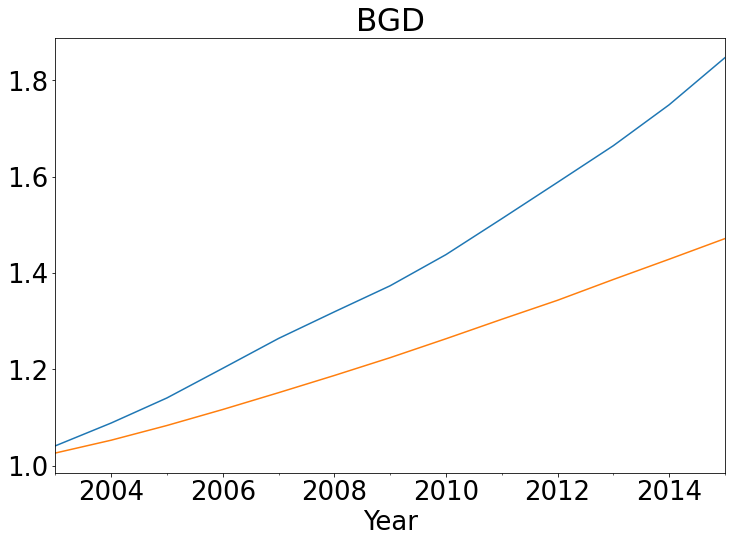

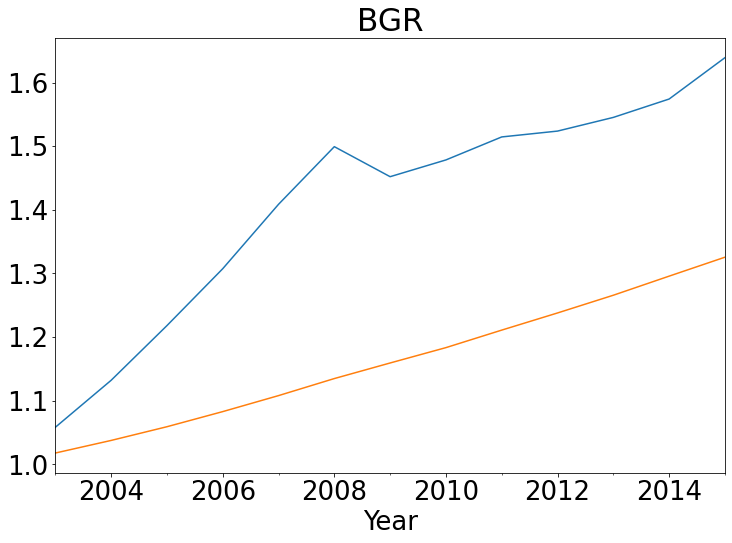

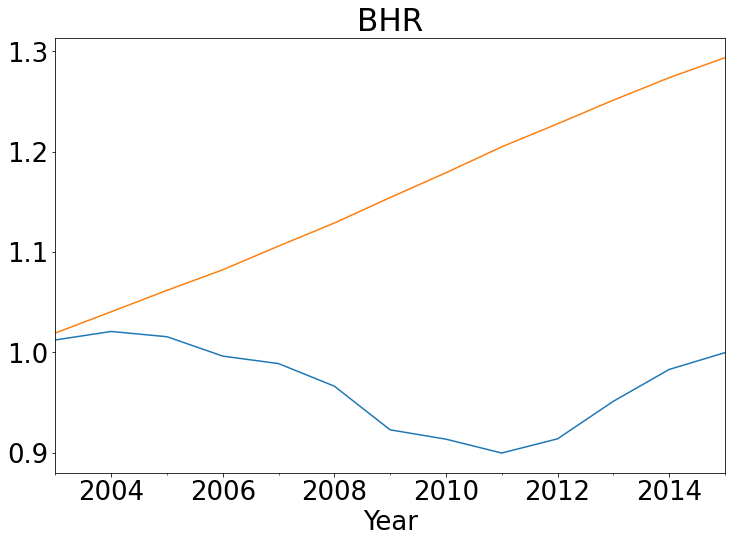

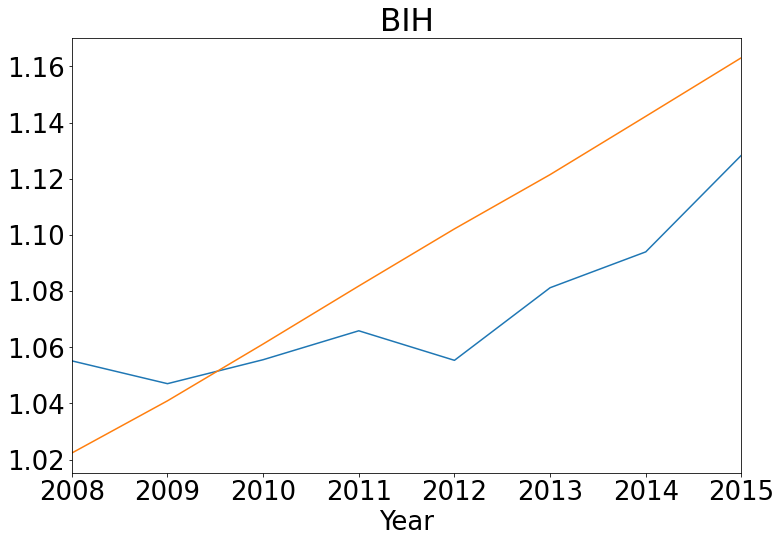

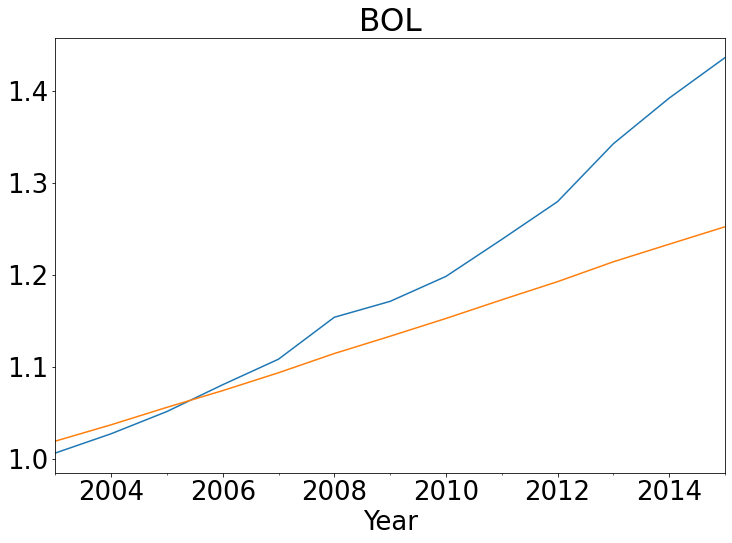

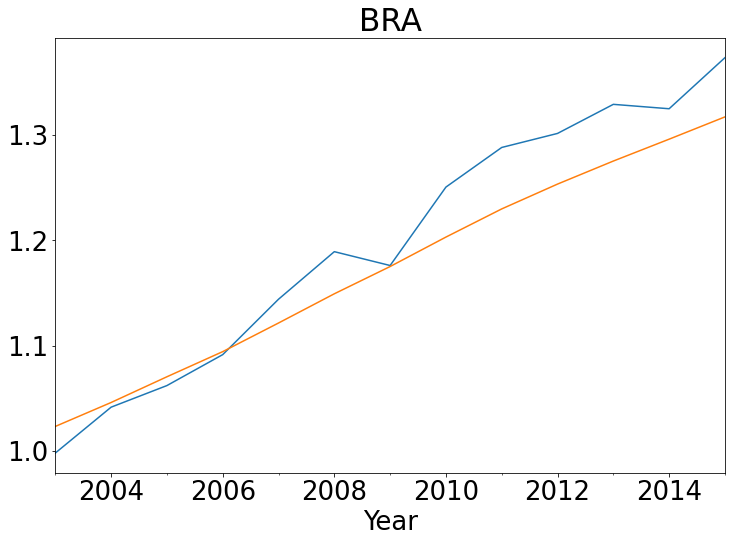

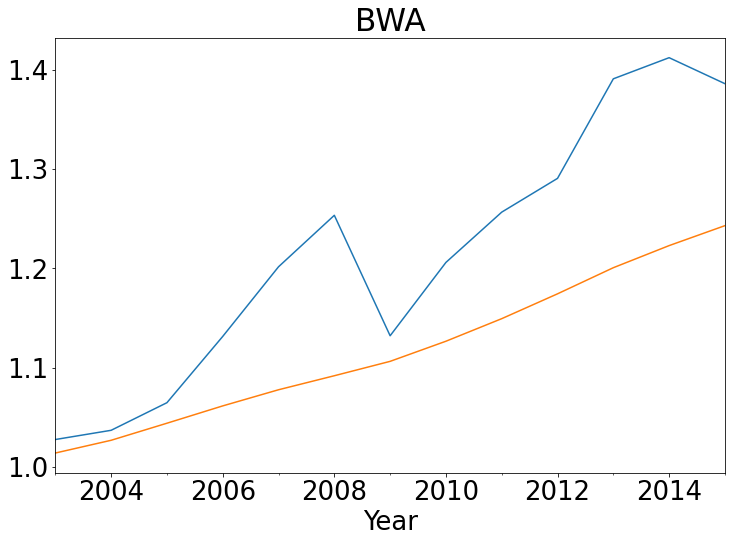

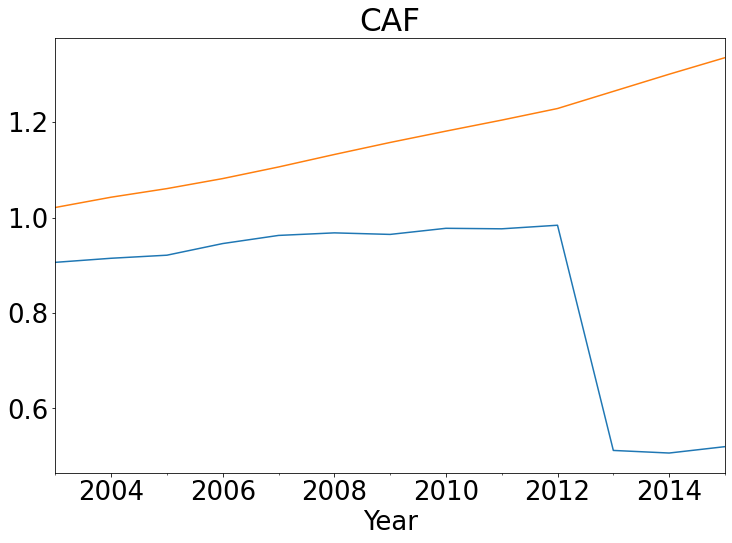

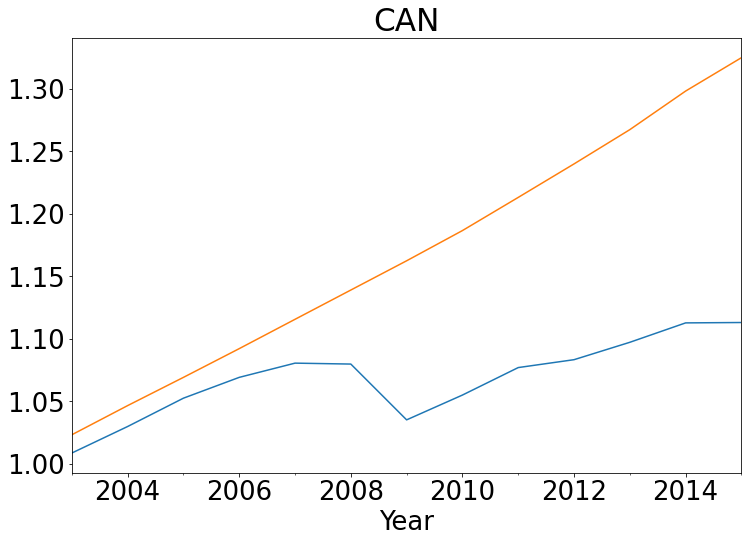

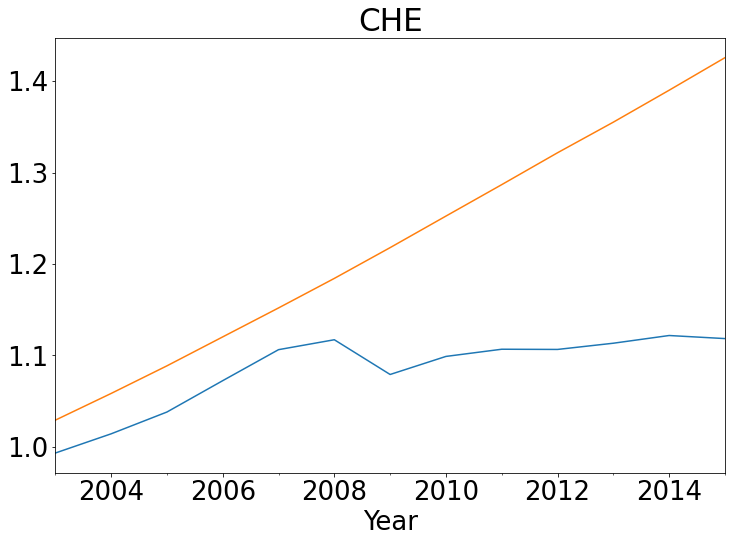

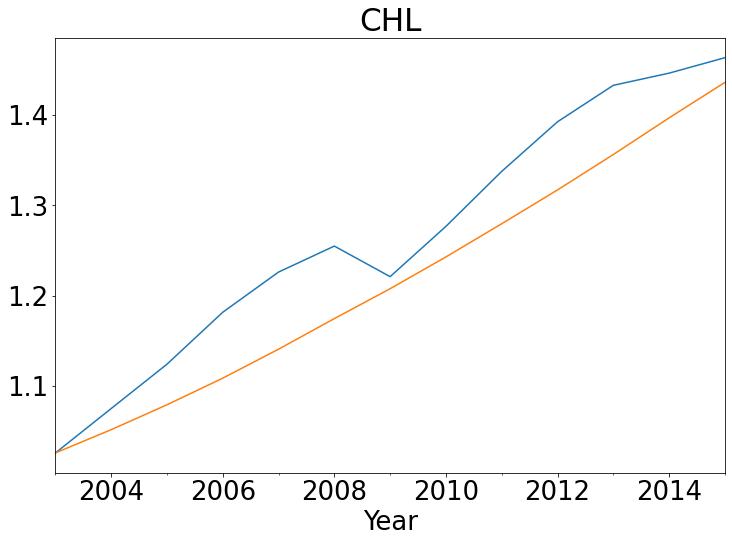

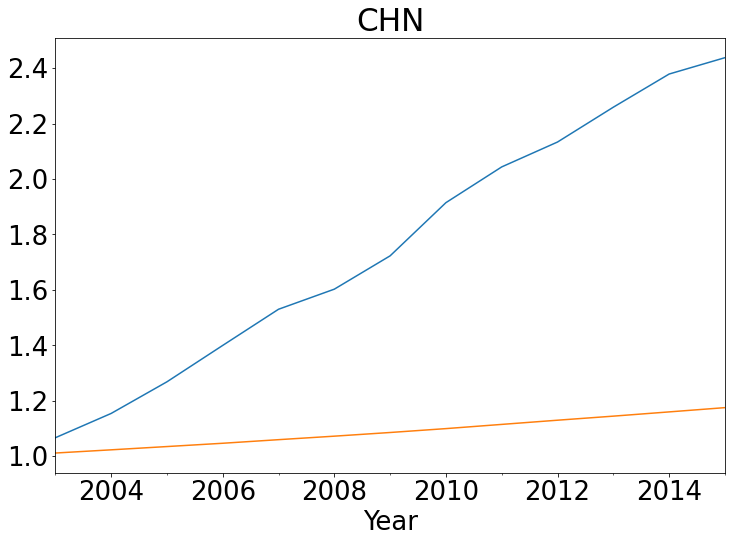

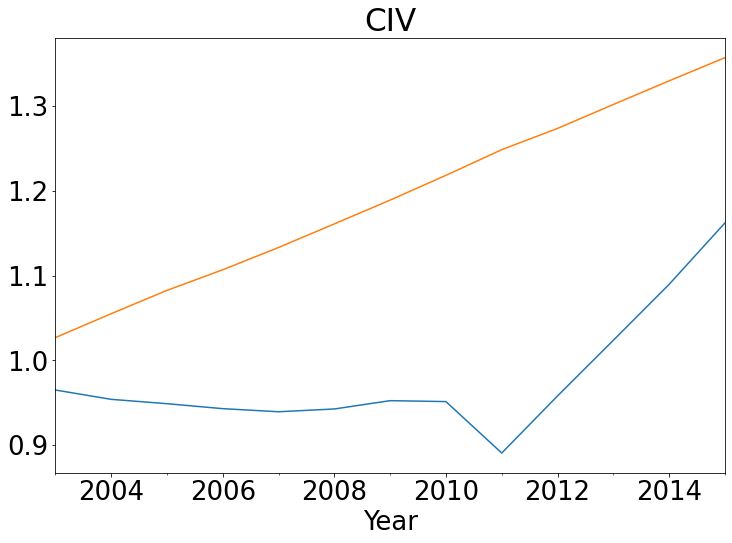

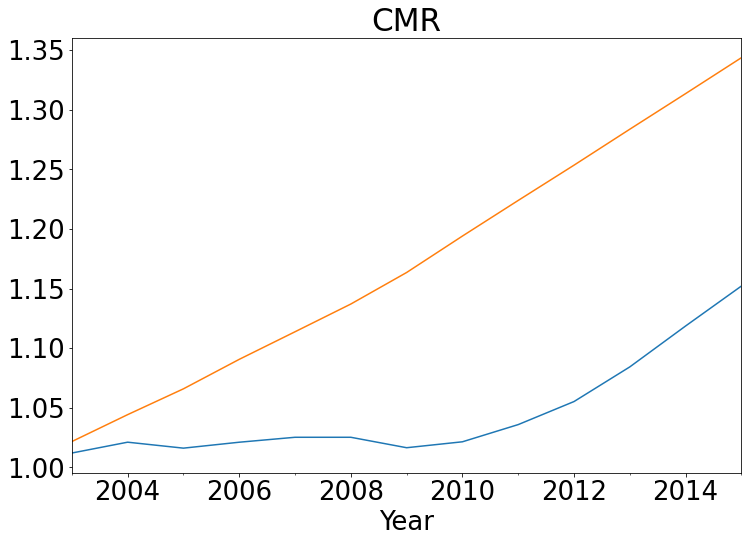

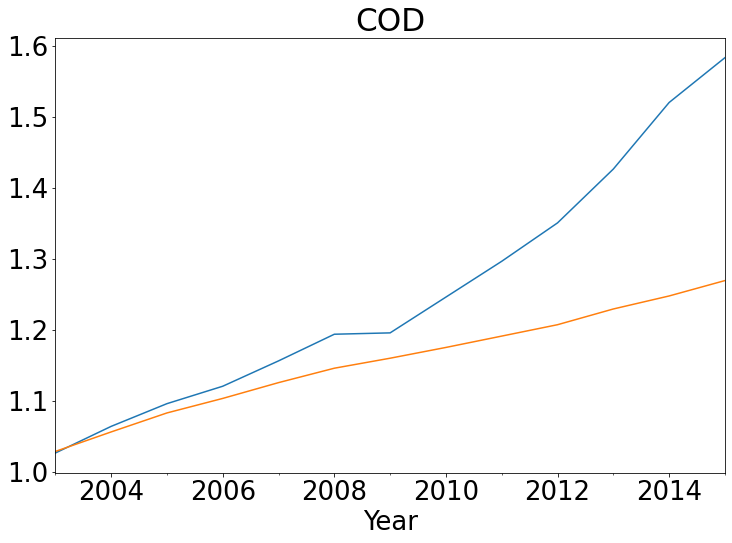

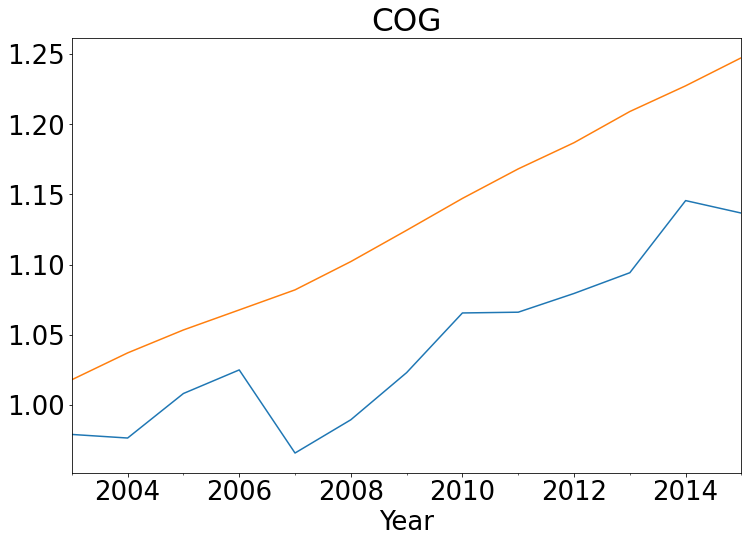

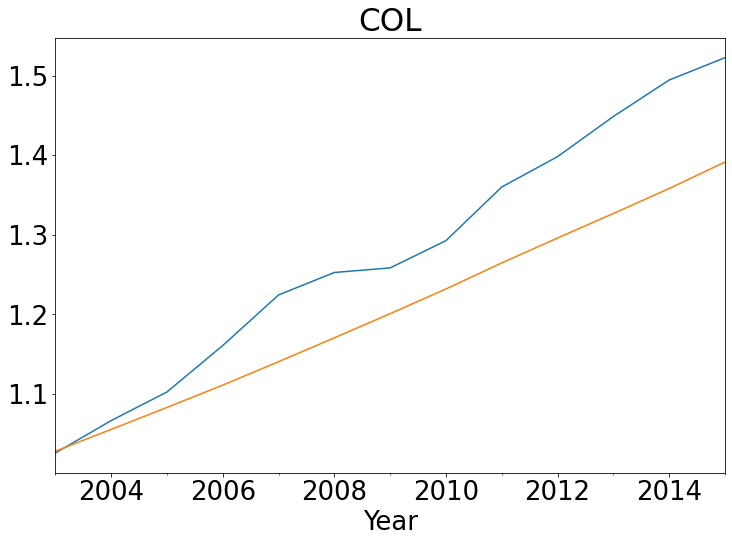

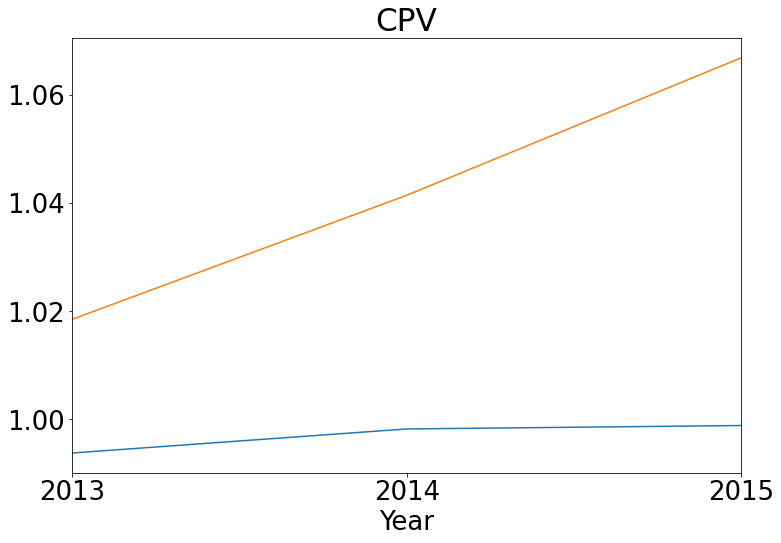

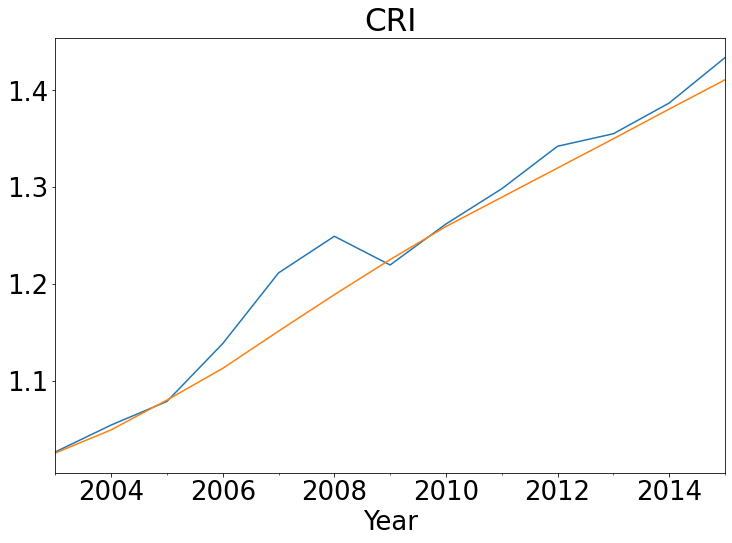

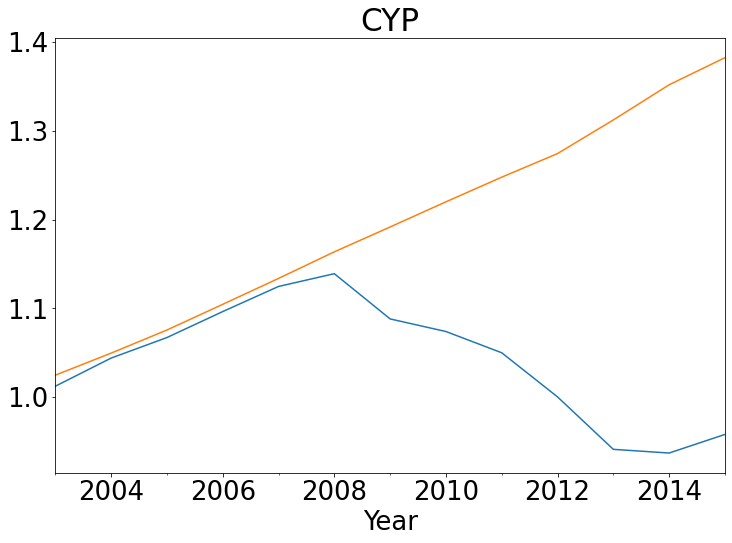

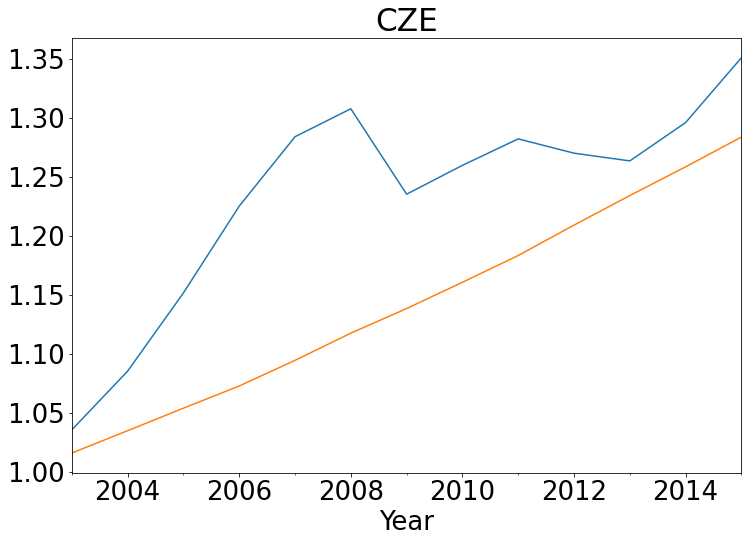

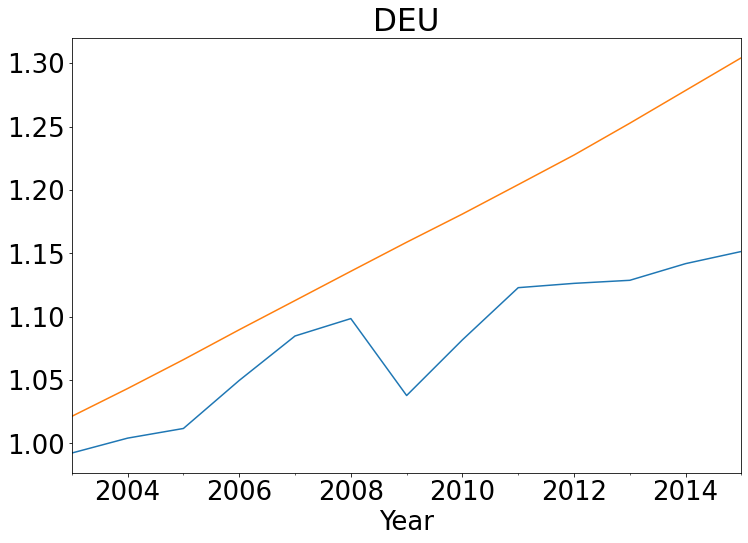

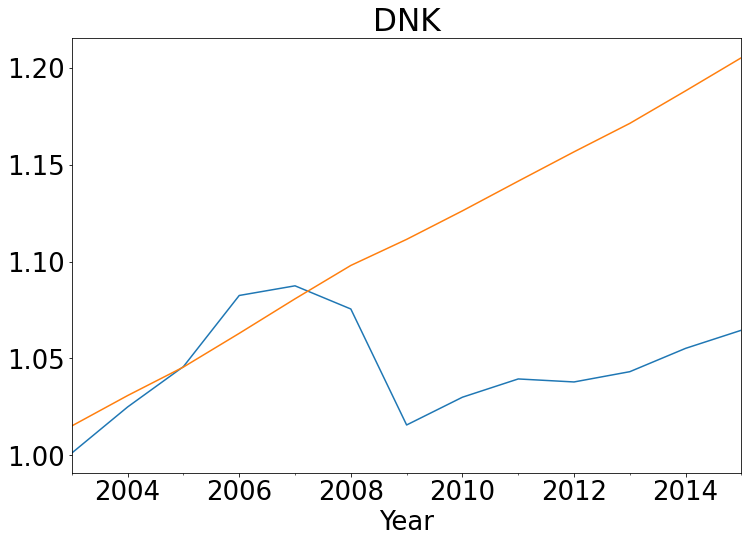

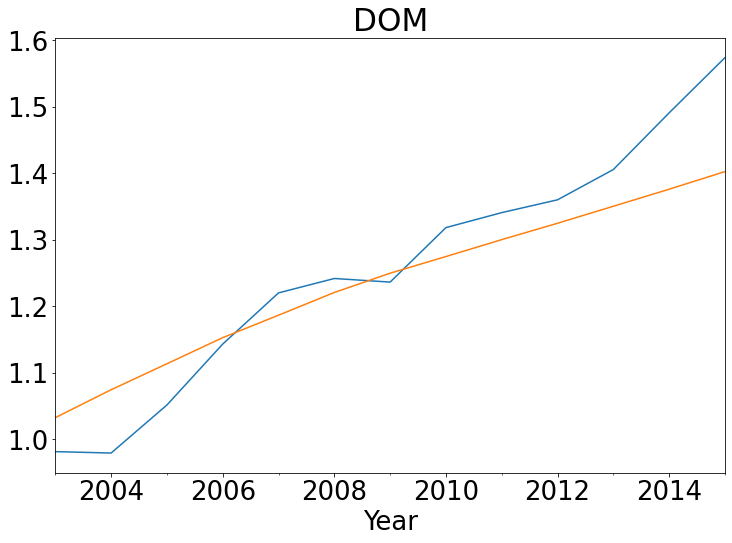

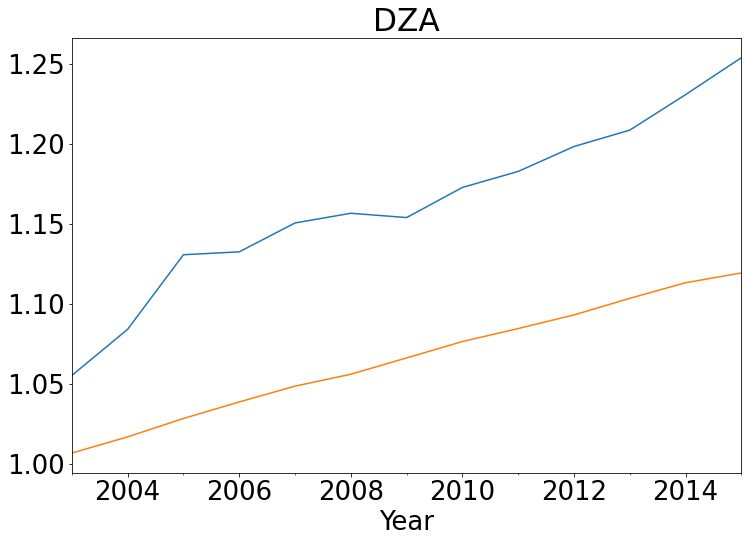

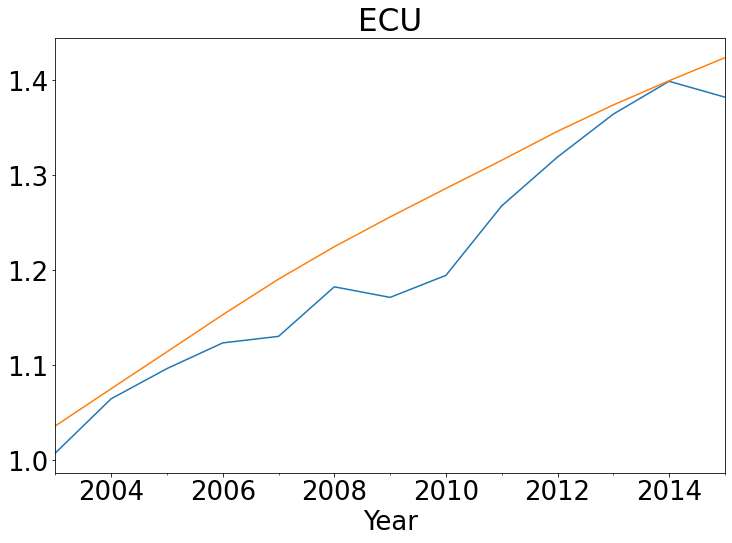

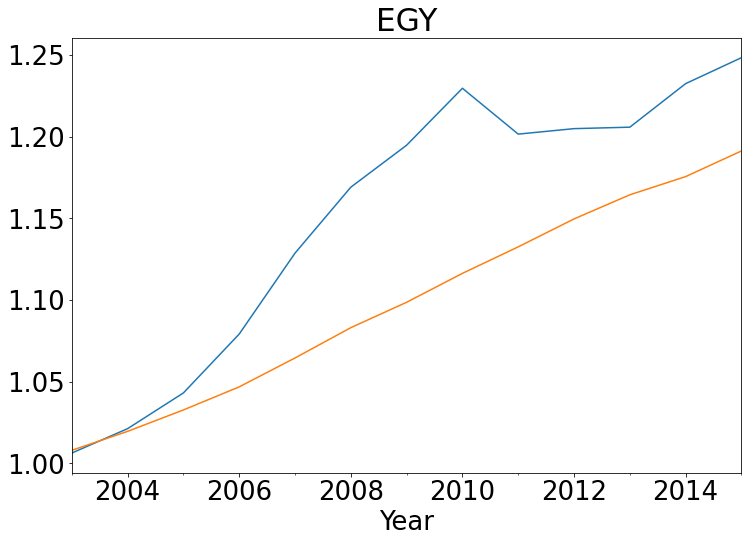

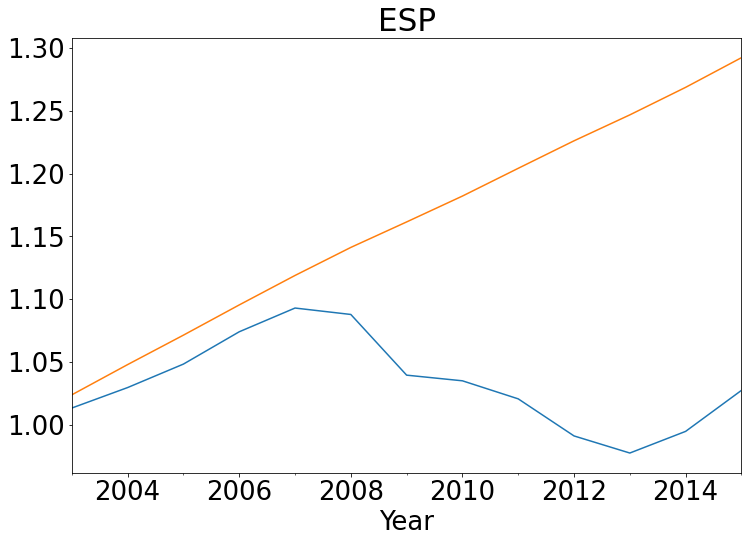

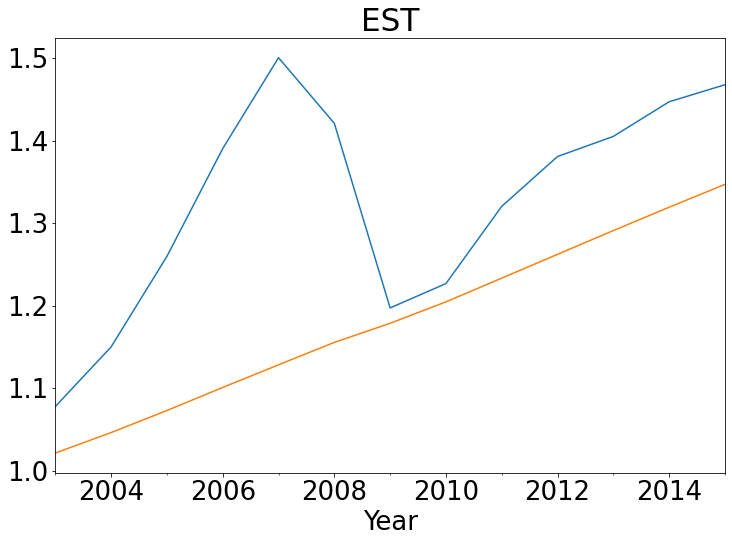

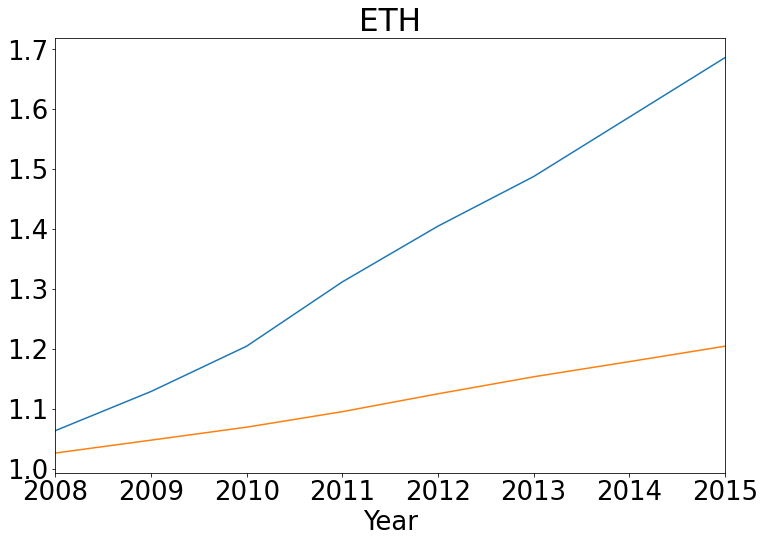

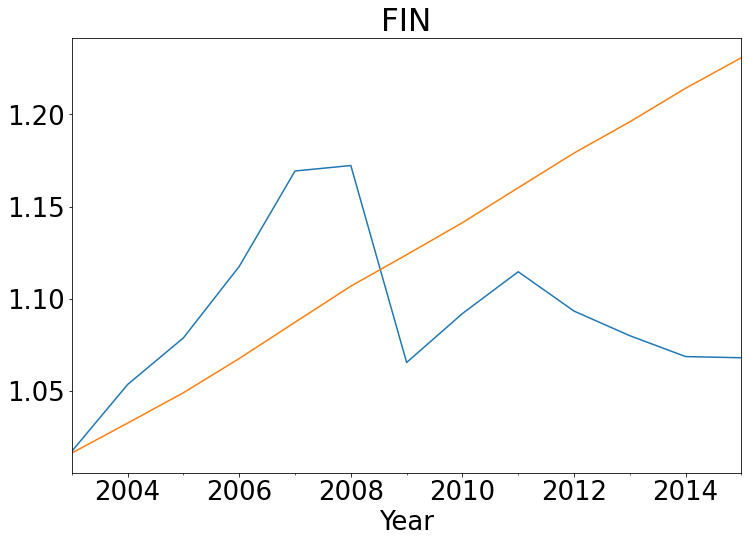

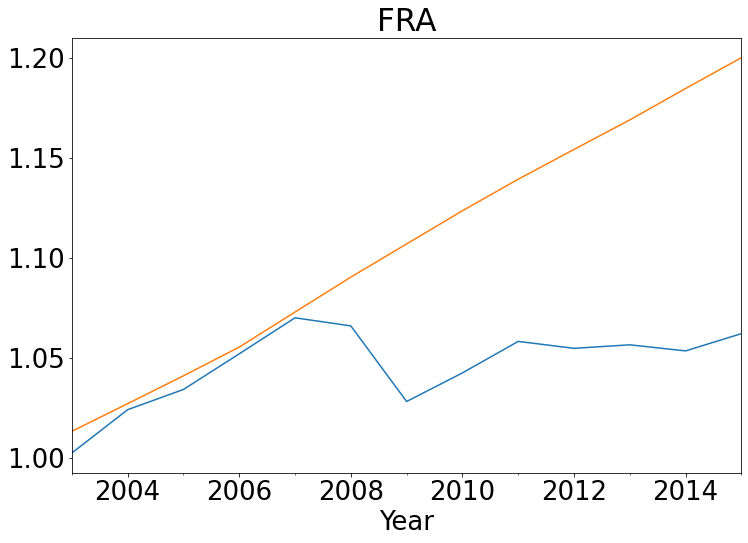

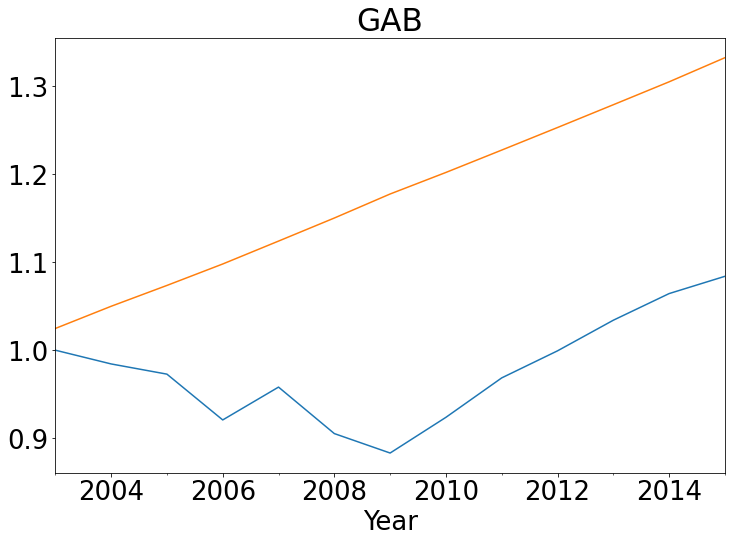

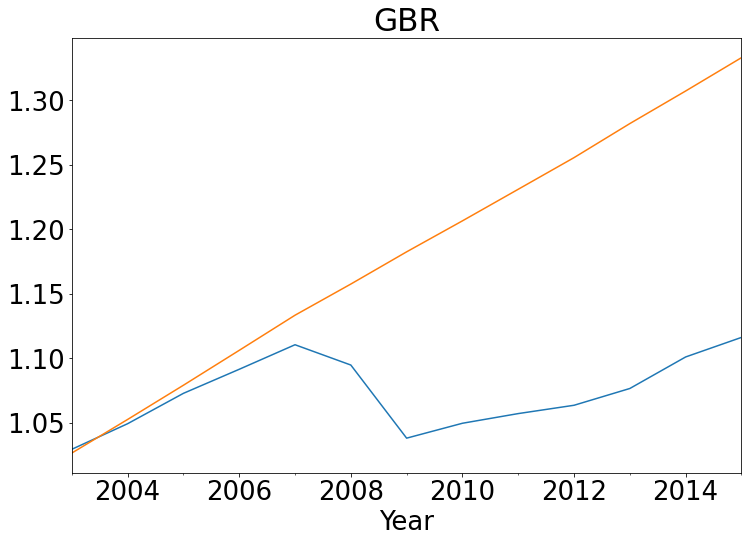

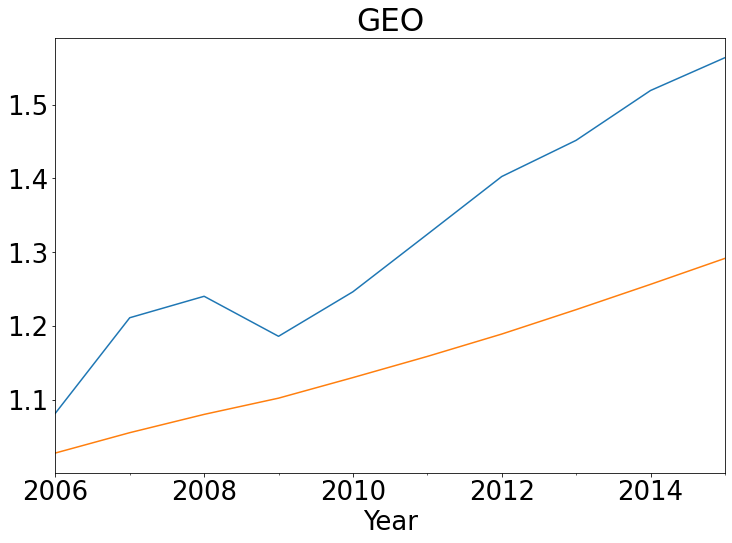

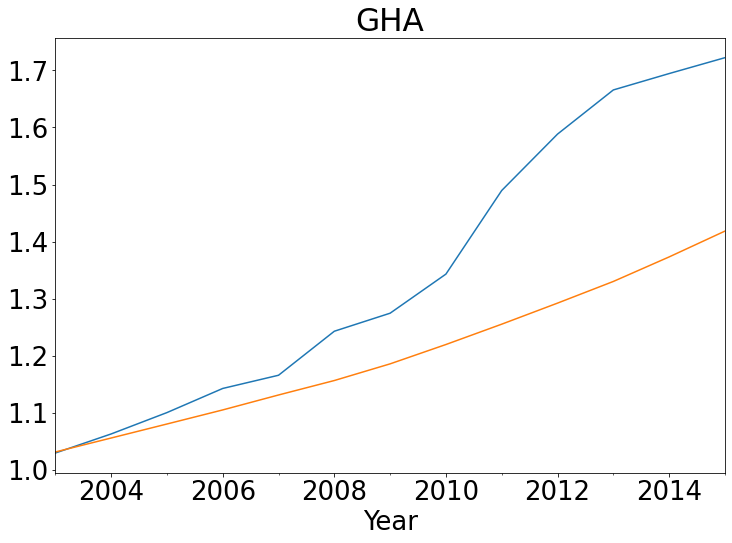

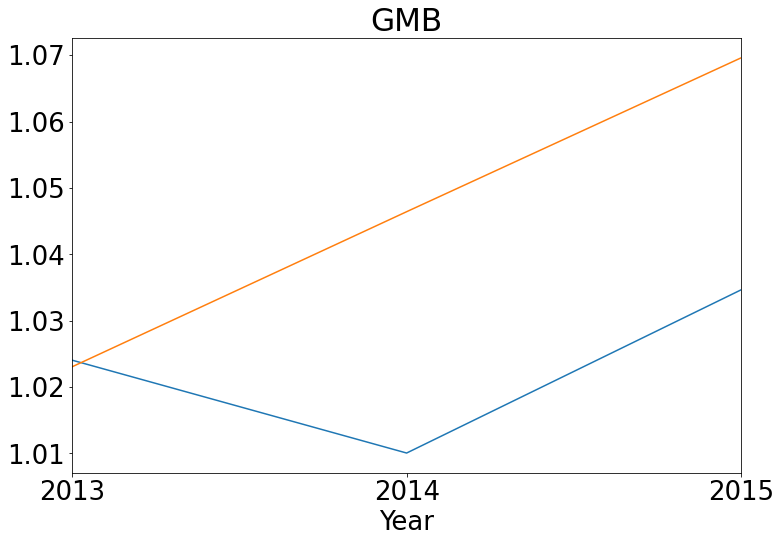

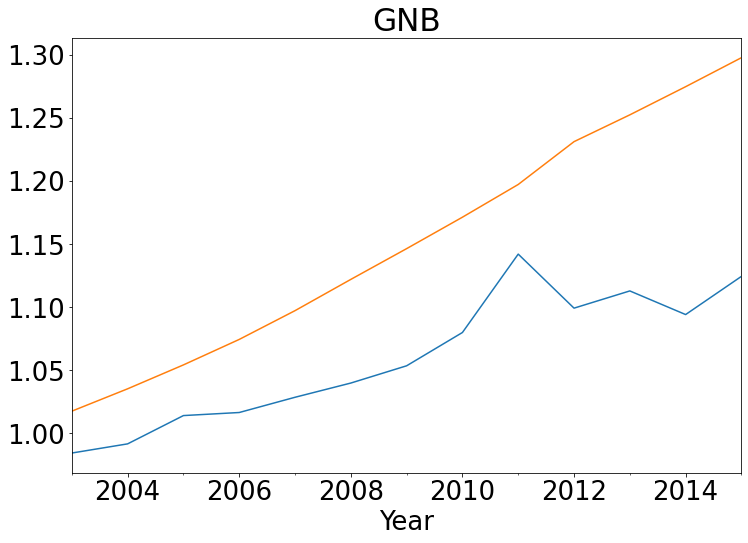

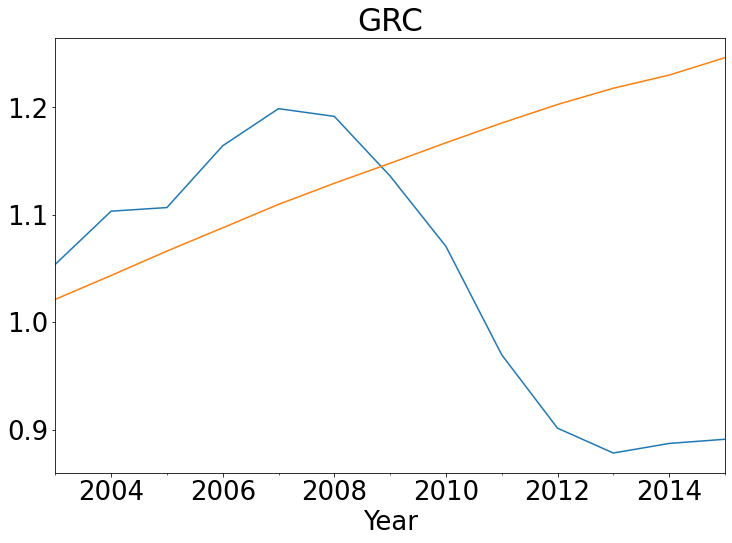

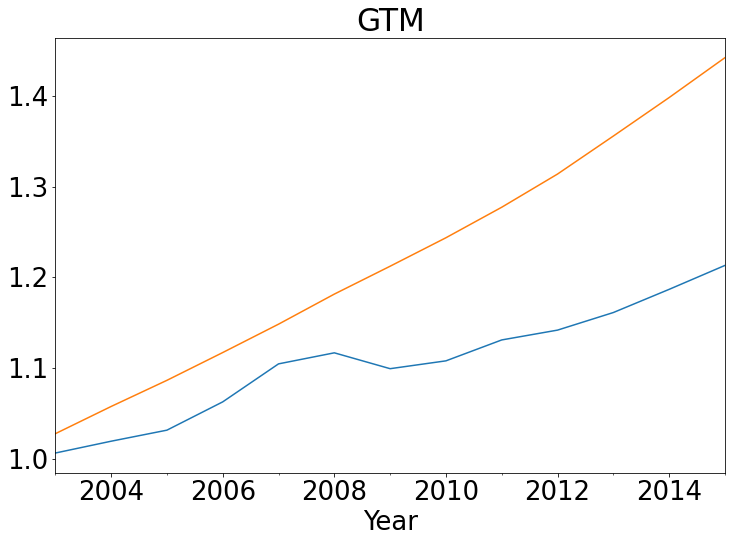

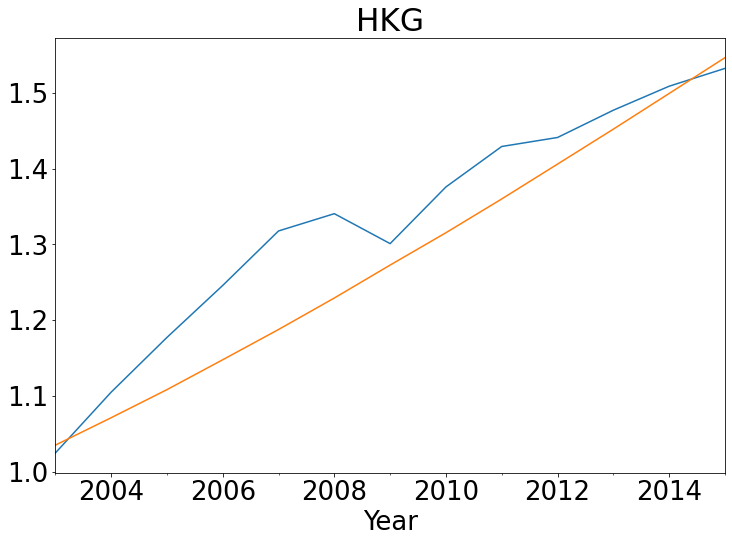

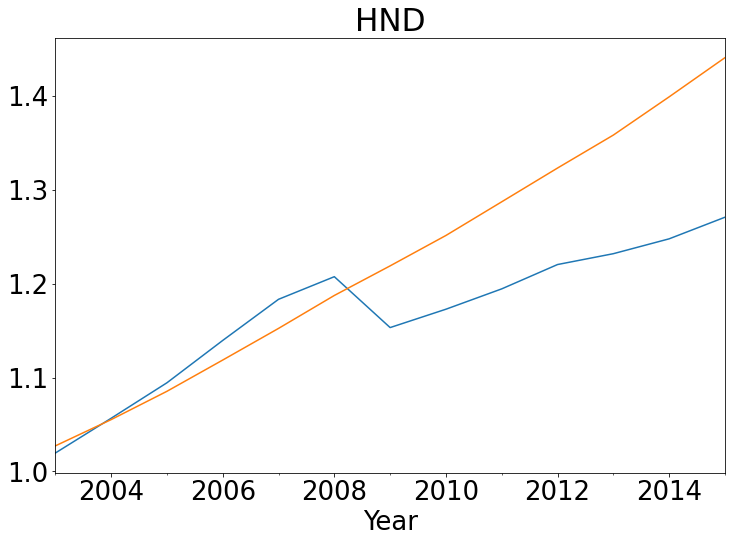

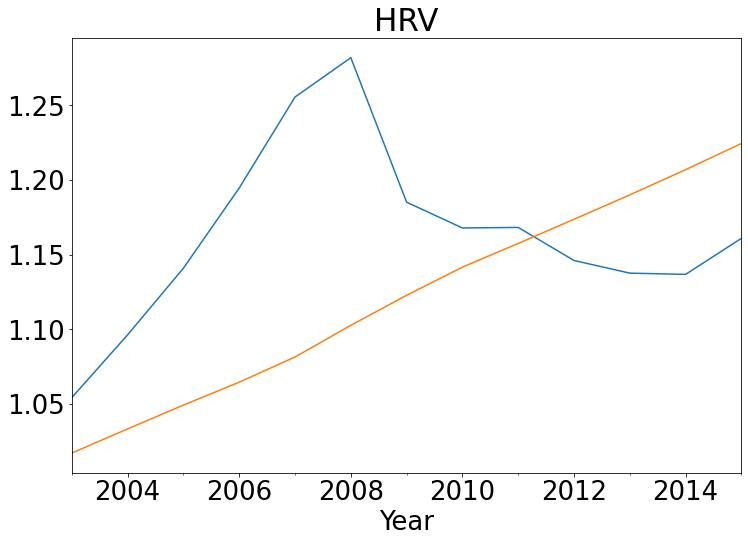

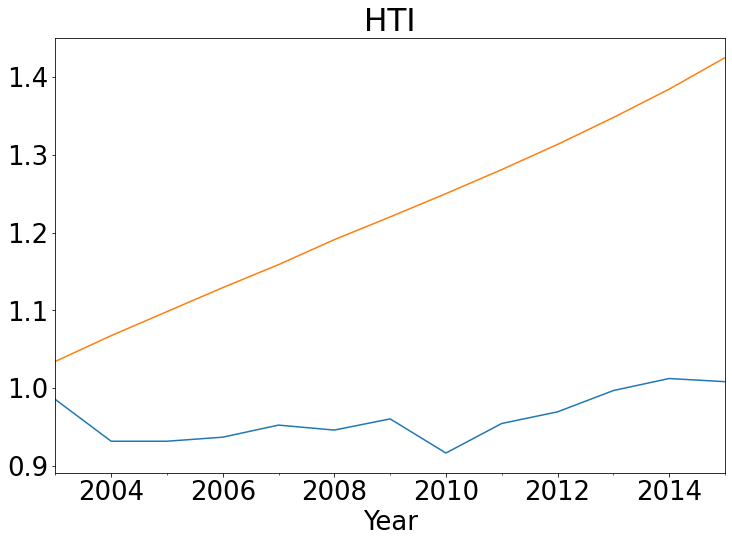

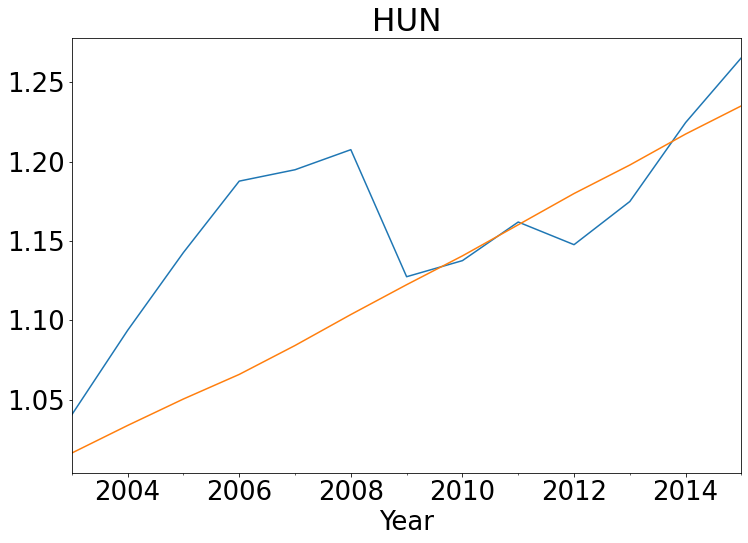

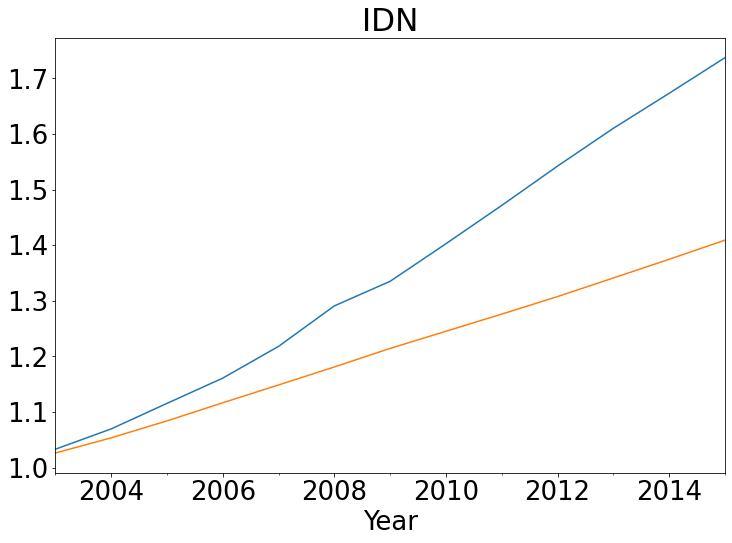

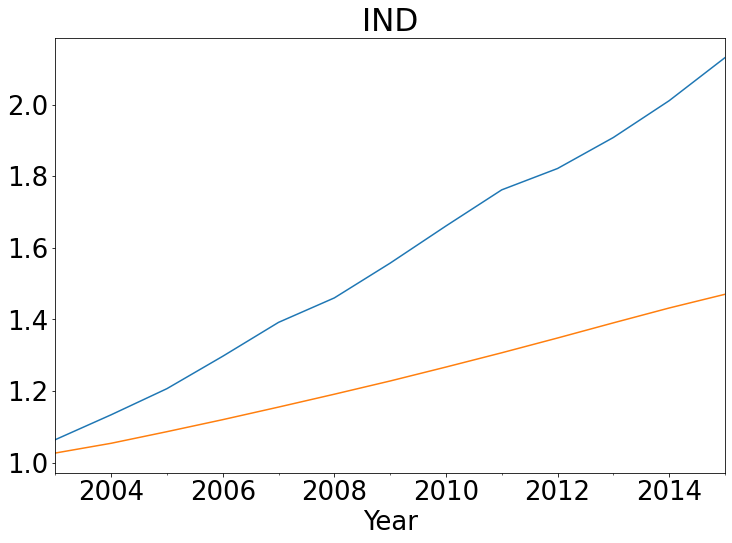

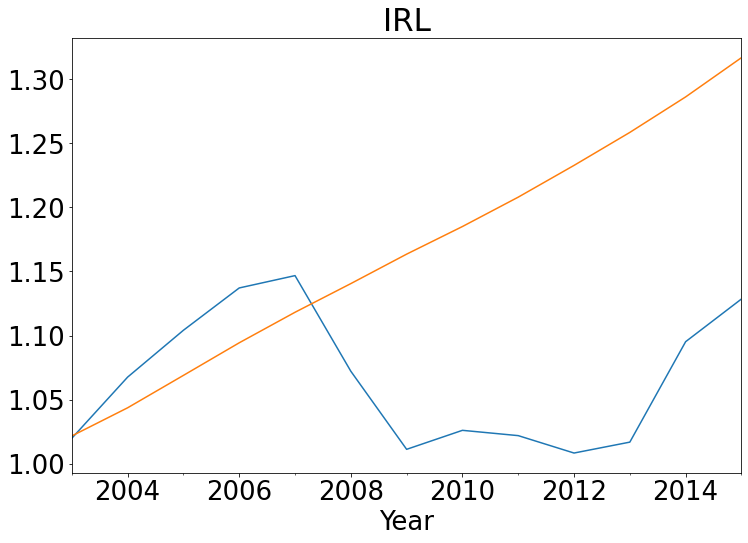

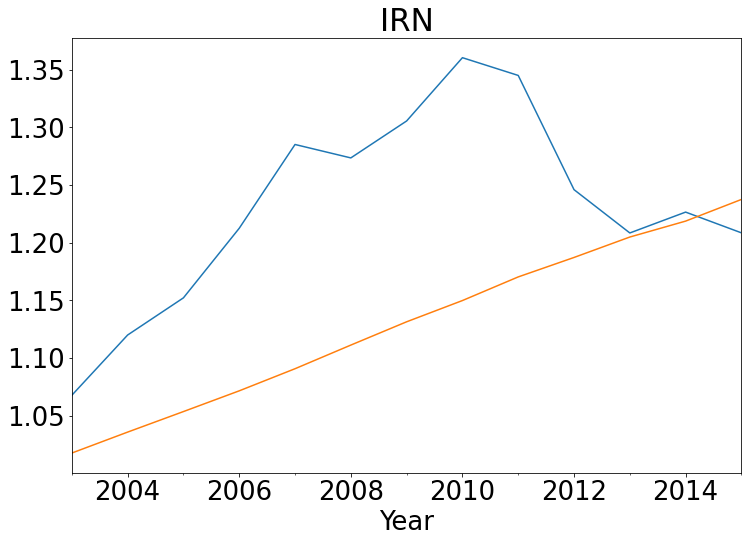

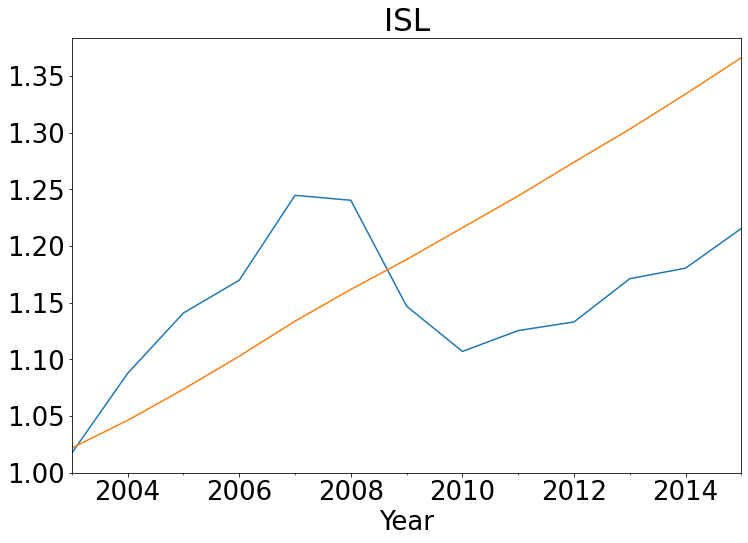

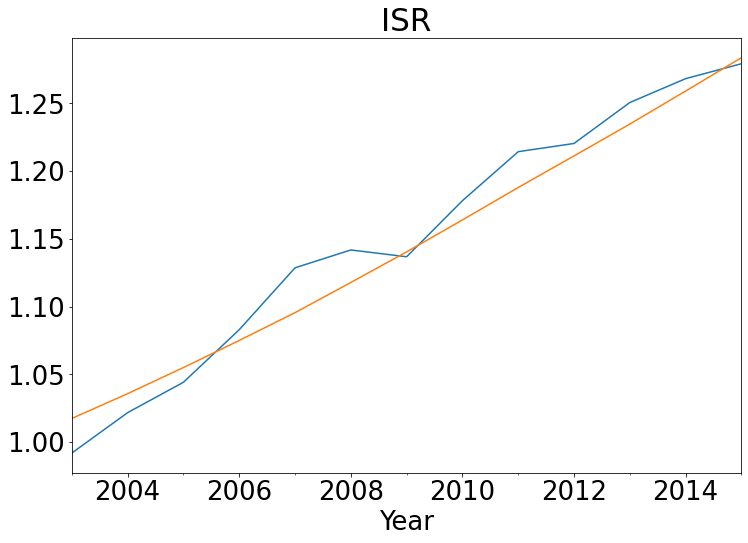

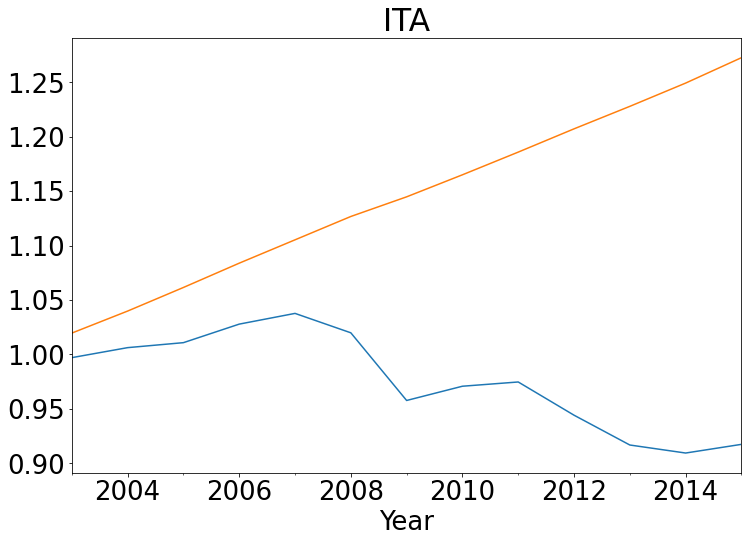

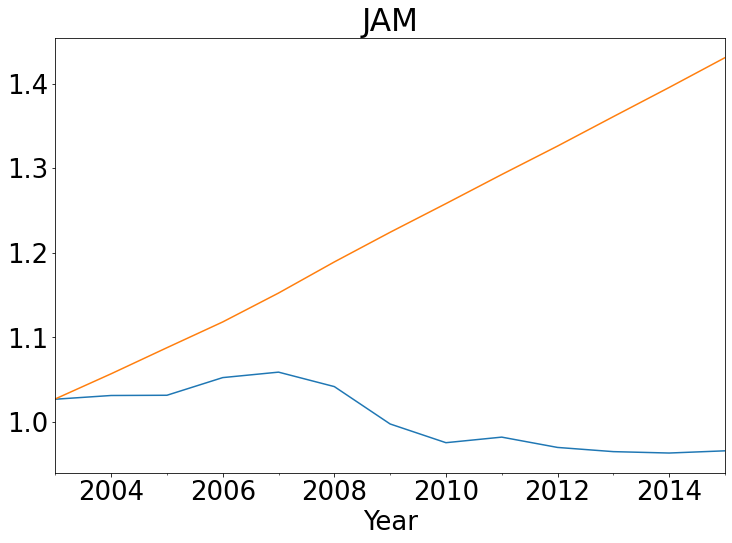

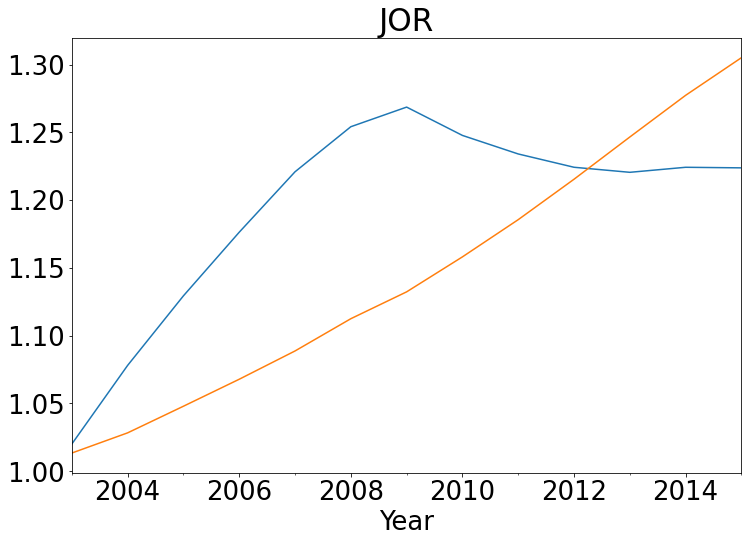

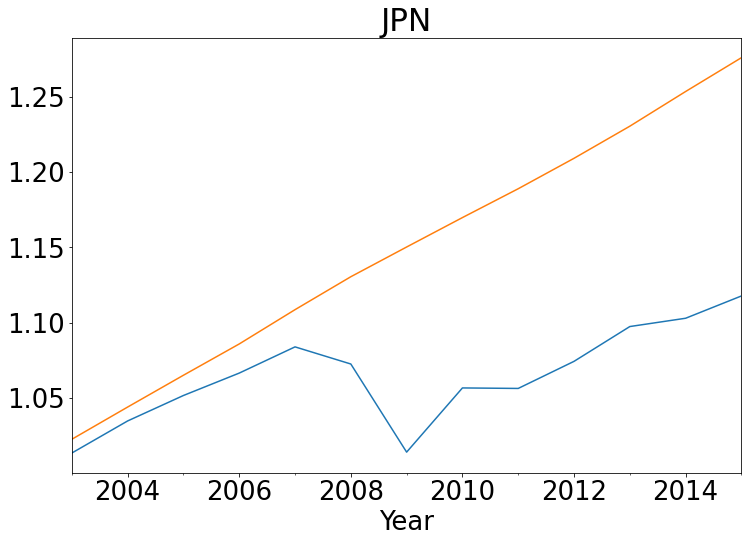

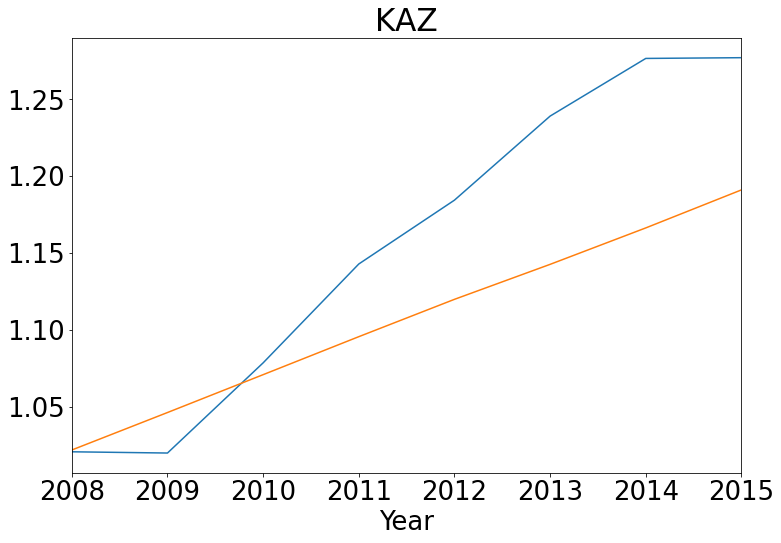

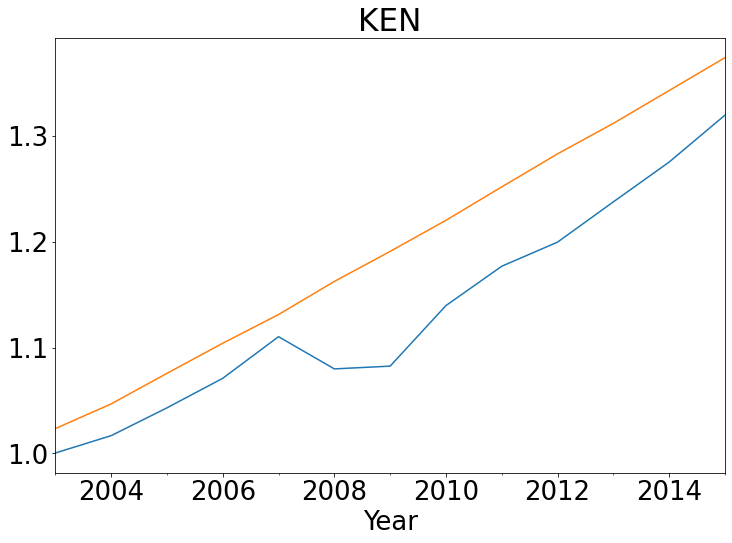

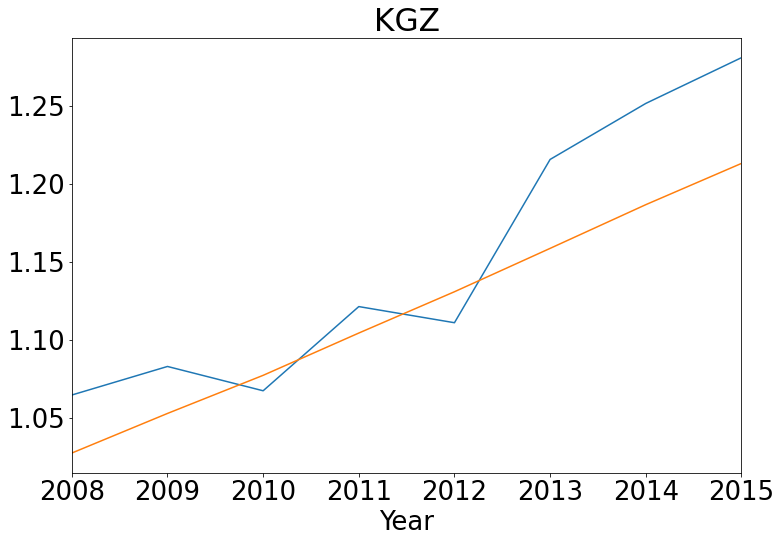

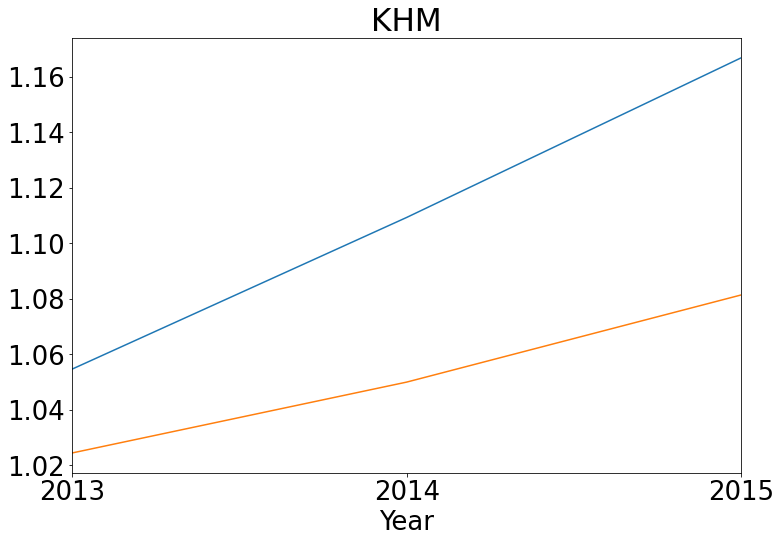

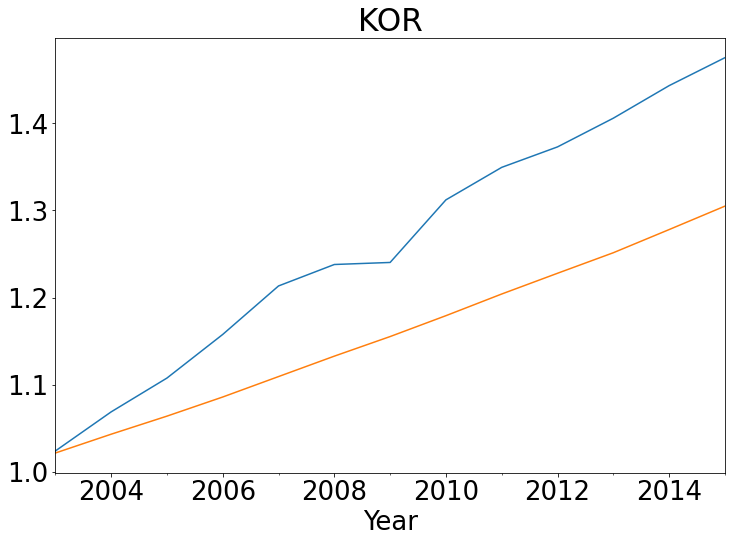

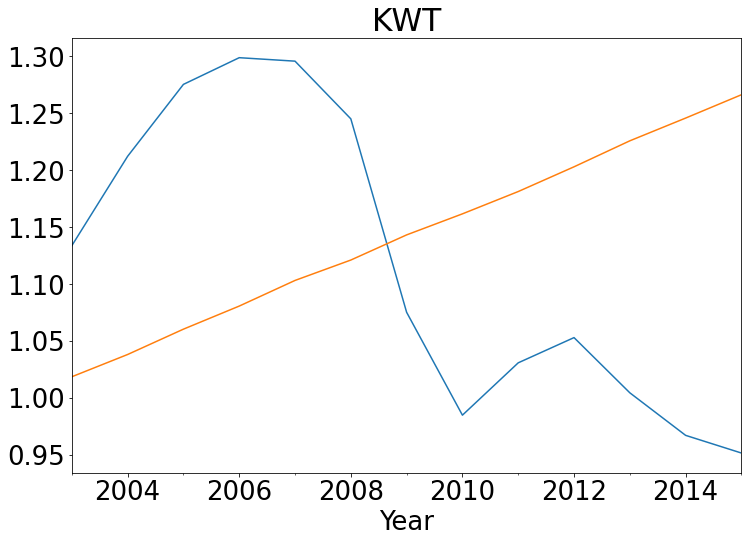

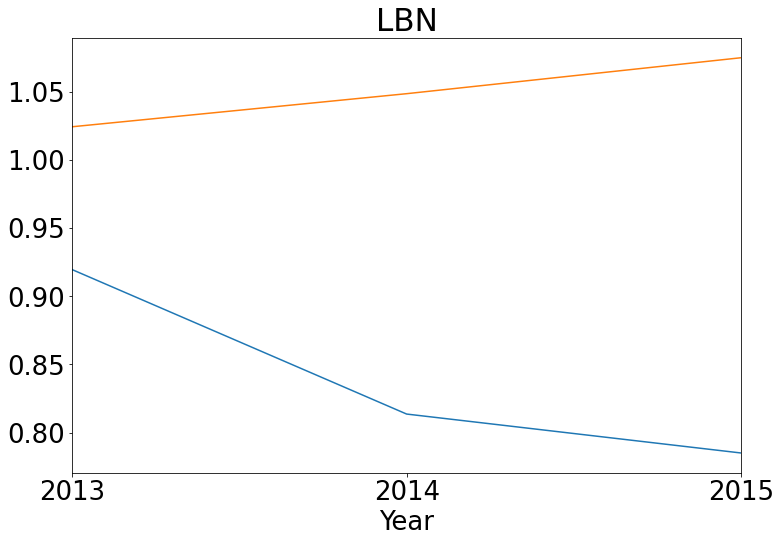

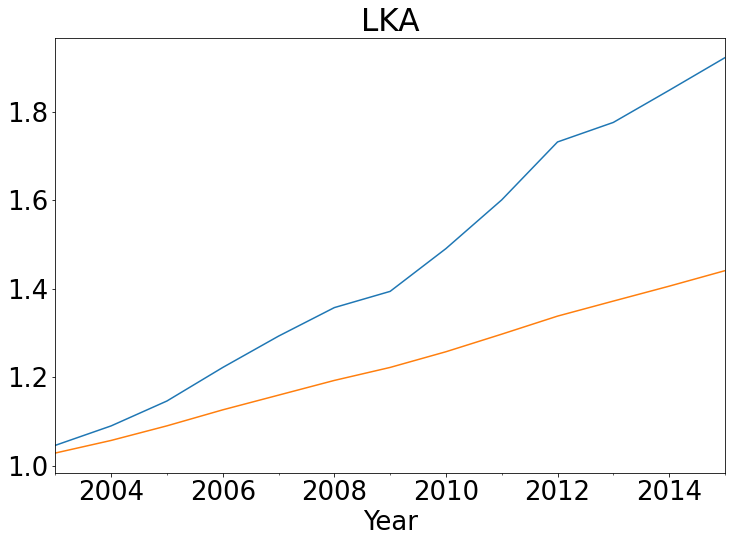

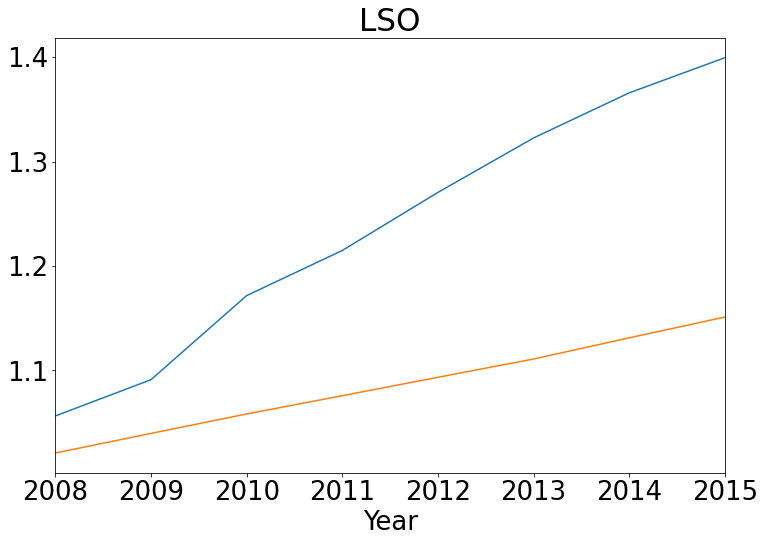

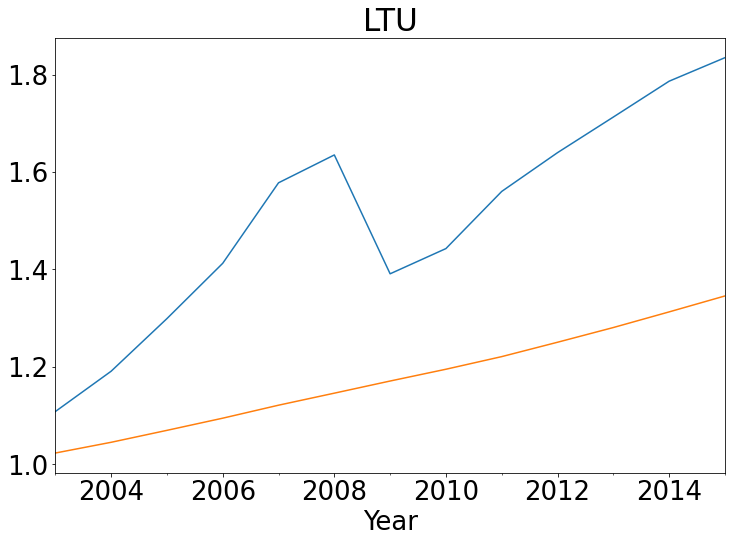

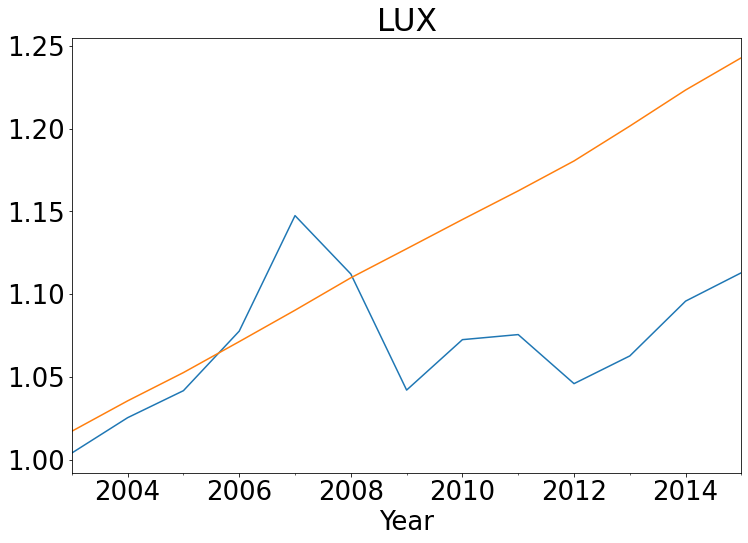

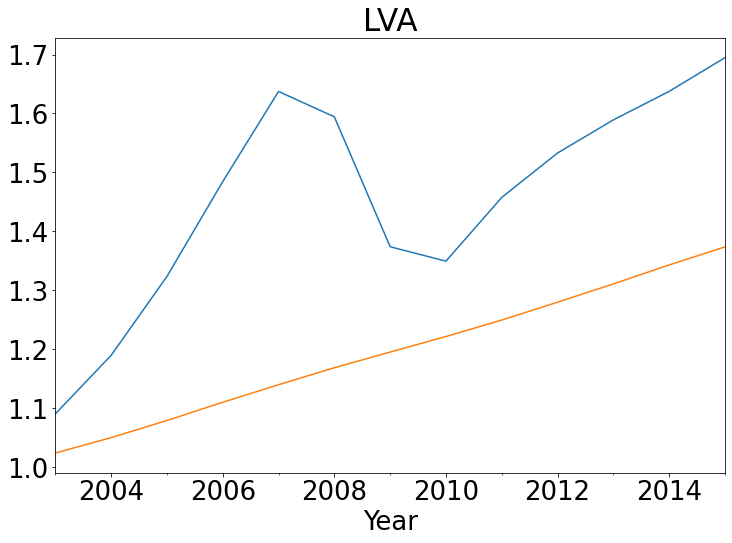

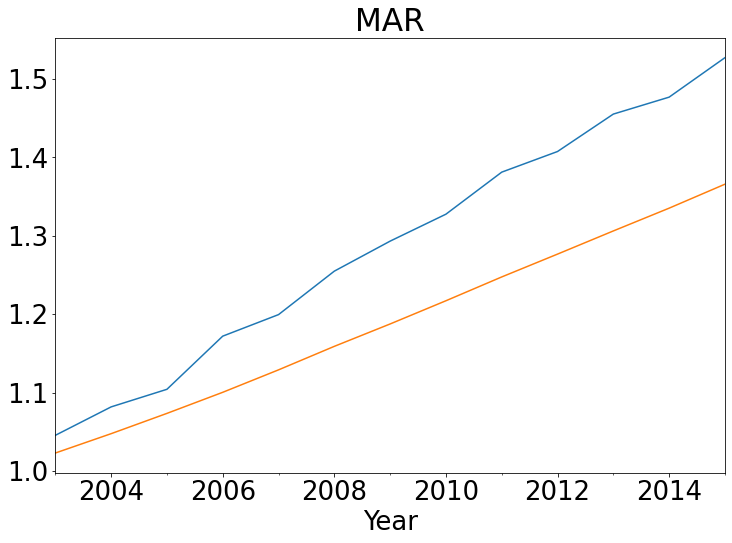

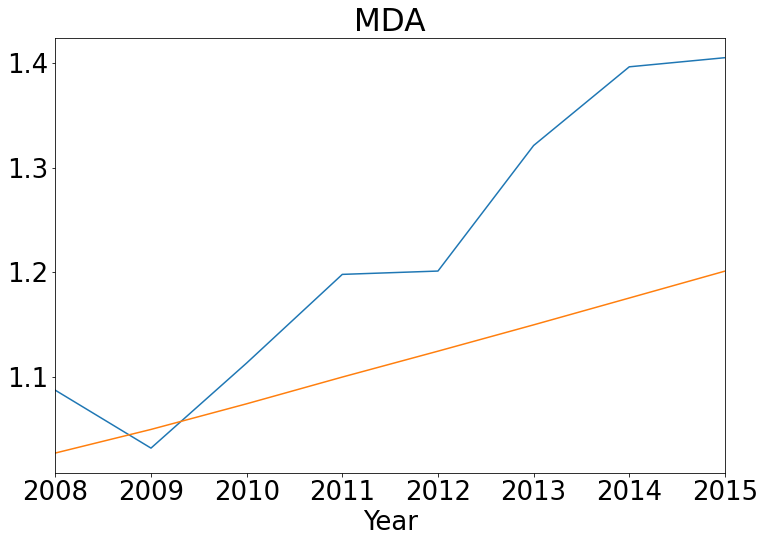

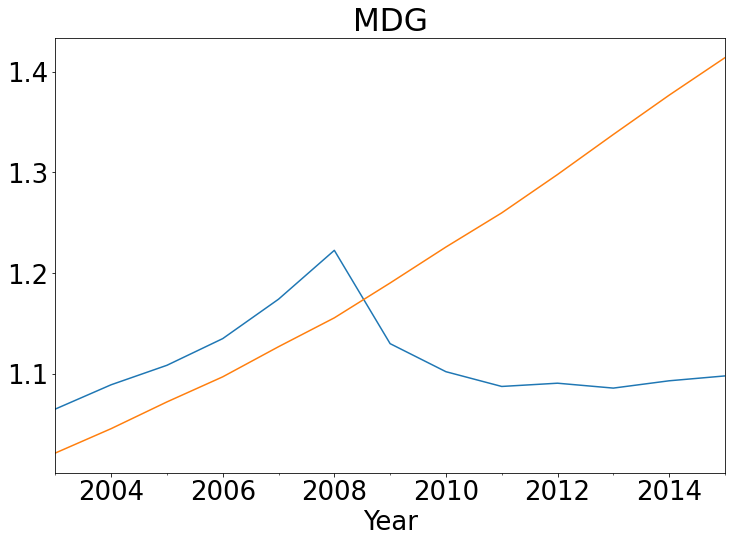

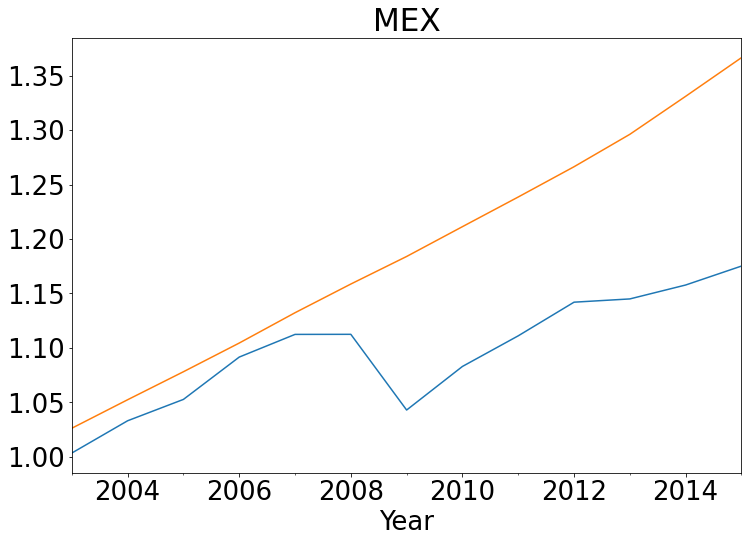

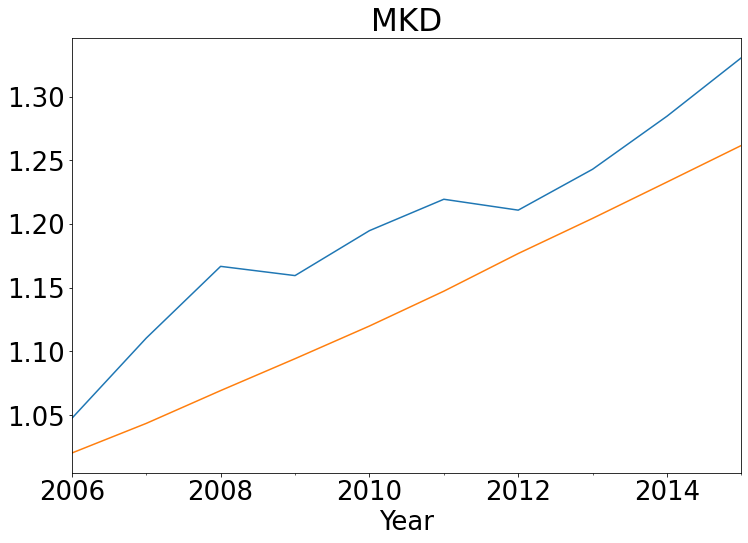

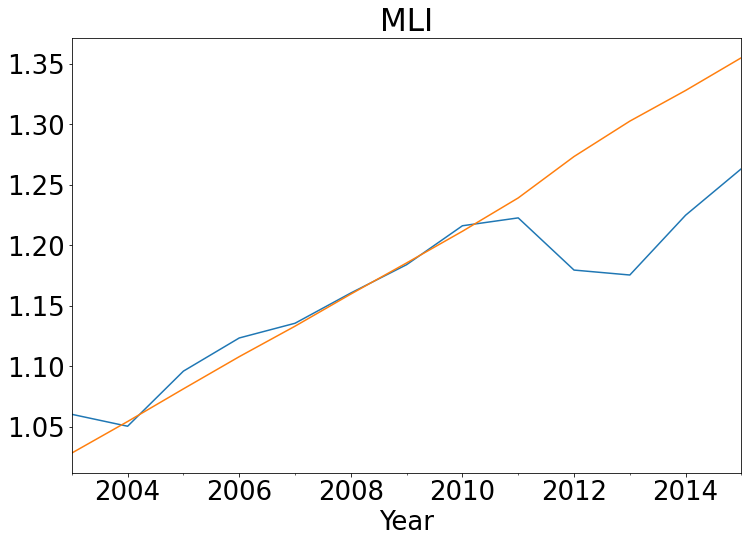

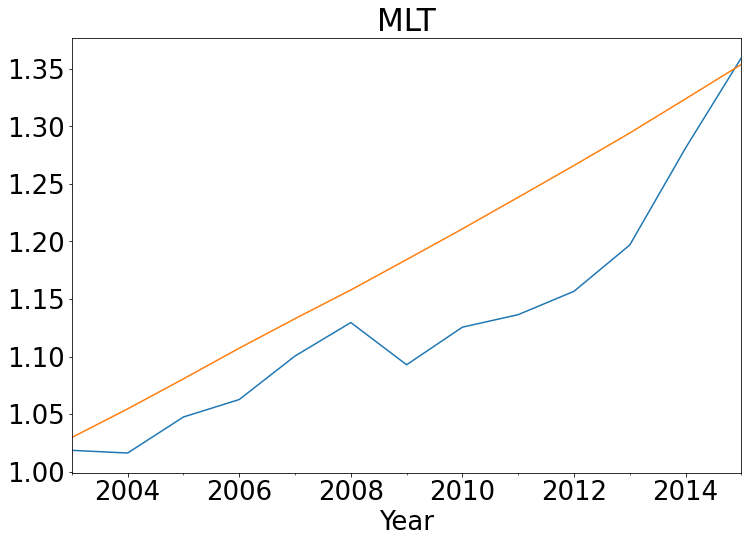

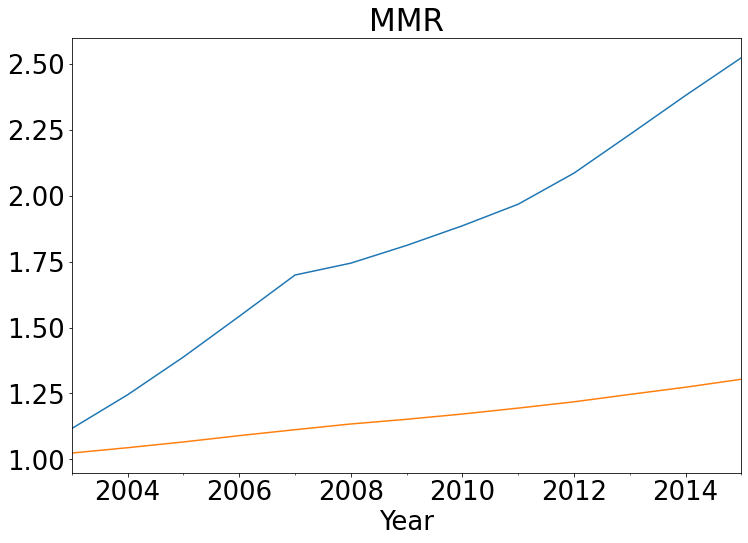

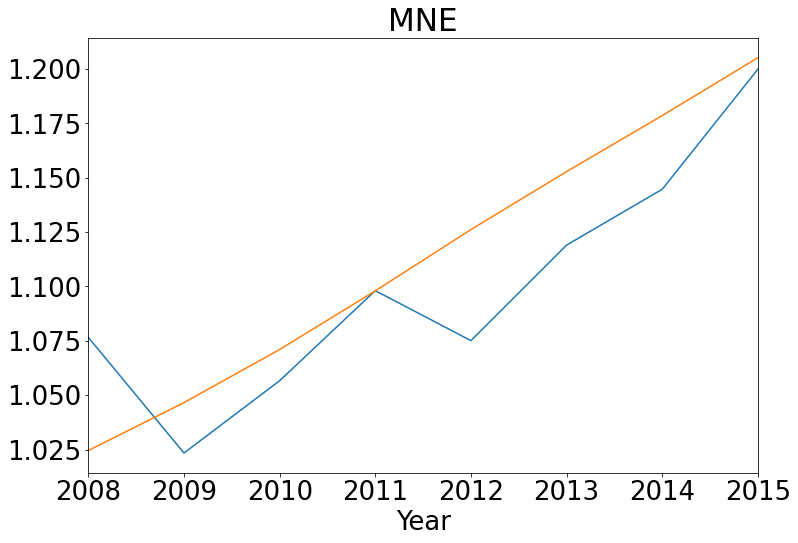

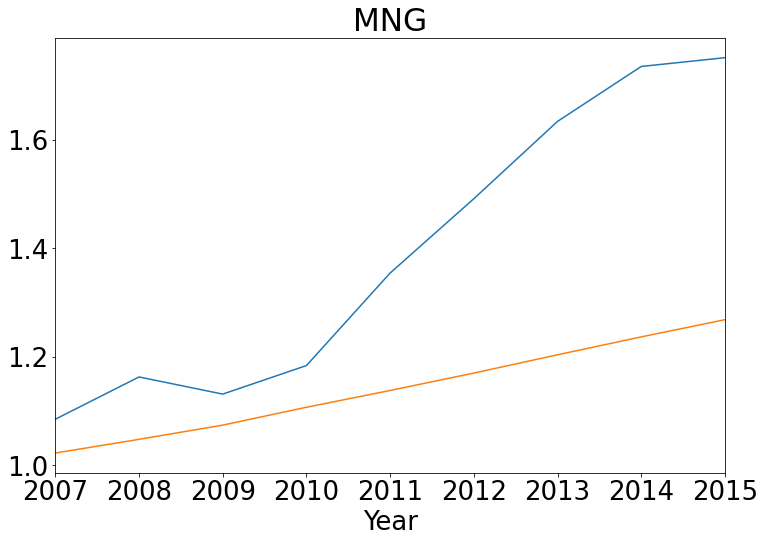

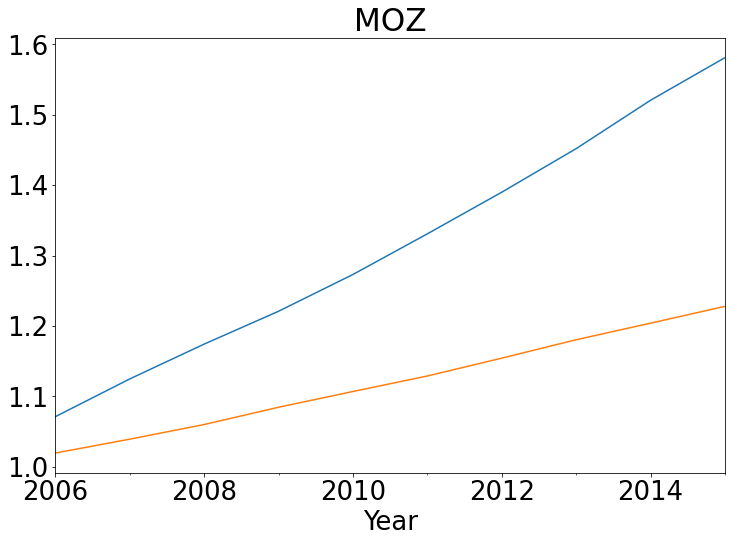

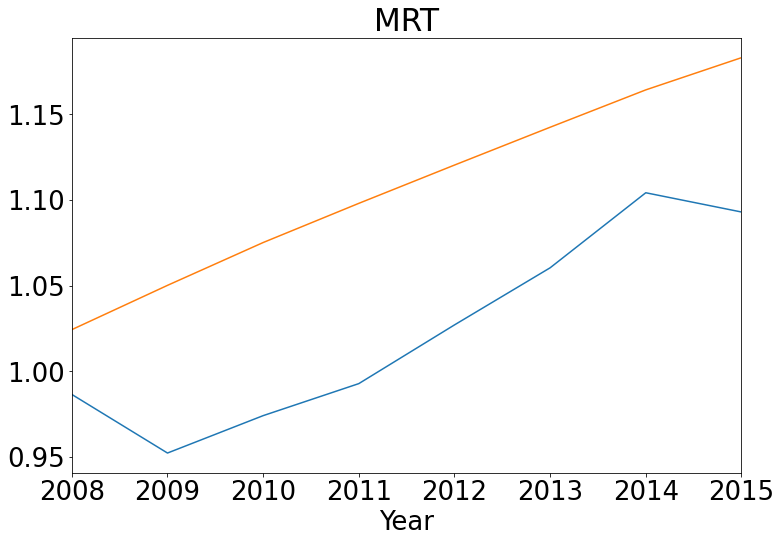

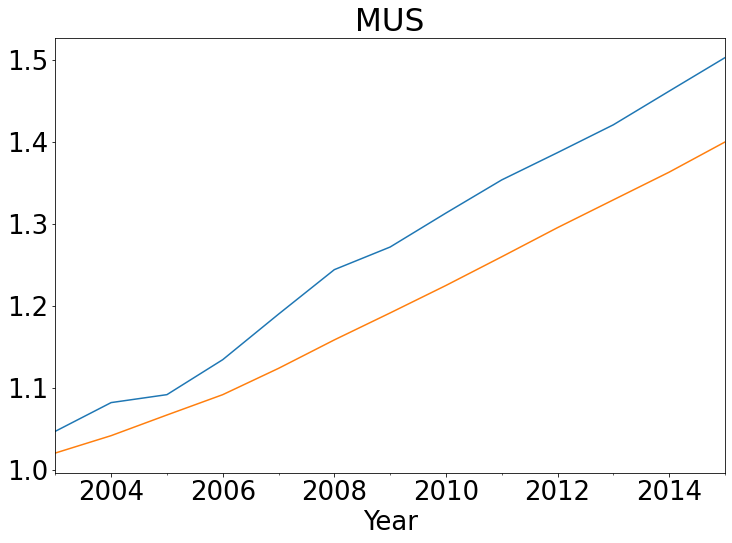

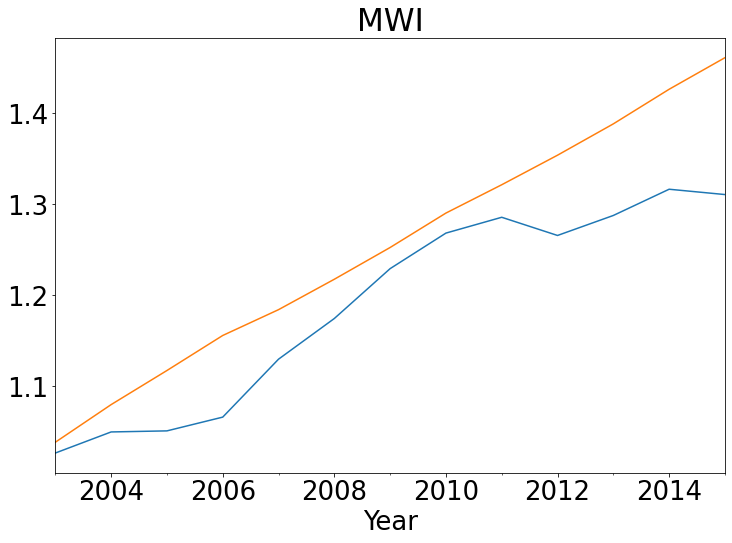

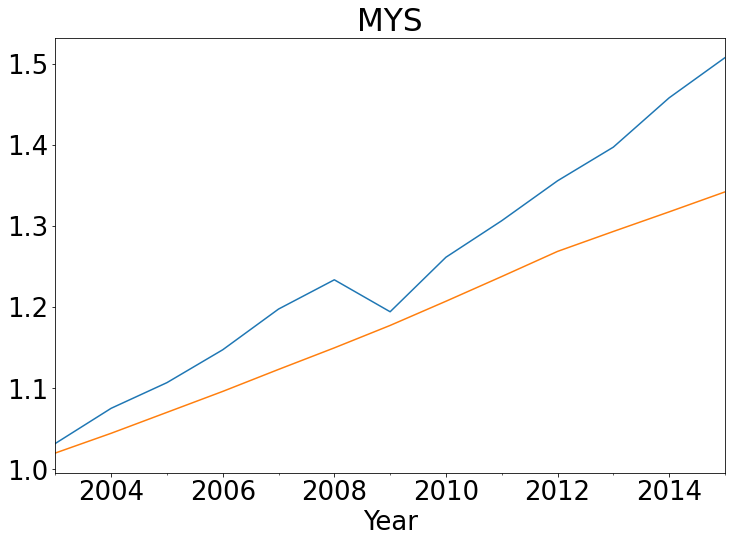

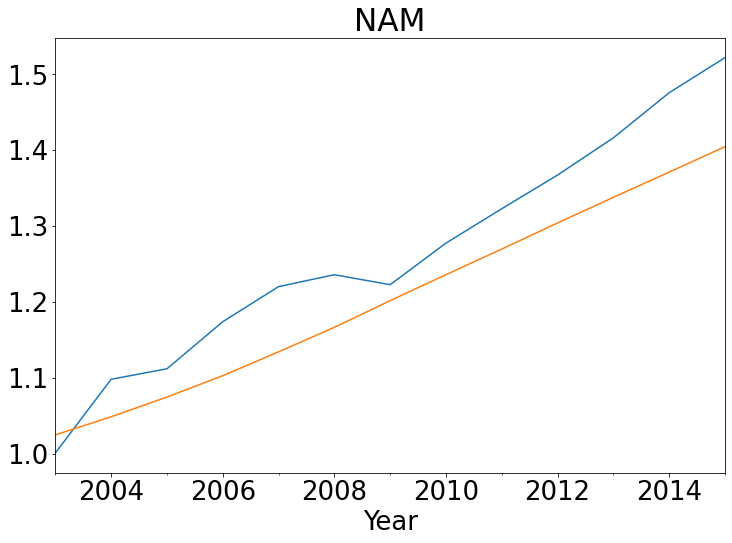

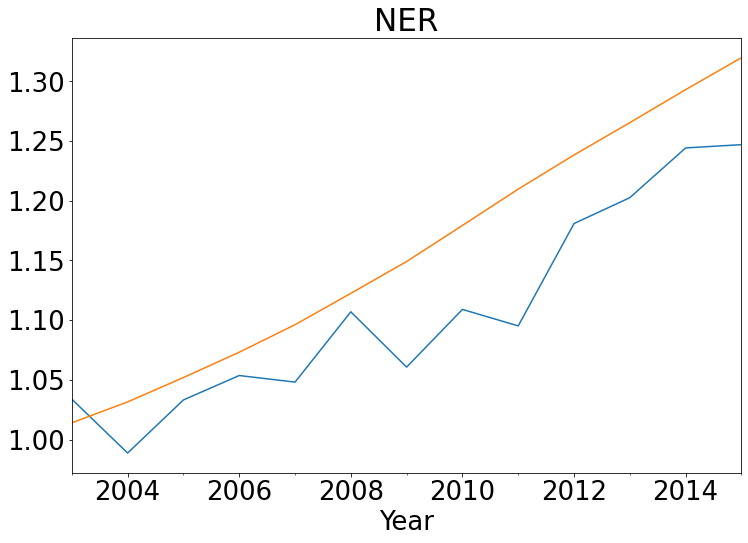

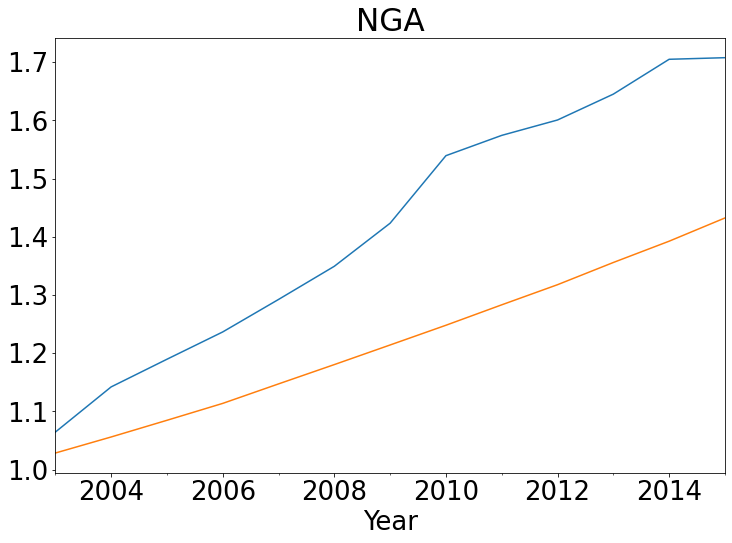

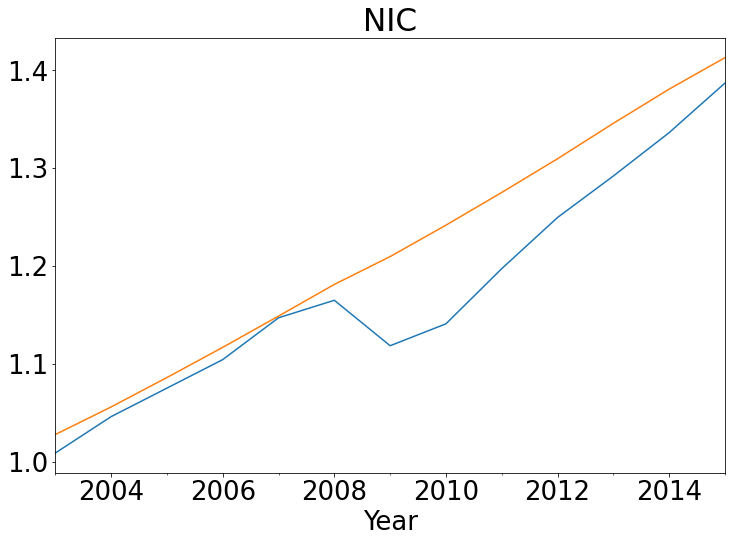

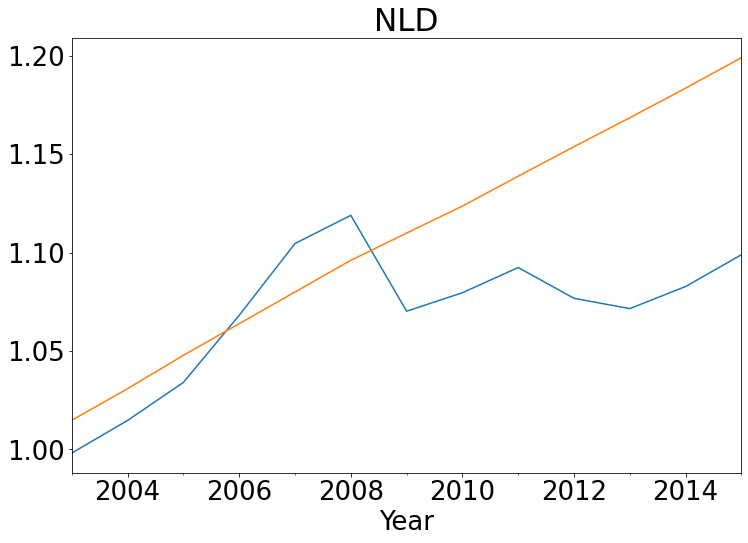

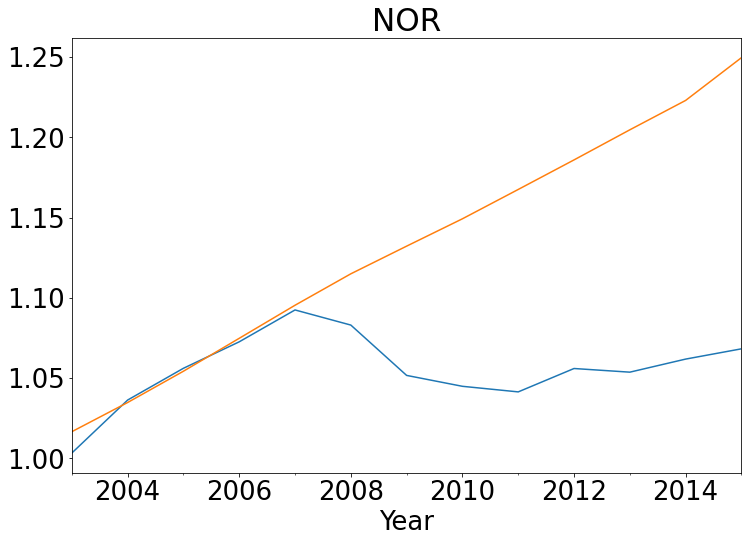

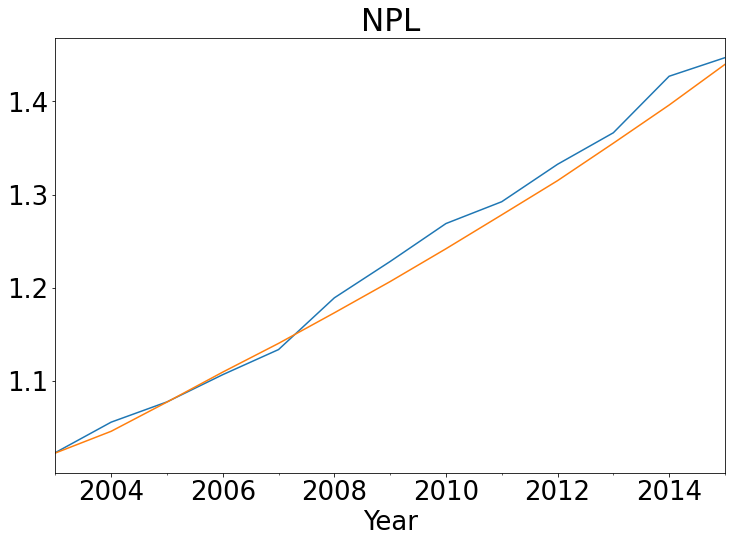

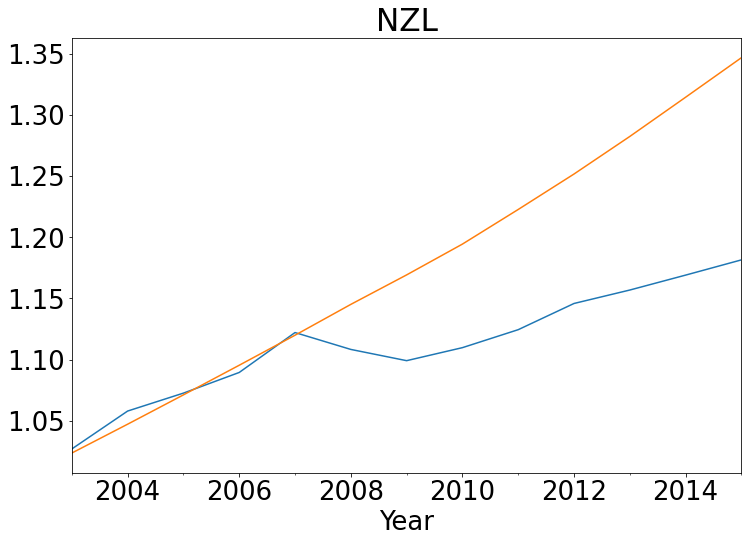

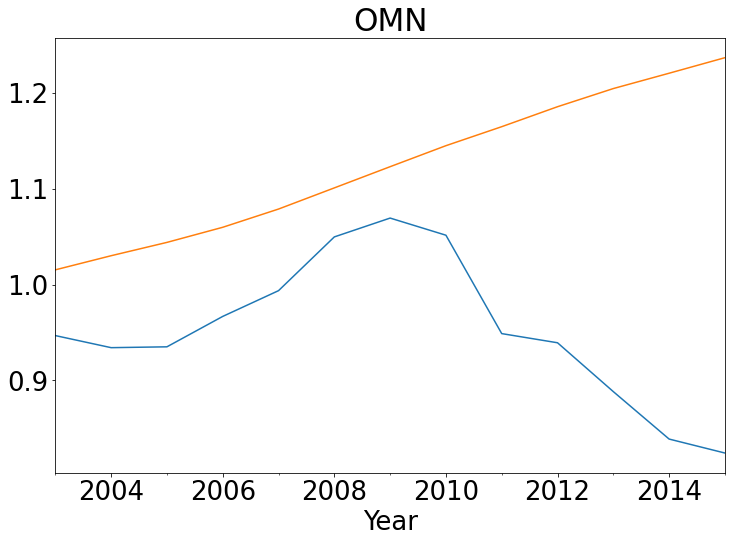

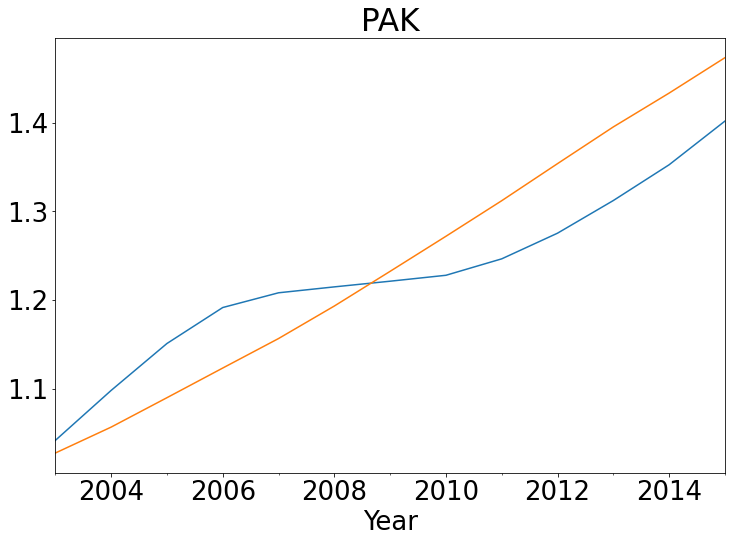

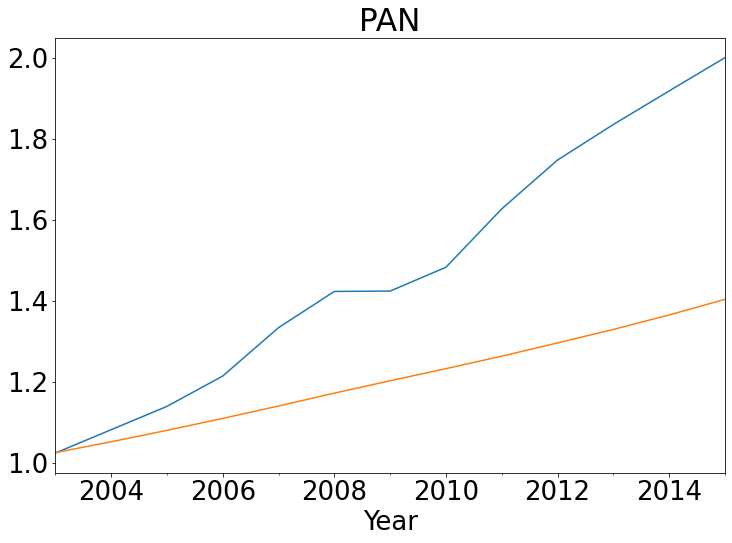

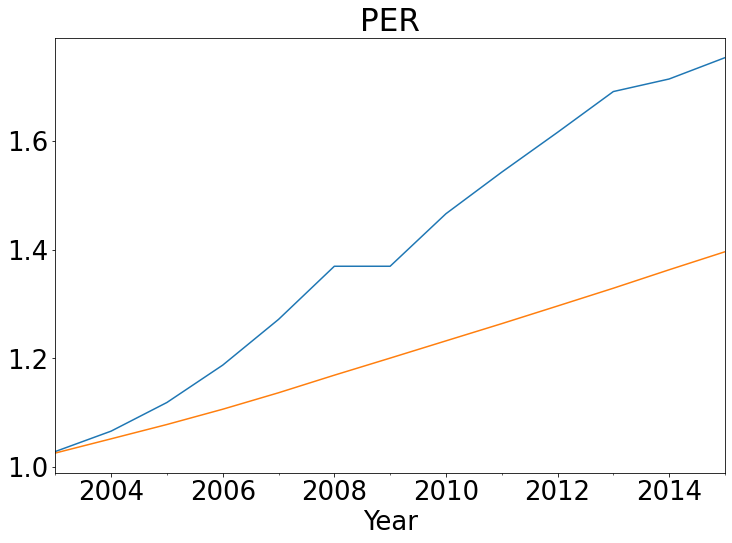

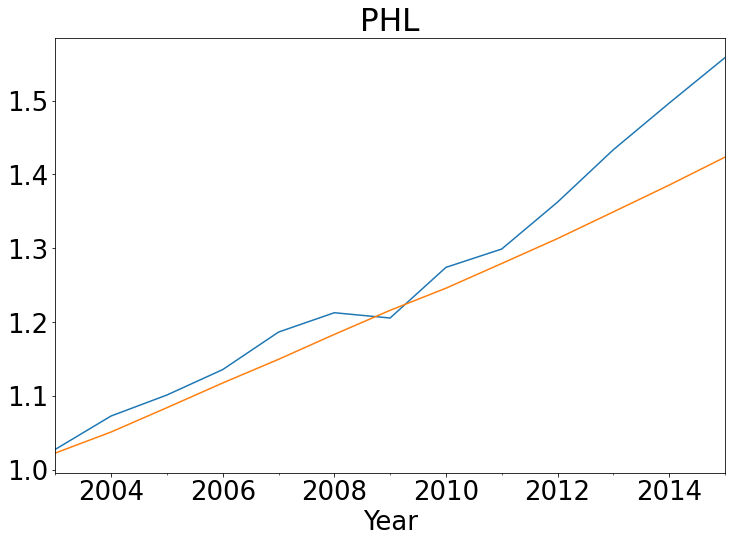

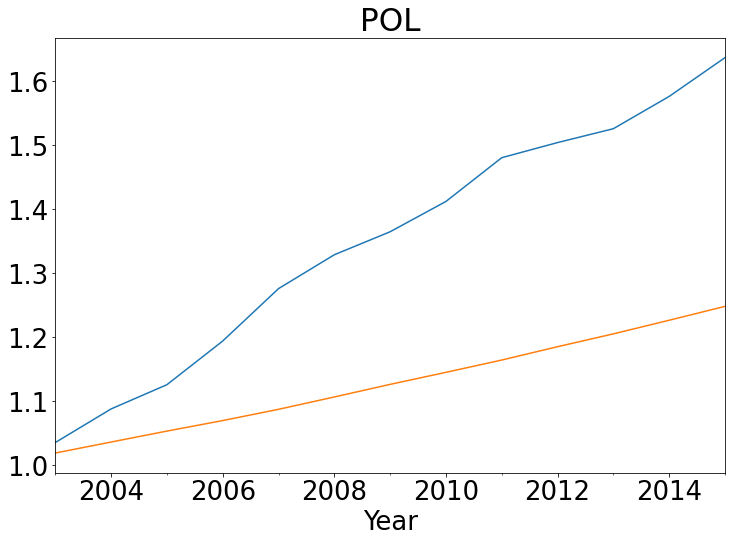

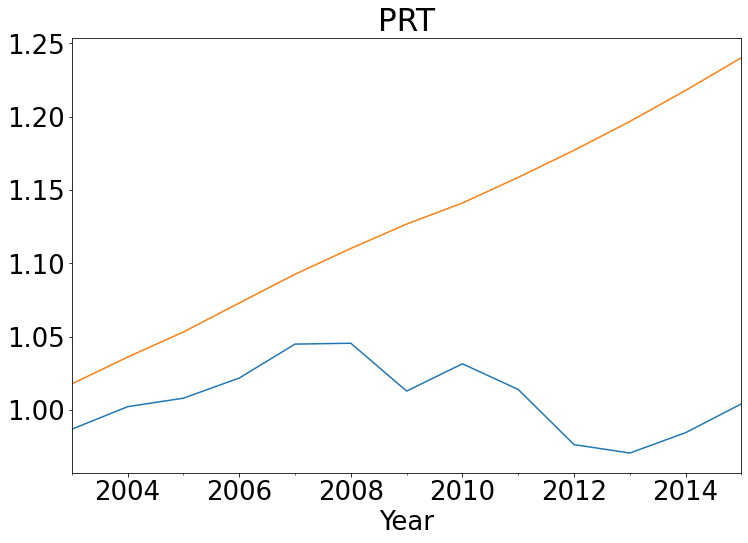

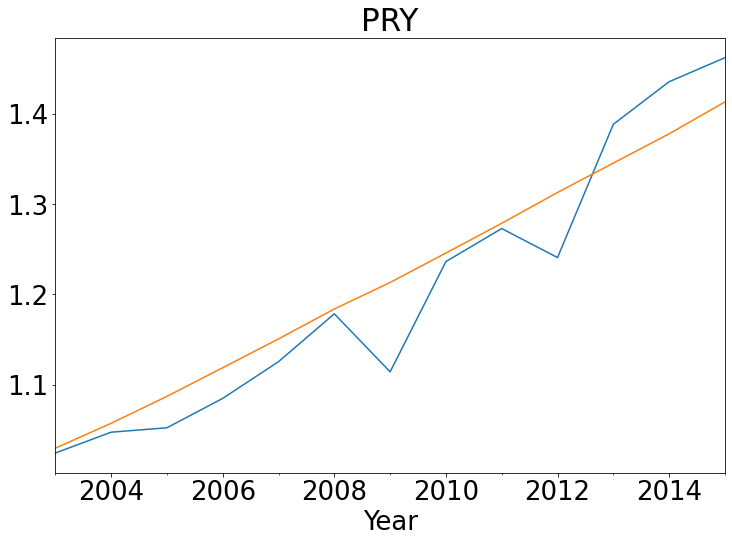

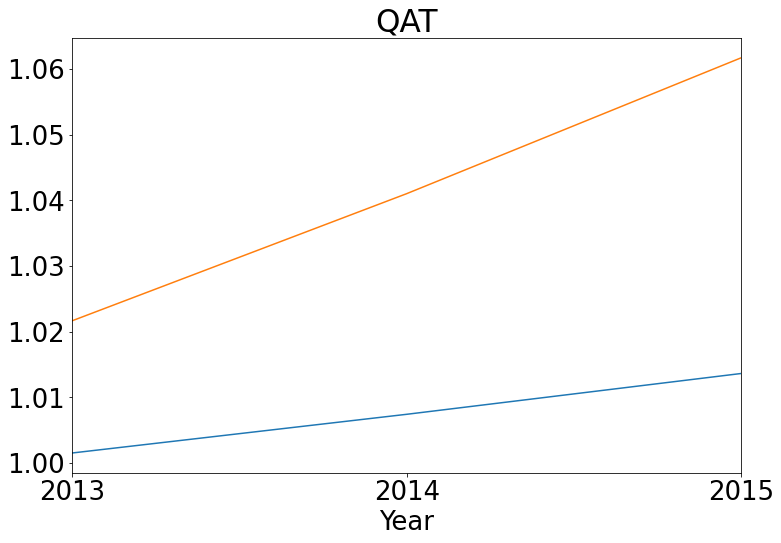

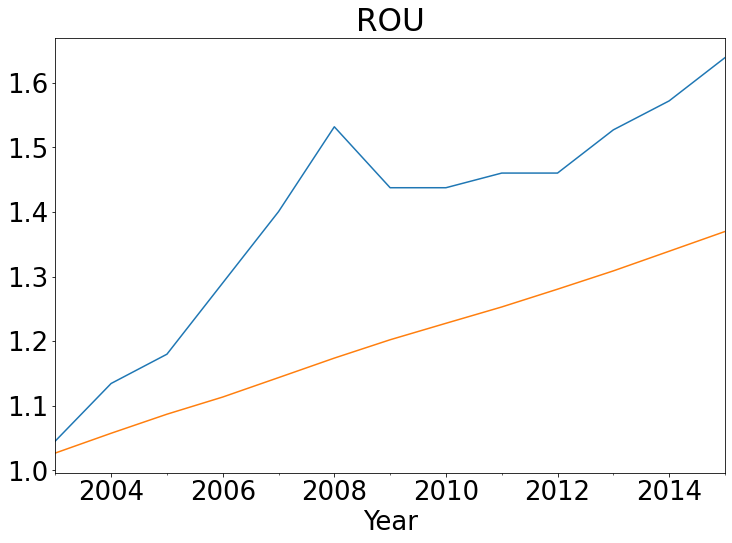

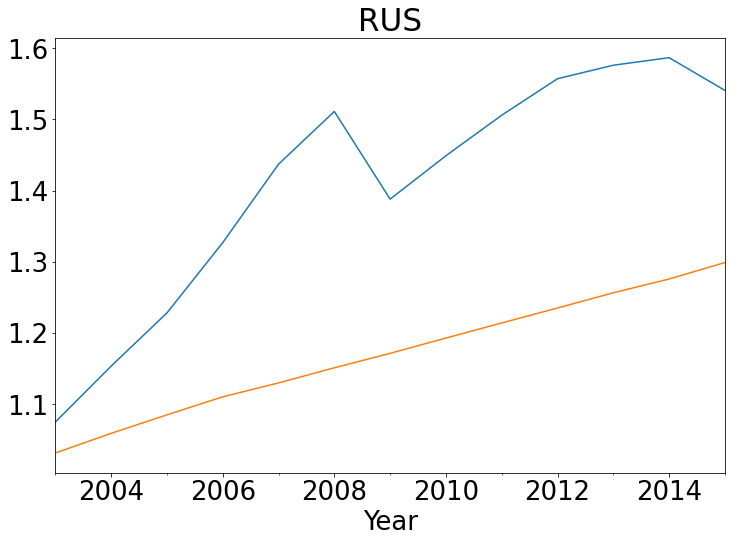

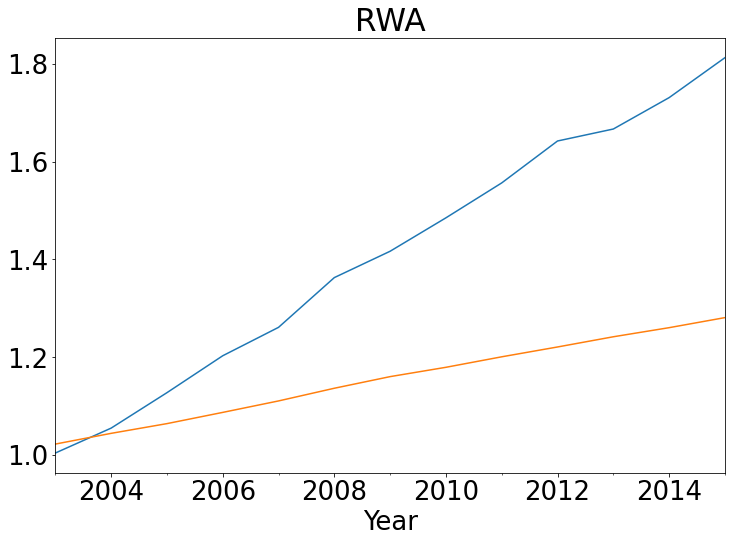

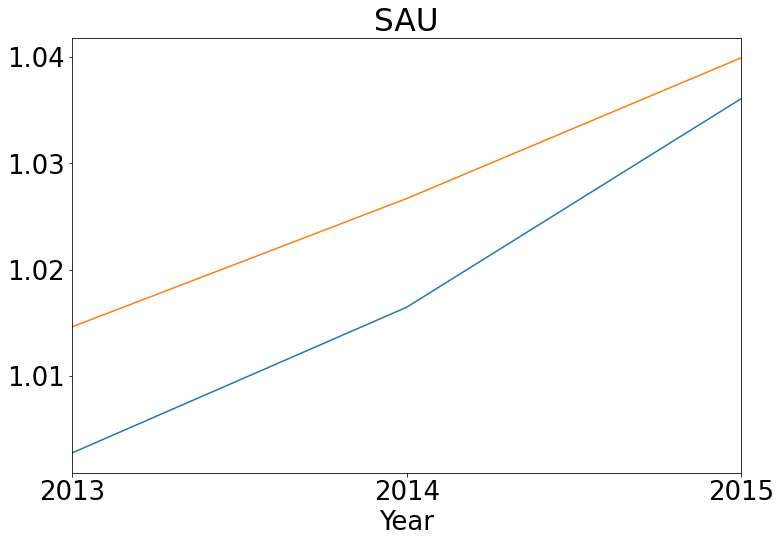

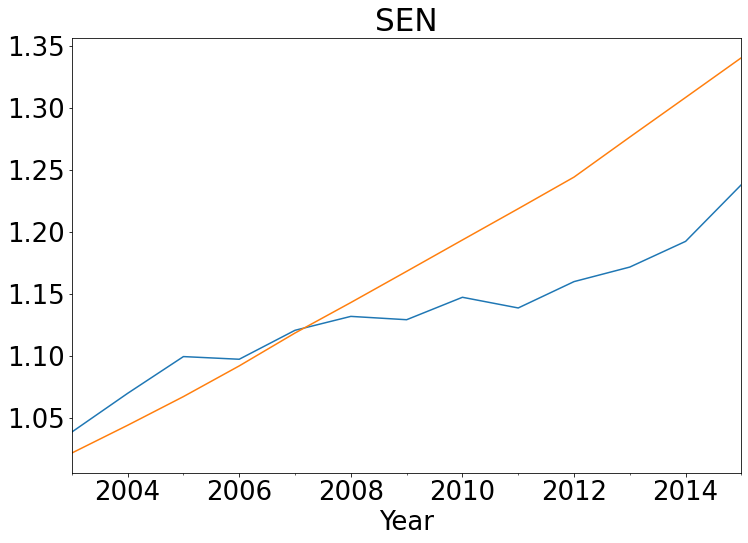

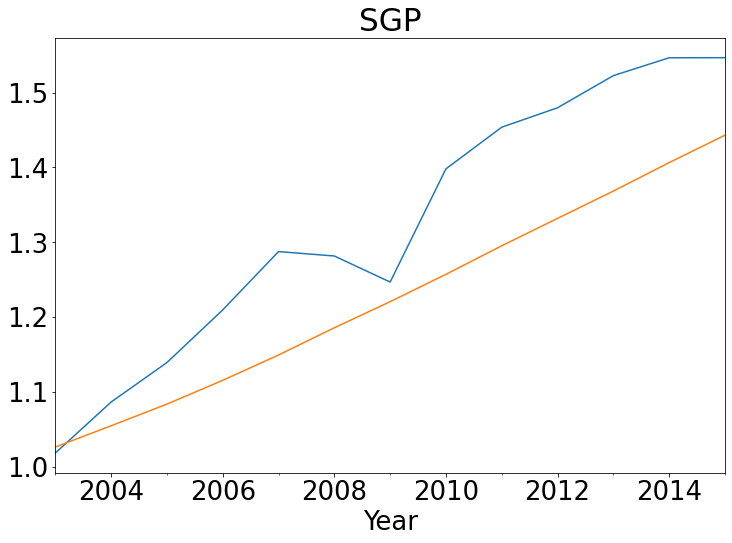

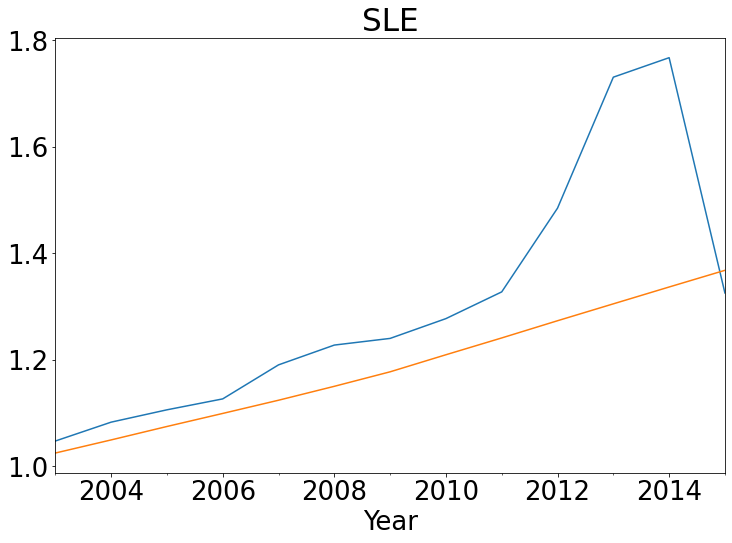

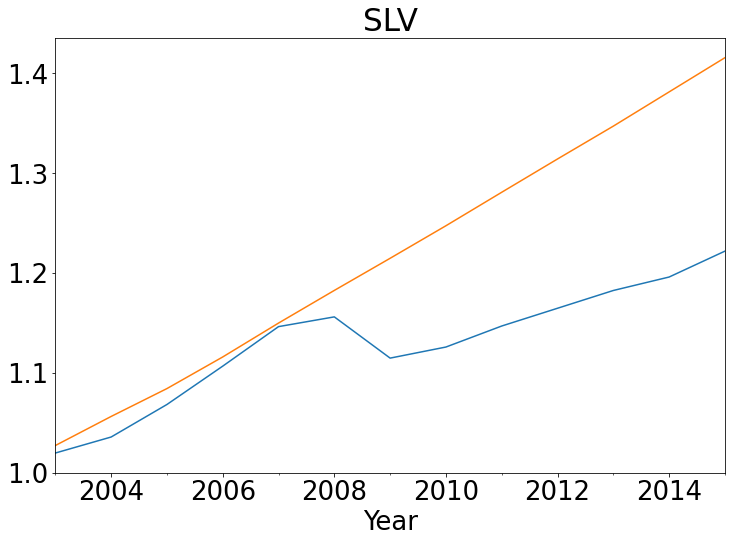

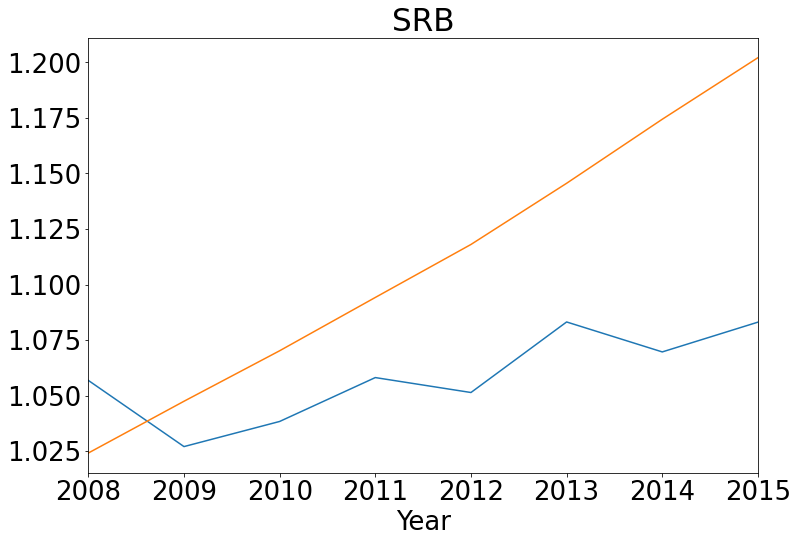

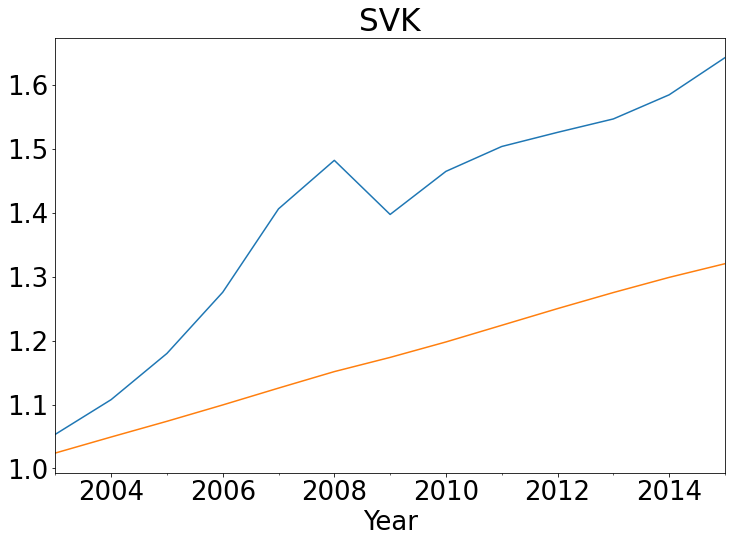

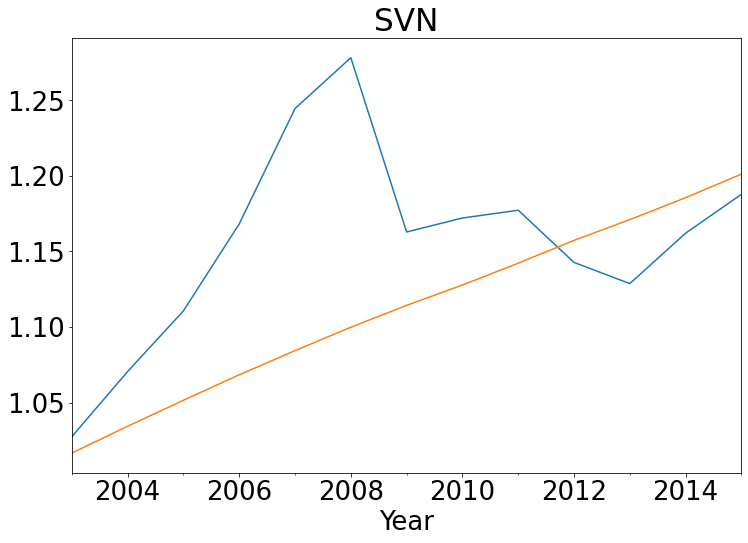

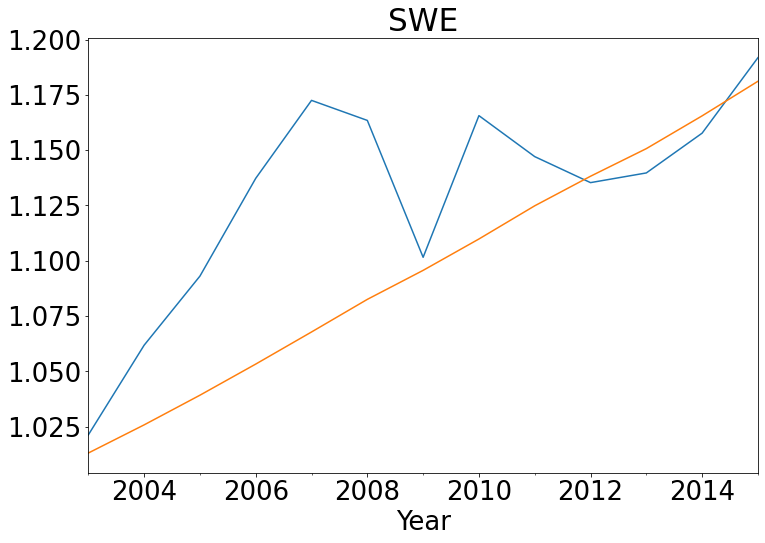

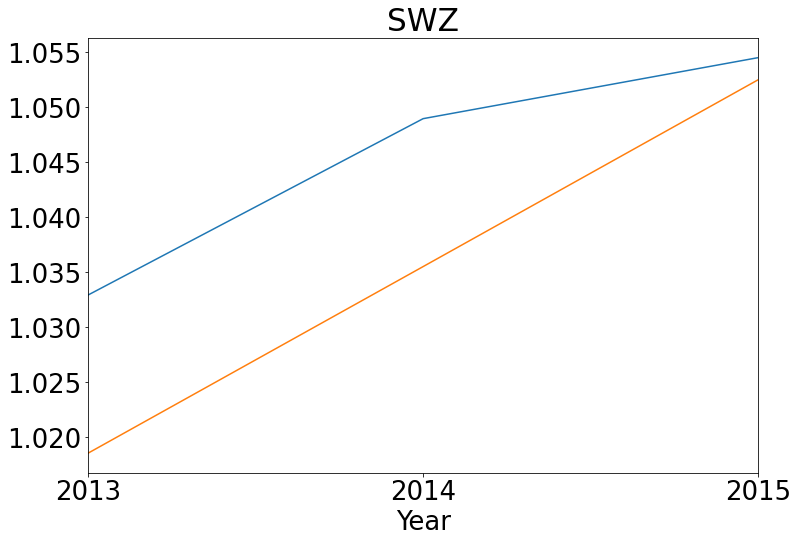

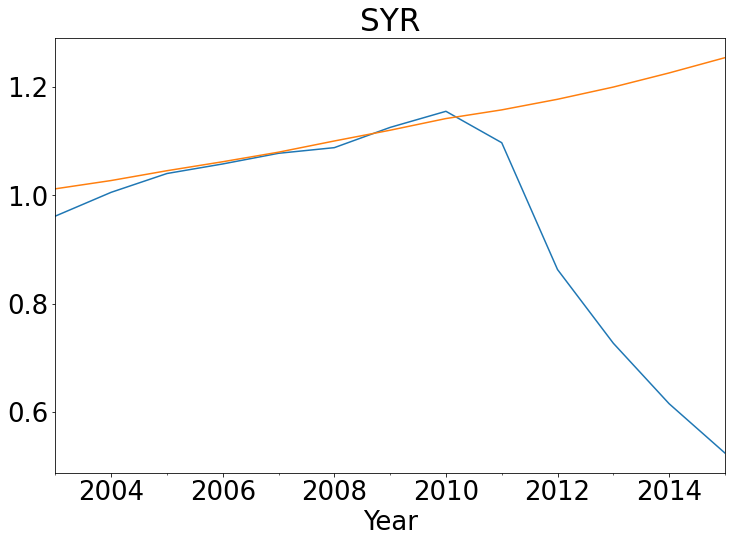

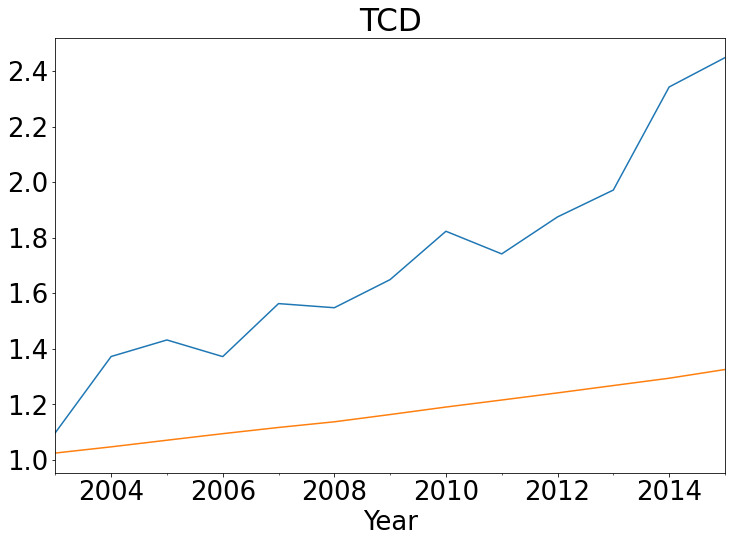

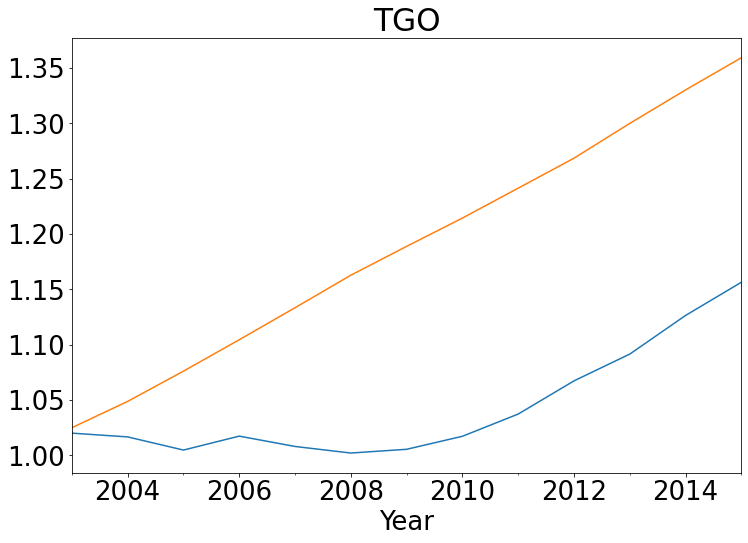

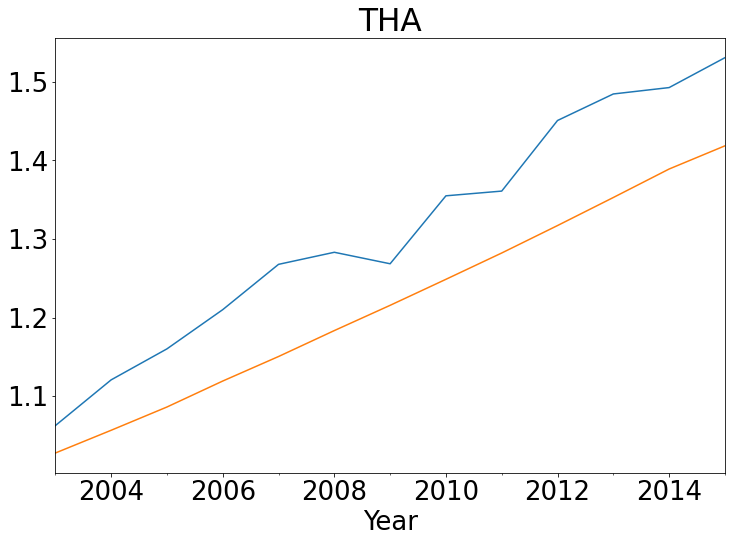

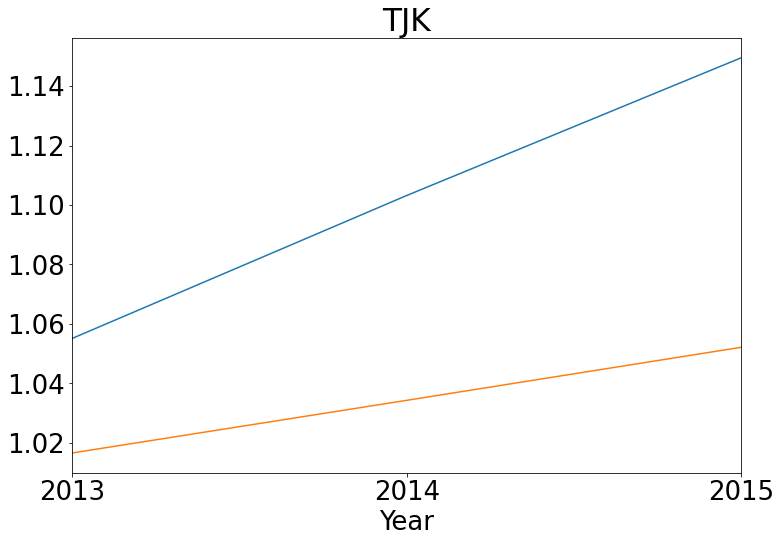

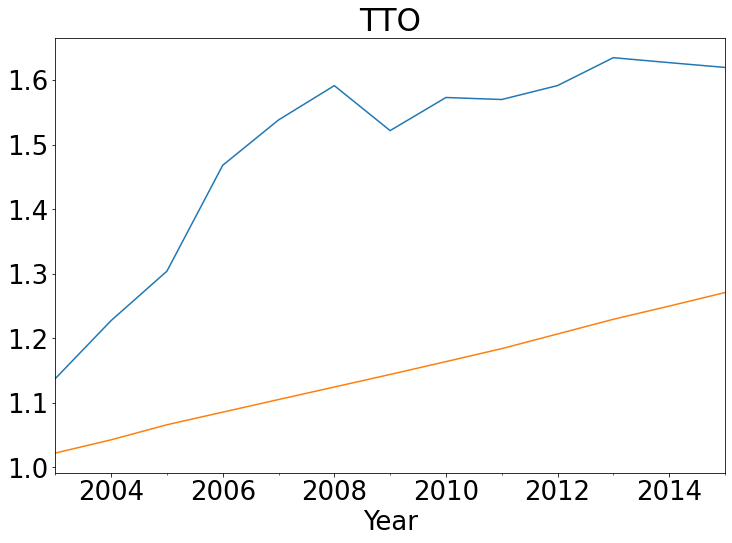

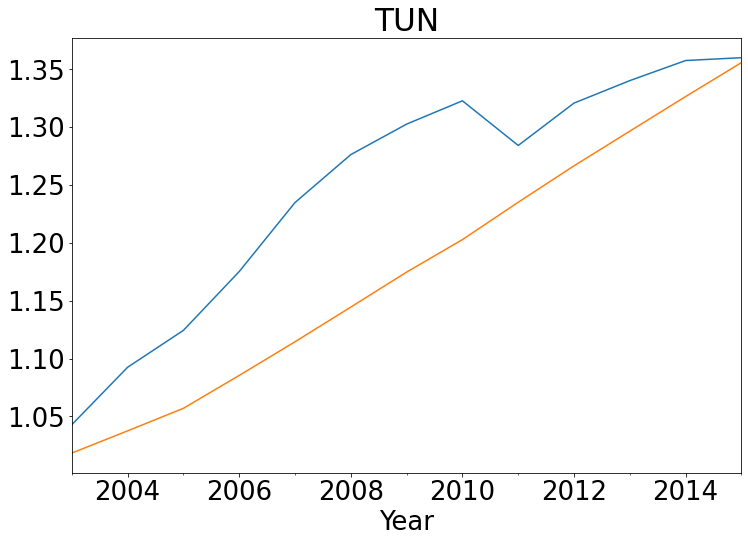

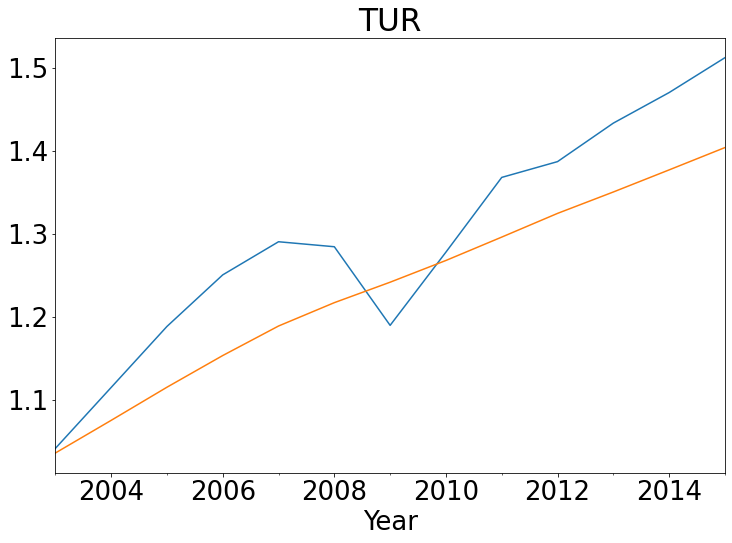

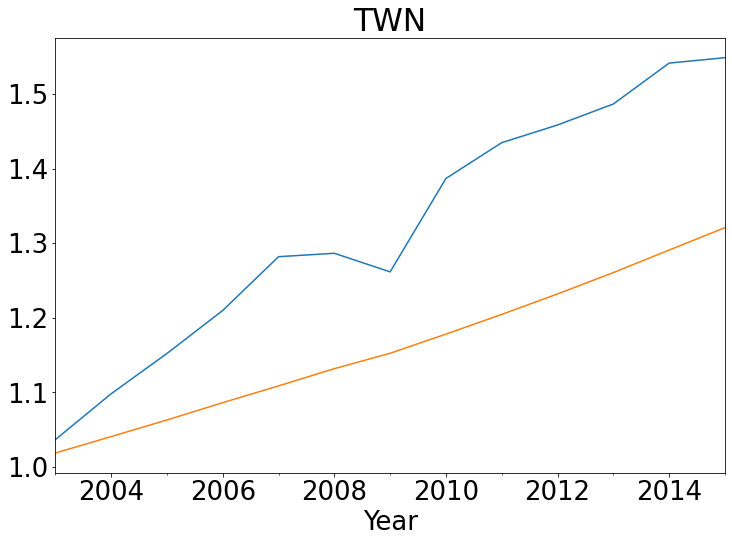

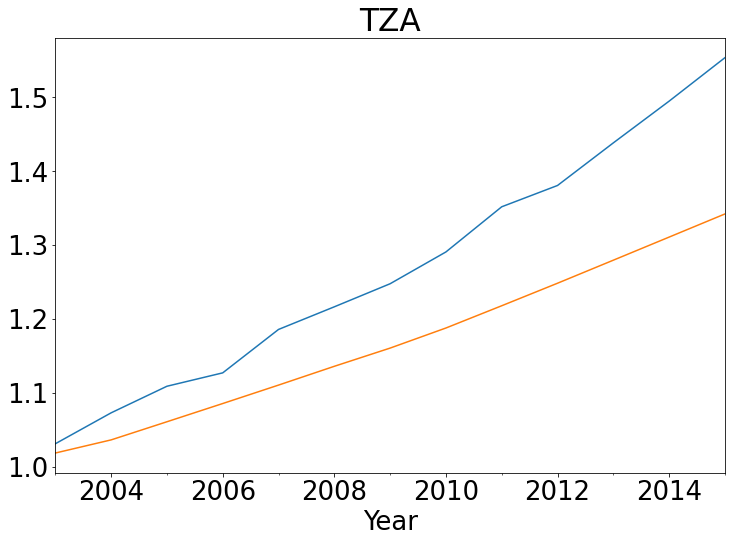

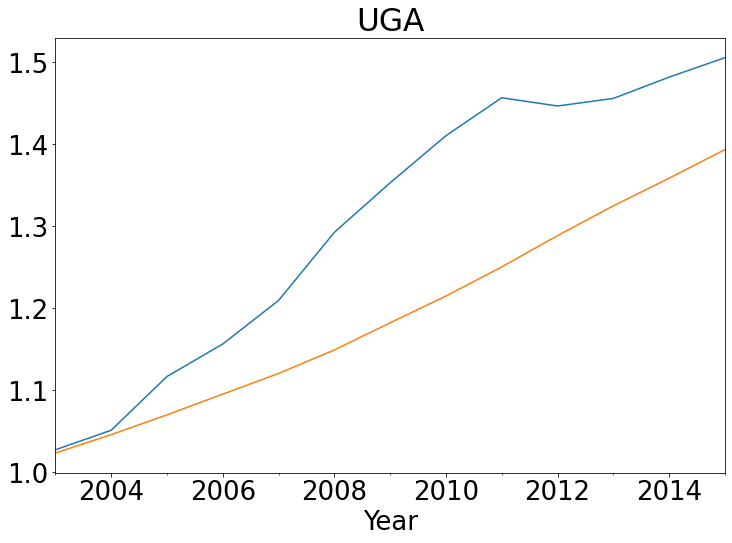

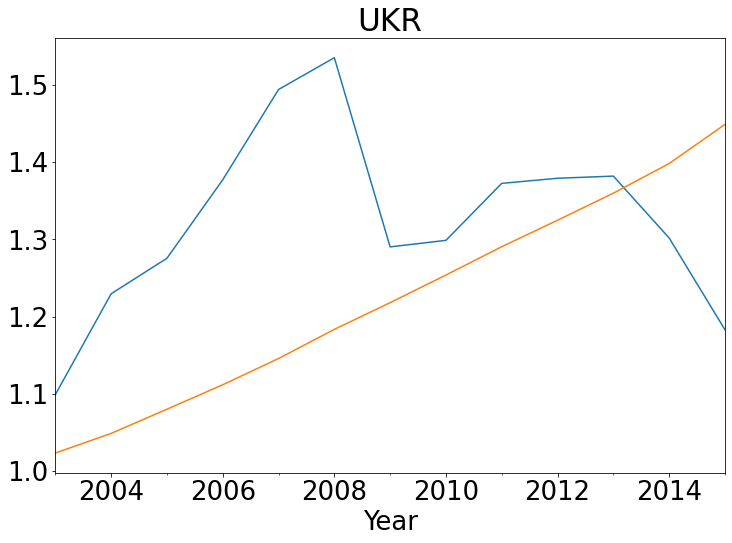

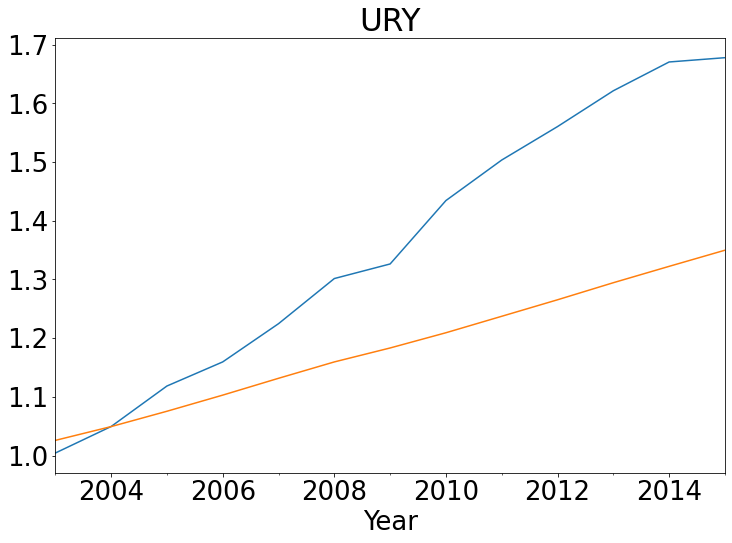

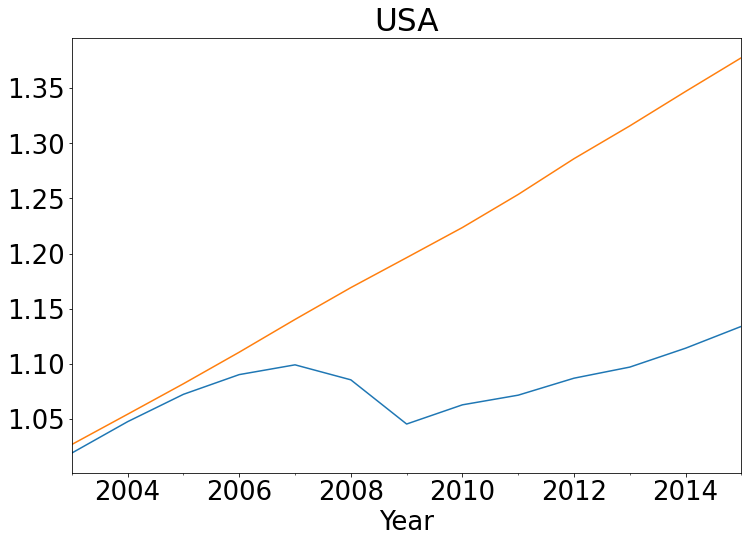

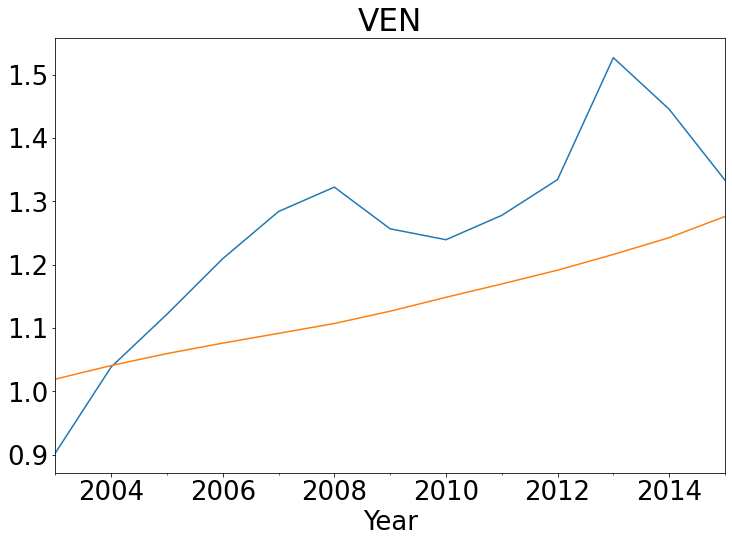

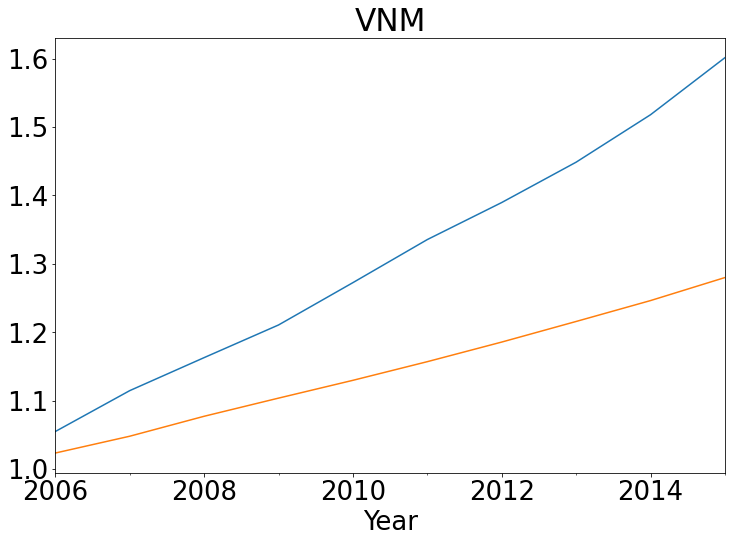

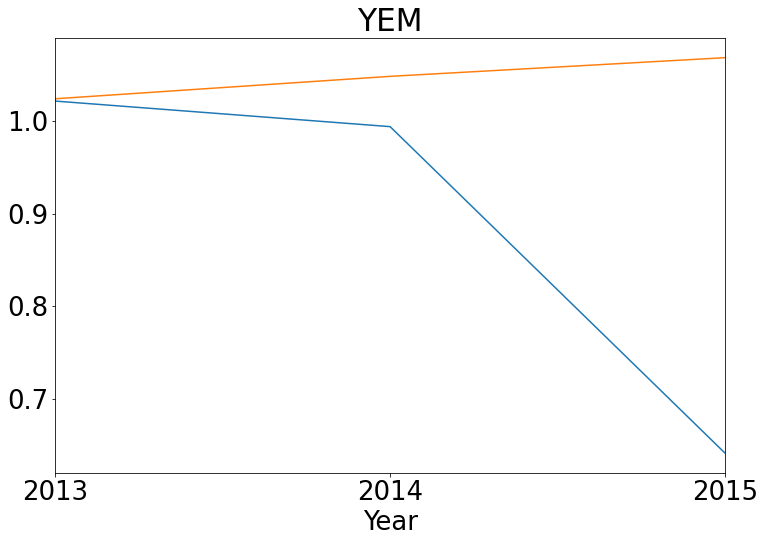

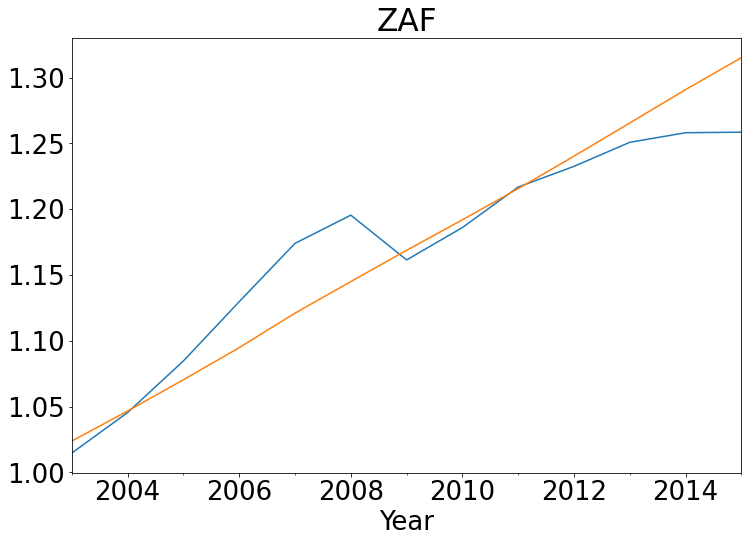

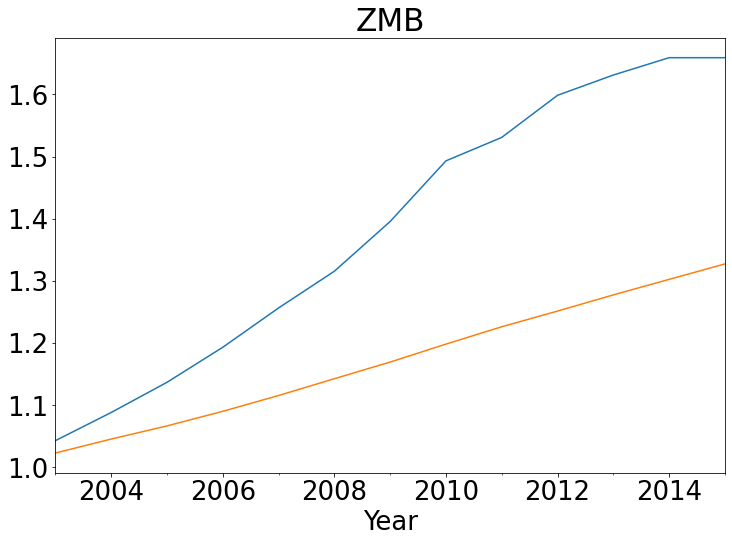

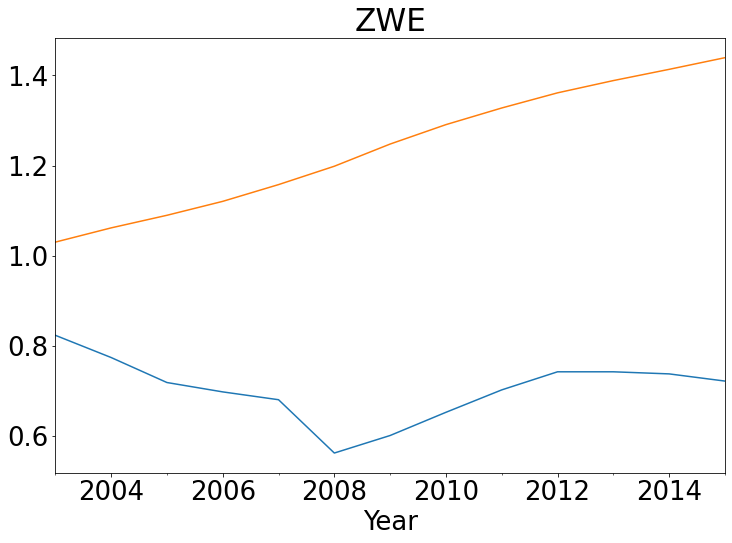

In [34]:
for country in countries:
    fig, ax = plt.subplots(figsize = (12,8))

    plot_data[y_var + ["Predictor"]].loc[country].cumprod().plot.line(ax = ax, legend = False)
    
    ax.set_title(country)
    plt.plot()


In [35]:
reg_data = data
reg_data["RGDP Per Capita"] = np.log(data).groupby("ISO_Code")["RGDP Per Capita"].diff() 
reg_data = reg_data.replace([np.inf, -np.inf], np.nan).groupby("ISO_Code").diff()
reg_data["RGDP Per Capita Lag"] = reg_data.groupby("ISO_Code")["RGDP Per Capita"].shift() 
reg_data.dropna(axis = 0, how = "any", inplace = True)
reg_data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
C:\Users\JLCat\AppData\Local\Temp\ipykernel_9412\670322419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["RGDP Per Capita"] = np.log(data).groupby("ISO_Code")["RGDP Per Capita"].diff()


EFW  Size of Government  \
ISO_Code Year                                       
AGO      2013-01-01 -0.293548           -0.982212   
         2014-01-01 -0.074133            0.407297   
         2015-01-01  0.601252            2.072211   
ALB      2005-01-01  0.126900            0.633500   
         2006-01-01  0.163020            0.008772   
...                       ...                 ...   
ZMB      2011-01-01 -0.004871           -0.228304   
         2012-01-01 -0.119892           -0.665434   
         2013-01-01 -0.093235           -0.182616   
         2014-01-01  0.055134           -0.168235   
ZWE      2012-01-01  0.127751            0.245839   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      2013-01-01                       -0.312611     0.169323   
         2014-01-01                        0.003385     0.061975   
         2015-01-01                       -0.033387     0.095728   
ALB      2005-01-01                        0.168007    -0.022613   
         2006-01-01                        0.103885    -0.067502   
...                                             ...          ...   
ZMB      2011-01-01                        0.203621     0.083953   
         2012-01-01                       -0.115301     0.021502   
         2013-01-01                       -0.278911    -0.201301   
         2014-01-01                        0.171505     0.213901   
ZWE      2012-01-01                        0.069279     1.269544   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      2013-01-01                         -0.192193   -0.150048   
         2014-01-01                         -0.869546    0.026224   
         2015-01-01                          0.070214    0.801494   
ALB      2005-01-01                          0.056816   -0.201209   
         2006-01-01                          0.410464    0.359479   
...                                               ...         ...   
ZMB      2011-01-01                         -0.199177    0.115551   
         2012-01-01                          0.129065    0.030708   
         2013-01-01                          0.484519   -0.287866   
         2014-01-01                         -0.049105    0.107602   
ZWE      2012-01-01                         -0.234468   -0.711440   

                     RGDP Per Capita  RGDP Per Capita Lag  
ISO_Code Year                                              
AGO      2013-01-01        -0.239635             0.178243  
         2014-01-01        -1.257882            -0.239635  
         2015-01-01        -1.659156            -1.257882  
ALB      2005-01-01         0.006704            -0.174816  
         2006-01-01         0.061287             0.006704  
...                              ...                  ...  
ZMB      2011-01-01        -1.156188            -0.118270  
         2012-01-01         1.577136            -1.156188  
         2013-01-01        -1.334770             1.577136  
         2014-01-01         0.599569            -1.334770  
ZWE      2012-01-01        -0.171263            -0.329339  

[730 rows x 8 columns]

In [36]:
y_var = ["RGDP Per Capita"]
x_vars = ["Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
         "Regulation"]

y = reg_data[y_var]
X = reg_data[x_vars]
# X["Constant"] = 1
results = sm.OLS(y, X).fit()
reg_data["Predictor"] = results.predict()

In [37]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        RGDP Per Capita   R-squared (uncentered):                   0.014
Model:                            OLS   Adj. R-squared (uncentered):              0.007
Method:                 Least Squares   F-statistic:                              1.985
Date:                Wed, 28 Dec 2022   Prob (F-statistic):                      0.0787
Time:                        09:06:18   Log-Likelihood:                         -1307.7
No. Observations:                 730   AIC:                                      2625.
Df Residuals:                     725   BIC:                                      2648.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government                  -0.0559      0.169     -0.330      0.742      -0.389       0.277
Legal System & Property Rights      -0.4496      0.202     -2.231      0.026      -0.845      -0.054
Sound Money                          0.0362      0.149      0.242      0.809      -0.257       0.329
Freedom to trade internationally     0.3907      0.192      2.036      0.042       0.014       0.767
Regulation                           0.0877      0.214      0.410      0.682      -0.332       0.507
==============================================================================
Omnibus:                      172.141   Durbin-Watson:                   2.671
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1616.446
Skew:                           0.771   Prob(JB):                         0.00
Kurtosis:                      10.125   Cond. No.                         1.51
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:ylabel='Frequency'>

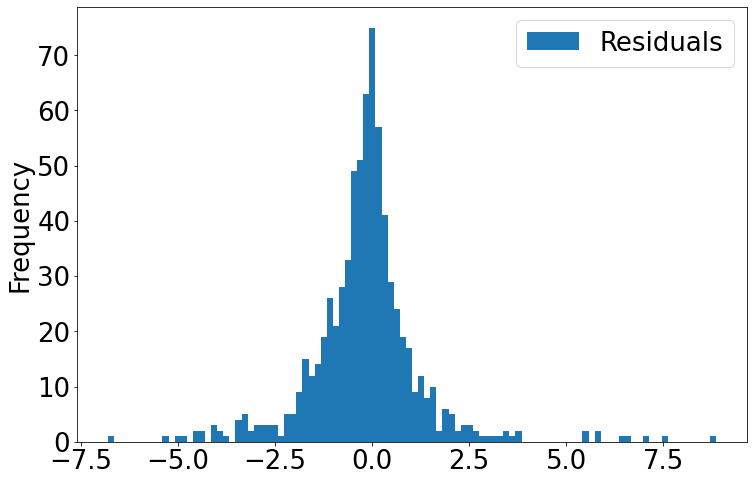

In [38]:
reg_data["Residuals"] = results.resid
fig, ax = plt.subplots(figsize = (12,8))

reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)

In [39]:
betaEstimates = results.params
tStats = results.tvalues
pValues = results.pvalues
stdErrors = results.bse

resultsDict = {"Beta Estimates" : betaEstimates,
              "t-stats":tStats,
              "p-values":pValues,
              "Standard Errors":stdErrors}
resultsDF = pd.DataFrame(resultsDict)
resultsDF.round(3)

Beta Estimates  t-stats  p-values  \
Size of Government                        -0.056   -0.330     0.742   
Legal System & Property Rights            -0.450   -2.231     0.026   
Sound Money                                0.036    0.242     0.809   
Freedom to trade internationally           0.391    2.036     0.042   
Regulation                                 0.088    0.410     0.682   

                                  Standard Errors  
Size of Government                          0.169  
Legal System & Property Rights              0.202  
Sound Money                                 0.149  
Freedom to trade internationally            0.192  
Regulation                                  0.214

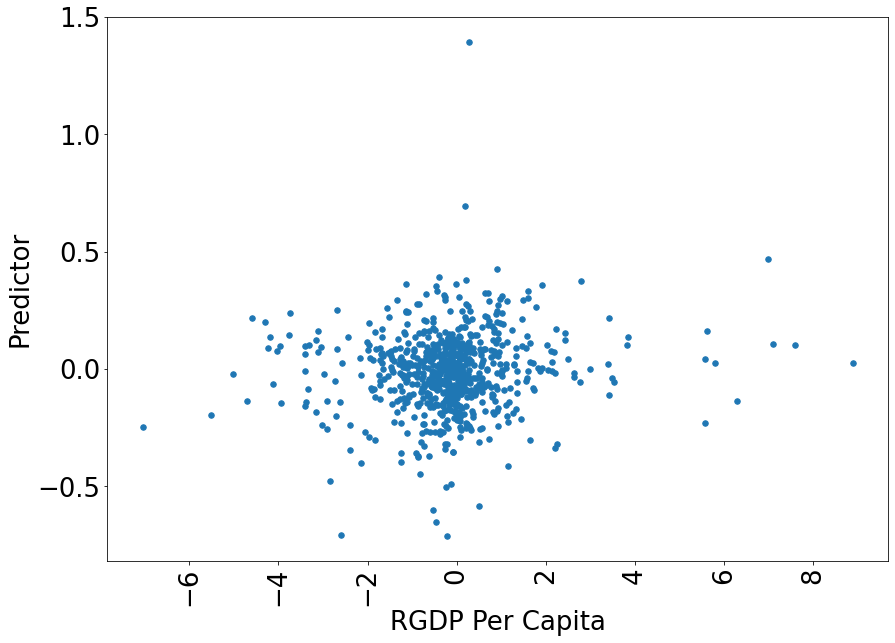

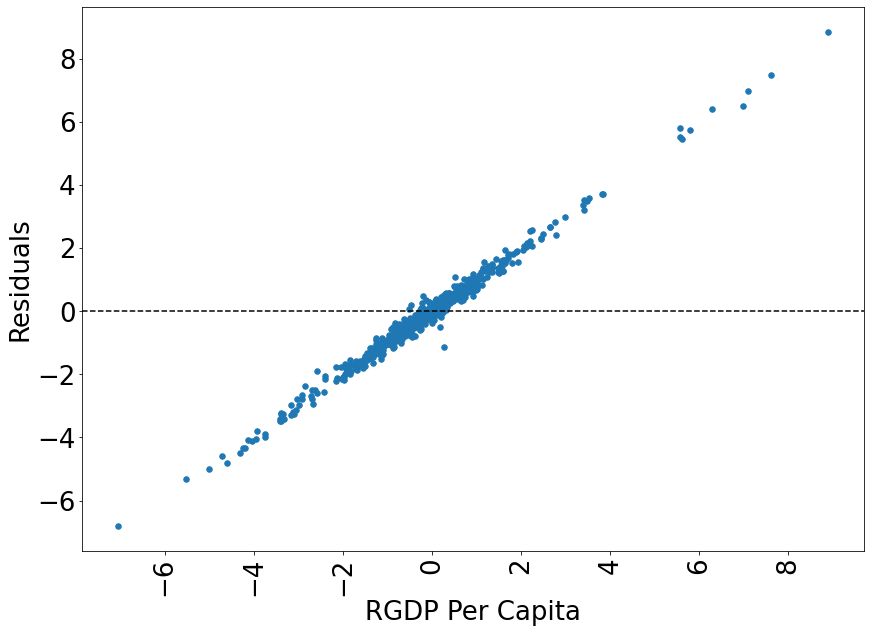

In [40]:
fig, ax = plt.subplots(figsize = (14,10))
reg_data.plot.scatter(x = y_var[0],
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
reg_data.plot.scatter(x = y_var[0],
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.xticks(rotation=90)
plt.show()
plt.close()

### Exercises

1. Use the np.log() function to log the values of RGDP per capita. Create a lag for this new variable and rerun the  regression using these new logged values as well as untransformed Economic Freedom Index Values (don't log these variables!). (hint: you may reimport the csv file).

2. Plot the residuals in a bar chart. Explain why the shape of the distribution of these residuals are distinct from the shape of the residuals plotted in the first regression from this lesson.

3. Plot a scatter plot with RGDP Per Capita on the horizontal axis and the predictor on the vertical axis. Then plot a scatter plot with RGDP Per Capita on the horizontal axis and the residual on the vertical axis. Are the residuals normally distributed? Why or why not? Why does this matter?

4. Plot the observed and predicted logged values of RGDP Per Capita for each individual country. 